## Import Cleaned Data

__DataFrames:__  
df_model - df with all the features (independent festures + Target)  
x - df with all independent features
y - df with dependent feature  
x_train - df with training data from x  
x_train_out - df with training data from x with outliers treatment applied  
x_test - df with test data from x  
x_test_out - df with test data from x with outliers treatment applied  



d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


CAPM
Import data from: ..\SampleData\Sample\LongTerm-DataPreparation_Skew.csv
Original CAPM is being used as Target
Nr of rows:
72538
CAPM
Import data from: ..\SampleData\Sample\LongTerm-DataPreparation.csv
Original CAPM is being used as Target
Nr of rows:
72538


<Figure size 432x288 with 0 Axes>

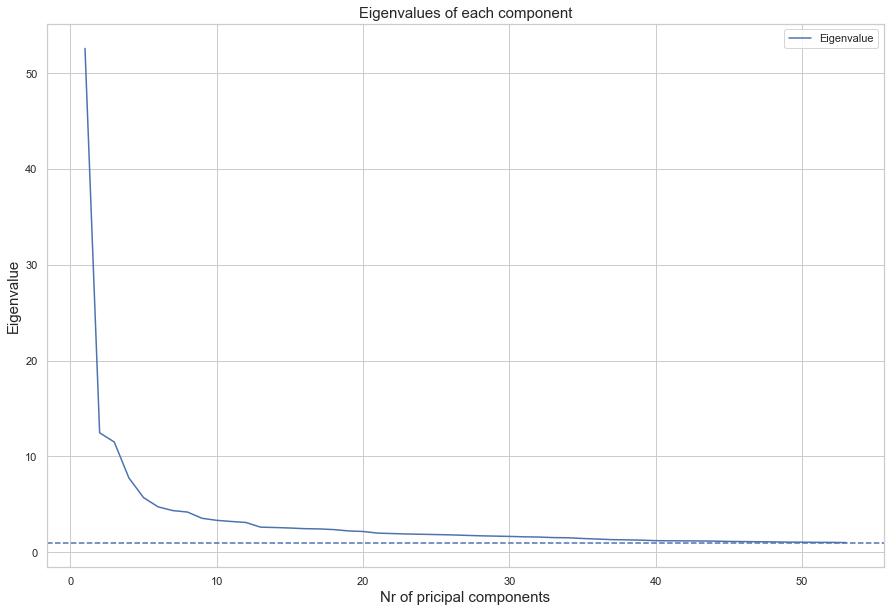

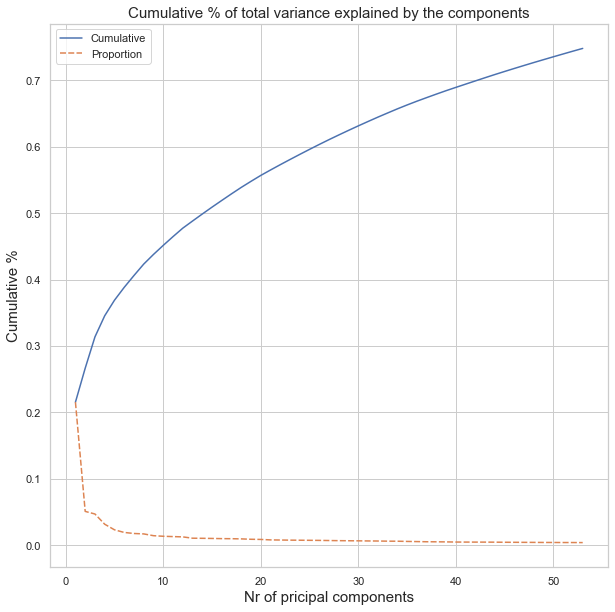

The variance explained by each component is: [52.57262761 12.46288555 11.50406925  7.75558374  5.70240322  4.73326278
  4.34727049  4.19481287  3.54083746  3.3284659   3.21084215  3.10349184
  2.61801742  2.57999819  2.52808463  2.46092403  2.43351593  2.36484452
  2.22577085  2.16695275  1.99600401  1.94976959  1.90444145  1.87541659
  1.84412746  1.81236771  1.76324687  1.71654423  1.68337192  1.65228791
  1.61038711  1.58573914  1.52924602  1.51176831  1.43682567  1.37723706
  1.31595961  1.29381722  1.26270524  1.20604046  1.19481454  1.18452803
  1.17846219  1.16180139  1.12809299  1.11329252  1.09599935  1.08103929
  1.05438238  1.04896434  1.03267288  1.02749898  1.0072945 ]
The total variance explained by the components is: 0.7478169554409864


In [1]:
import sys
sys.path.insert(1, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions')
sys.path.insert(2, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions\Functions')
sys.path.insert(3, r'..')

import Visualizations_Functions as viz 
import Classification_CV as class_cv
import DataPreparation as preprocess 
import FeatureExtraction as ft_extract 
import DataScalling as scalling
import FeatureSelection as ft_selection
import importCleanedData as importData
import importSubsets as subsets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from tensorflow import keras

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#set preferences
sns.set_style('whitegrid')


#set color for graphs
palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]

date = '2018-01-01'

dir = r'..\SampleData\Sample'
df_model_skew,df_target = importData.importCleanedData(dir=dir,target='CAPM')
#split data with transformation
x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData(df_model_skew, date) 


df_model,df_target = importData.importCleanedData_Normal(dir=dir,target='CAPM')
x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData(df_model, date) 

#set columns
ratio_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Ratio'))]
shares_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Share'))]
margin_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Margin'))]
turnover_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Turnover'))]
dividend_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('dividend'))]


components_pca, pca_components_test = importData.runPCA(x_train_out= x_train_out,x_test = x_test)


#import subsets
lasso_subset_0, lasso_subset_15, mi_subset_0, mi_subset_15, lgb_subset, corr_subset0, corr_subset15 = subsets.importSubsets()
subset_0, subset_15 = lasso_subset_0, lasso_subset_15

CAPM
Import data from: ..\SampleData\Sample\LongTerm-DataPreparation_Skew.csv
Original CAPM is being used as Target
Nr of rows:
72538
CAPM
Import data from: ..\SampleData\Sample\LongTerm-DataPreparation.csv
Original CAPM is being used as Target
Nr of rows:
72538


<Figure size 640x480 with 0 Axes>

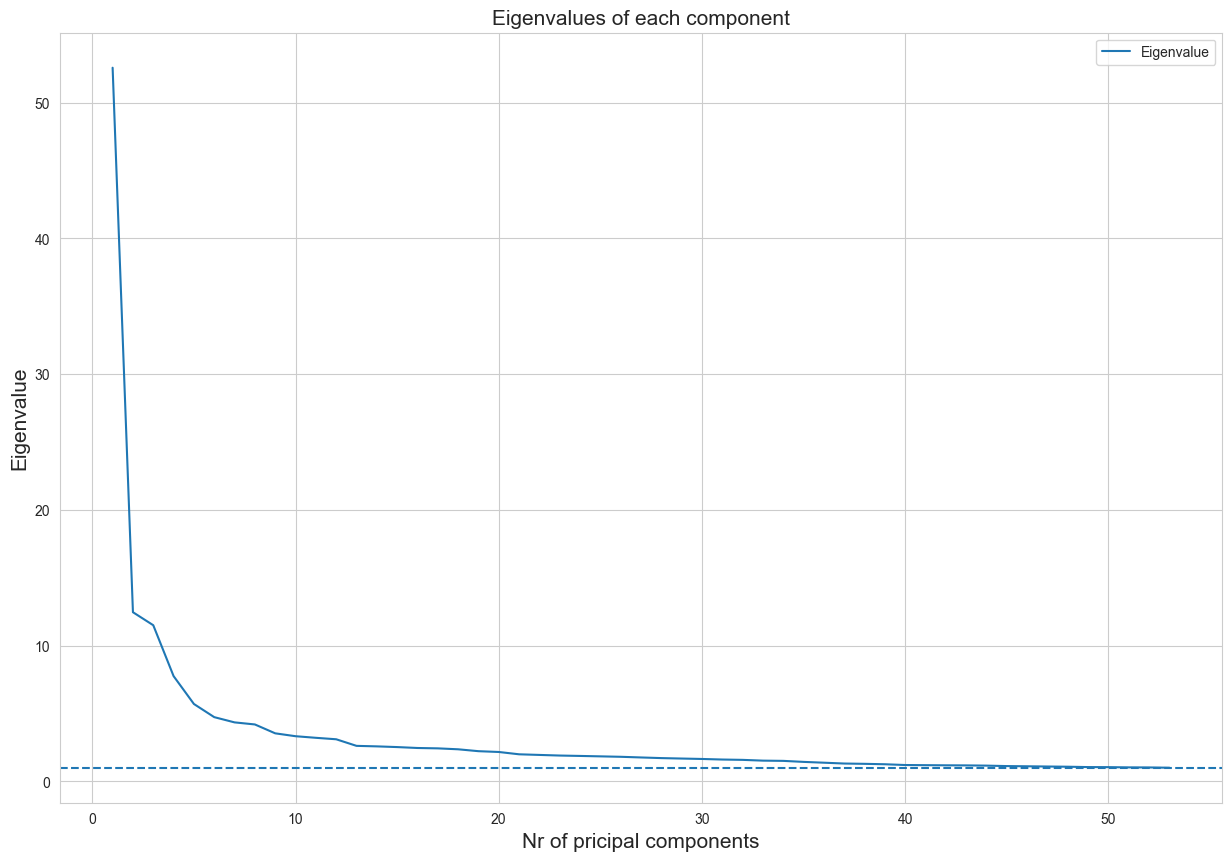

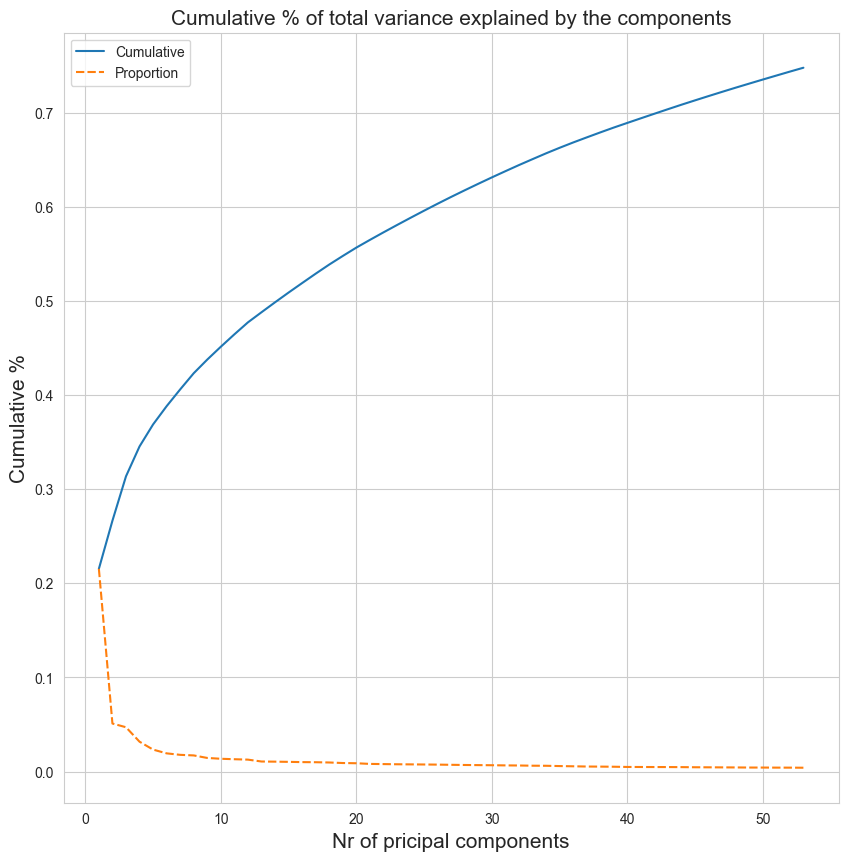

The variance explained by each component is: [52.57262761 12.46288555 11.50406925  7.75558374  5.70240322  4.73326278
  4.34727049  4.19481287  3.54083746  3.3284659   3.21084215  3.10349184
  2.61801742  2.57999819  2.52808463  2.46092403  2.43351593  2.36484452
  2.22577085  2.16695275  1.99600401  1.94976959  1.90444145  1.87541659
  1.84412746  1.81236771  1.76324687  1.71654423  1.68337192  1.65228791
  1.61038711  1.58573914  1.52924602  1.51176831  1.43682567  1.37723706
  1.31595961  1.29381722  1.26270524  1.20604046  1.19481454  1.18452803
  1.17846219  1.16180139  1.12809299  1.11329252  1.09599935  1.08103929
  1.05438238  1.04896434  1.03267288  1.02749898  1.0072945 ]
The total variance explained by the components is: 0.7478169554409861


In [3]:
import sys
#define path to get paths
pathsPath = r'D:\Code\RD\Paths'

if pathsPath not in sys.path:
    sys.path.insert(1, pathsPath)

#import paths
import definePaths as pathsMain

#set paths
fmpPath = pathsMain.get_FMPapi_path()
functions_path = pathsMain.get_insertMlFunctions_path()

#create a list of paths
pathList = [fmpPath, functions_path]
#set personal code paths
for index, path in enumerate(pathList):
    id_ = index +1
    sys.path.insert(id_, path)
    
sys.path.insert(3, r'..')

import Visualizations_Functions as viz 
import Classification_CV as class_cv
import DataPreparation as preprocess 
import FeatureExtraction as ft_extract 
import DataScalling as scalling
import FeatureSelection as ft_selection
import importCleanedData as importData
import importSubsets as subsets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from tensorflow import keras

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#set preferences
sns.set_style('whitegrid')


#set color for graphs
palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]

date = '2018-01-01'

dir = r'..\SampleData\Sample'
df_model_skew,df_target = importData.importCleanedData(dir=dir,target='CAPM')
#split data with transformation
x_train_skew,x_train_out_skew,x_test_skew, x_test_out_skew,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData(df_model_skew, date) 


df_model,df_target = importData.importCleanedData_Normal(dir=dir,target='CAPM')
x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData(df_model, date) 

#set columns
ratio_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Ratio'))]
shares_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Share'))]
margin_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Margin'))]
turnover_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Turnover'))]
dividend_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('dividend'))]


components_pca, pca_components_test = importData.runPCA(x_train_out= x_train_out,x_test = x_test)


#import subsets
lasso_subset_0, lasso_subset_15, mi_subset_0, mi_subset_15, lgb_subset, corr_subset0, corr_subset15 = subsets.importSubsets()
subset_0, subset_15 = lasso_subset_0, lasso_subset_15

## Final Subsets

In [7]:
mi_subset_dict = {'Target_0':['numberOfShares',
  'costOfRevenue_TTM',
  'QoQ_costAndExpenses',
  'incomeBeforeTaxRatio',
  'goodwillAndIntangibleAssets',
  'earnings',
  'accountsPayables',
  'fixedAssetTurnover',
  'excessReturn_84',
  'netIncome_bin',
  'ebtPerEbit',
  'netIncome_cf',
  'YoY_netIncome',
  'totalOtherIncomeExpensesNet',
  'Volatility_42',
  'operatingIncome',
  'dividendPayoutRatio',
  'cashAtEndOfPeriod',
  'depreciationAndAmortization',
  'cashFlowCoverageRatios',
  'purchasesOfInvestments',
  'assetTurnover',
  'eps',
  'commonStock'],
                  
  'Target_0.15': ['Volatility_84',
  'Volatility_21',
  'operatingIncome',
  'costAndExpenses_TTM',
  'netIncome_bin',
  'dividendPayoutRatio',
  'totalDividend',
  'dividend',
  'netIncome_TTM',
  'dividendsPaid',
  'otherCurrentLiabilities',
  'dividendYield',
  'totalAssets',
  'eps_TTM',
  'otherNonCurrentAssets',
  'totalLiabilitiesAndTotalEquity',
  'otherCurrentAssets',
  'marketcap_bin',
  'netCashUsedForInvestingActivites',
  'goodwill',
  'totalNonCurrentAssets']}

lasso_subset_dict = {'Target_0':['revenue',
  'costOfRevenue',
  'otherExpenses',
  'interestIncome',
  'weightedAverageShsOut',
  'cashAndShortTermInvestments',
  'otherCurrentAssets',
  'totalCurrentAssets',
  'goodwill',
  'intangibleAssets',
  'longTermInvestments',
  'otherAssets',
  'deferredRevenue',
  'otherCurrentLiabilities',
  'deferredRevenueNonCurrent',
  'totalNonCurrentLiabilities',
  'capitalLeaseObligations',
  'preferredStock',
  'totalInvestments',
  'netIncome_cf',
  'depreciationAndAmortization_cf',
  'deferredIncomeTax',
  'stockBasedCompensation',
  'inventory_cf',
  'netCashProvidedByOperatingActivities',
  'salesMaturitiesOfInvestments',
  'otherFinancingActivites',
  'effectOfForexChangesOnCash',
  'daysOfPayablesOutstanding',
  'netProfitMargin',
  'freeCashFlowPerShare',
  'capitalExpenditureCoverageRatio',
  'priceEarningsRatio',
  'close',
  'totalDividend',
  'operatingIncome_TTM',
  'eps_TTM',
  'YoY_ebitda',
  'YoY_operatingIncome',
  'YoY_eps'],
                     
  'Target_0.15':['revenue',
  'costOfRevenue',
  'generalAndAdministrativeExpenses',
  'sellingAndMarketingExpenses',
  'interestIncome',
  'operatingIncome',
  'weightedAverageShsOut',
  'cashAndShortTermInvestments',
  'otherCurrentAssets',
  'totalCurrentAssets',
  'goodwill',
  'taxAssets',
  'totalAssets',
  'accountPayables',
  'longTermDebt',
  'deferredRevenueNonCurrent',
  'deferredTaxLiabilitiesNonCurrent',
  'capitalLeaseObligations',
  'commonStock',
  'netIncome_cf',
  'depreciationAndAmortization_cf',
  'deferredIncomeTax',
  'commonStockIssued',
  'effectOfForexChangesOnCash',
  'freeCashFlow',
  'daysOfInventoryOutstanding',
  'daysOfPayablesOutstanding',
  'companyEquityMultiplier',
  'operatingCashFlowPerShare',
  'capitalExpenditureCoverageRatio',
  'priceEarningsRatio',
  'priceEarningsToGrowthRatio',
  'close',
  'totalDividend',
  'researchAndDevelopmentExpenses_TTM',
  'YoY_netIncome']}

# __Skew Analysis__

The goal is to compare the perfomance of a baseline model with the original data, meaning that it didn't suffer any transformation besides feature engineering, missing value imputatiion and incoherence checking, and the data transformed using the log or cubic root transformation depending wether or not the variable had negative values.The baseline model used is a Logistic Regression, subset_0 and subset_15 is are used for Target_0 and Target_15 respectivevly to test different transformations. Tests are performed on the training set

In [2]:
orig_skew = preprocess.skewTest(x_train.select_dtypes(include = np.number)).rename(columns = {0:'originalSkew'})
outliers_skew = preprocess.skewTest(x_train_out.select_dtypes(include = np.number)).rename(columns = {0:'finalSkew'})

full_skew = pd.concat([orig_skew,outliers_skew],axis=1)
full_skew['skewReduction'] = 1 - (full_skew['finalSkew'] / full_skew['originalSkew'])

full_skew

originalSkew  finalSkew  skewReduction
revenue                                41.420971   5.209000       0.874242
costOfRevenue                          39.383009   5.964353       0.848555
grossProfit                            41.851177   6.359491       0.848045
grossProfitRatio                     -227.357300   0.579201       1.002548
researchAndDevelopmentExpenses         27.620278   6.859302       0.751657
...                                          ...        ...            ...
industry_Utilities—Regulated Gas       13.282522        NaN            NaN
industry_Utilities—Regulated Water     12.483112        NaN            NaN
industry_Utilities—Renewable           31.446586        NaN            NaN
industry_Waste Management              15.651701        NaN            NaN
revenuePerShare                       189.350762   5.881044       0.968941

[355 rows x 3 columns]

## __Target 0__

### __Test with all the features__

#### Original Set

In [28]:
model = LogisticRegression( random_state=0,)
to_test = df_model.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_orig = class_cv.validateModel(to_test,
                                  df_model['Target_0'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig =lr_orig['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.490681
f1_train           0.000000
recall_train       0.000000
precision_train    0.000000
auc_train          0.500000
accuracy_test      0.490681
f1_test            0.000000
recall_test        0.000000
precision_test     0.000000
auc_test           0.500000
dtype: float64


#### Transformed Set 

In [32]:
model = LogisticRegression( random_state=0,)

date = '2018-01-01'


to_test = df_model_skew.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_transform = class_cv.validateModel(to_test,
                                  df_model['Target_0'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_transform =lr_transform['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.499550
f1_train           0.460868
recall_train       0.426472
precision_train    0.510161
auc_train          0.500938
accuracy_test      0.500152
f1_test            0.455358
recall_test        0.429073
precision_test     0.510581
auc_test           0.501509
dtype: float64


#### Original Set - Standardized

In [33]:
model = LogisticRegression( random_state=0,)
to_test = df_model.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])
lr_orig_stand = class_cv.validateModel(to_test,
                                  df_model['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig_stand = lr_orig_stand['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.538113
f1_train           0.565805
recall_train       0.591179
precision_train    0.542782
auc_train          0.537105
accuracy_test      0.512779
f1_test            0.536945
recall_test        0.558042
precision_test     0.519506
auc_test           0.511918
dtype: float64


#### Transformed Set - Standardized

In [4]:
model = LogisticRegression( random_state=0,)
to_test = df_model_skew.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_transform_stand = class_cv.validateModel(to_test,
                                  df_model_skew['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_transform_stand = lr_transform_stand['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.561866
f1_train           0.585483
recall_train       0.607534
precision_train    0.564993
auc_train          0.560999
accuracy_test      0.539717
f1_test            0.556813
recall_test        0.579696
precision_test     0.545588
auc_test           0.538958
dtype: float64


In [34]:
assess_dict = {}
assess_dict['lr_orig'] = lr_orig.iloc[:,-5:].mean()
assess_dict['lr_orig_stand'] = lr_orig_stand.iloc[:,-5:].mean()
assess_dict['lr_transform'] = lr_transform.iloc[:,-5:].mean()
assess_dict['lr_transform_stand'] = lr_transform_stand.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])
    
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0'
display(assess_df)

metric              accuracy_test  auc_test   f1_test  precision_test  \
test                                                                    
lr_orig                  0.500152  0.501509  0.455358        0.510581   
lr_orig_stand            0.512779  0.511918  0.536945        0.519506   
lr_transform             0.500152  0.501509  0.455358        0.510581   
lr_transform_stand       0.539496  0.538731  0.556752        0.545249   

metric              recall_test    Target  
test                                       
lr_orig                0.429073  Target_0  
lr_orig_stand          0.558042  Target_0  
lr_transform           0.429073  Target_0  
lr_transform_stand     0.579858  Target_0

### __Test with subset 0__

#### Set columns needed for the test

In [43]:
cols = [*subset_0,*['CAPM', 'adjCAPM', 'Target_0.15','Target_0']]

#### Original Set

In [50]:
model = LogisticRegression( random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model[cols], date) 


lr_orig = class_cv.validateModel(x_train_t[subset_0],
                                  y_train_dict_t['Target_0'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig =lr_orig['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
accuracy_train     0.500192
f1_train           0.521795
recall_train       0.527589
precision_train    0.517177
auc_train          0.499165
accuracy_test      0.499030
f1_test            0.522022
recall_test        0.530091
precision_test     0.515759
auc_test           0.497868
dtype: float64


#### Original Set - Standardized

In [51]:
model = LogisticRegression( random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model[cols], date) 


lr_orig_stand = class_cv.validateModel(x_train_t[subset_0],
                                  y_train_dict_t['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig_stand = lr_orig_stand['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.519046
f1_train           0.682215
recall_train       0.996487
precision_train    0.518644
auc_train          0.501143
accuracy_test      0.518242
f1_test            0.681754
recall_test        0.996035
precision_test     0.518235
auc_test           0.500326
dtype: float64


#### Transformed Set

In [46]:
model = LogisticRegression( random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model_skew[cols],
                                                                                                              date) 


lr_transform = class_cv.validateModel(x_train_t[subset_0],
                                  y_train_dict_t['Target_0'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_transform = lr_transform['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
accuracy_train     0.509126
f1_train           0.585484
recall_train       0.669343
precision_train    0.520405
auc_train          0.503119
accuracy_test      0.509131
f1_test            0.581542
recall_test        0.668605
precision_test     0.519771
auc_test           0.503167
dtype: float64


#### Transformed Set - Standardized

In [52]:
model = LogisticRegression( random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model_skew[cols],
                                                                                                              date) 


lr_transform_stand = class_cv.validateModel(x_train_t[subset_0],
                                  y_train_dict_t['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_transform_stand = lr_transform_stand['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.539909
f1_train           0.625115
recall_train       0.740452
precision_train    0.540892
auc_train          0.532389
accuracy_test      0.533574
f1_test            0.616827
recall_test        0.730246
precision_test     0.536672
auc_test           0.526209
dtype: float64


#### Compare Results

In [53]:
assess_dict = {}
assess_dict['lr_orig'] = lr_orig.iloc[:,-5:].mean()
assess_dict['lr_orig_stand'] = lr_orig_stand.iloc[:,-5:].mean()
assess_dict['lr_transform'] = lr_transform.iloc[:,-5:].mean()
assess_dict['lr_transform_stand'] = lr_transform_stand.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])
    
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0'
display(assess_df)

metric              accuracy_test  auc_test   f1_test  precision_test  \
test                                                                    
lr_orig                  0.499030  0.497868  0.522022        0.515759   
lr_orig_stand            0.518242  0.500326  0.681754        0.518235   
lr_transform             0.509131  0.503167  0.581542        0.519771   
lr_transform_stand       0.533574  0.526209  0.616827        0.536672   

metric              recall_test    Target  
test                                       
lr_orig                0.530091  Target_0  
lr_orig_stand          0.996035  Target_0  
lr_transform           0.668605  Target_0  
lr_transform_stand     0.730246  Target_0

## __Target 15__

### __Test with all the features__

#### Original Set

In [36]:
model = LogisticRegression( random_state=0,
                           class_weight='balanced')
to_test = df_model.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_orig = class_cv.validateModel(to_test,
                                  df_model['Target_0.15'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig =lr_orig['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.859232
f1_train           0.000000
recall_train       0.000000
precision_train    0.000000
auc_train          0.500000
accuracy_test      0.859232
f1_test            0.000000
recall_test        0.000000
precision_test     0.000000
auc_test           0.500000
dtype: float64


#### Original Set - Standardized

In [37]:
model = LogisticRegression( random_state=0,
                           class_weight='balanced')
to_test = df_model.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])
lr_orig_stand = class_cv.validateModel(to_test,
                                  df_model['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_orig_stand = lr_orig_stand['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.630201
f1_train           0.328817
recall_train       0.643467
precision_train    0.220844
auc_train          0.635748
accuracy_test      0.623039
f1_test            0.312571
recall_test        0.601511
precision_test     0.213137
auc_test           0.614040
dtype: float64


#### Transformed Set 

In [38]:
model = LogisticRegression( random_state=0,class_weight='balanced')

date = '2018-01-01'


to_test = df_model_skew.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_transform = class_cv.validateModel(to_test,
                                  df_model['Target_0.15'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_transform =lr_transform['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.737760
f1_train           0.178323
recall_train       0.204028
precision_train    0.159983
auc_train          0.514615
accuracy_test      0.739751
f1_test            0.183471
recall_test        0.210557
precision_test     0.165863
auc_test           0.518502
dtype: float64


#### Transformed Set - Standardized

In [39]:
model = LogisticRegression( random_state=0,
                           class_weight='balanced')
to_test = df_model_skew.fillna(0).select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])

lr_transform_stand = class_cv.validateModel(to_test,
                                  df_model_skew['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_transform_stand = lr_transform_stand['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.648008
f1_train           0.345673
recall_train       0.660453
precision_train    0.234105
auc_train          0.653211
accuracy_test      0.635185
f1_test            0.327873
recall_test        0.618460
precision_test     0.227649
auc_test           0.628195
dtype: float64


In [42]:
assess_dict = {}
assess_dict['lr_orig'] = lr_orig.iloc[:,-5:].mean()
assess_dict['lr_orig_stand'] = lr_orig_stand.iloc[:,-5:].mean()
assess_dict['lr_transform'] = lr_transform.iloc[:,-5:].mean()
assess_dict['lr_transform_stand'] = lr_transform_stand.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])
    
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0.15'
display(assess_df)

metric              accuracy_test  auc_test   f1_test  precision_test  \
test                                                                    
lr_orig                  0.859232  0.500000  0.000000        0.000000   
lr_orig_stand            0.623039  0.614040  0.312571        0.213137   
lr_transform             0.739751  0.518502  0.183471        0.165863   
lr_transform_stand       0.635185  0.628195  0.327873        0.227649   

metric              recall_test       Target  
test                                          
lr_orig                0.000000  Target_0.15  
lr_orig_stand          0.601511  Target_0.15  
lr_transform           0.210557  Target_0.15  
lr_transform_stand     0.618460  Target_0.15

### __Test with subset 15__

#### Set columns needed for the test

In [24]:
cols = [*subset_15,*['CAPM', 'adjCAPM', 'Target_0.15','Target_0']]

#### Original Set

In [25]:
model = LogisticRegression(class_weight='balanced',
                          random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model[cols], date) 


lr_orig = class_cv.validateModel(x_train_t[subset_15],
                                  y_train_dict_t['Target_0.15'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_orig =lr_orig['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
accuracy_train     0.620109
f1_train           0.217372
recall_train       0.372677
precision_train    0.154139
auc_train          0.516874
accuracy_test      0.624387
f1_test            0.215753
recall_test        0.367594
precision_test     0.154983
auc_test           0.517244
dtype: float64


#### Original Set Standardized

In [26]:
model = LogisticRegression(class_weight='balanced',
                          random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model[cols], date) 


lr_orig_stand = class_cv.validateModel(x_train_t[subset_15],
                                  y_train_dict_t['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

lr_orig_stand =lr_orig_stand['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.321265
f1_train           0.262515
recall_train       0.853948
precision_train    0.156240
auc_train          0.543512
accuracy_test      0.322846
f1_test            0.262518
recall_test        0.849502
precision_test     0.156455
auc_test           0.542585
dtype: float64


#### Transformed Set

In [27]:
model = LogisticRegression(class_weight='balanced',
                          random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model_skew[cols],
                                                                                                              date) 


lr_transform = class_cv.validateModel(x_train_t[subset_15],
                                  y_train_dict_t['Target_0.15'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_transform =lr_transform['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
accuracy_train     0.713954
f1_train           0.159112
recall_train       0.191776
precision_train    0.136932
auc_train          0.496089
accuracy_test      0.715884
f1_test            0.140455
recall_test        0.188506
precision_test     0.129601
auc_test           0.495840
dtype: float64


#### Transformed Set - Standardized

In [28]:
model = LogisticRegression(class_weight='balanced',
                          random_state=0,)

date = '2018-01-01'

x_train_t ,x_train_out_t,x_test_t, x_test_out_t,y_train_dict_t ,y_test_dict_t, y_train_t,y_test_t = splitData(df_model_skew[cols],
                                                                                                              date) 


lr_transform_stand = class_cv.validateModel(x_train_t[subset_15],
                                  y_train_dict_t['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_transform_stand =lr_transform_stand['scores']

Nr of rows:
72538
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.616545
f1_train           0.320350
recall_train       0.636162
precision_train    0.214082
auc_train          0.624730
accuracy_test      0.613981
f1_test            0.317398
recall_test        0.621427
precision_test     0.216810
auc_test           0.617093
dtype: float64


#### Compare Results

In [29]:
assess_dict = {}
assess_dict['lr_orig'] = lr_orig.iloc[:,-5:].mean()
assess_dict['lr_orig_stand'] = lr_orig_stand.iloc[:,-5:].mean()
assess_dict['lr_transform'] = lr_transform.iloc[:,-5:].mean()
assess_dict['lr_transform_stand'] = lr_transform_stand.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])
    
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0.15'
display(assess_df)

metric              accuracy_test  auc_test   f1_test  precision_test  \
test                                                                    
lr_orig                  0.624387  0.517244  0.215753        0.154983   
lr_orig_stand            0.322846  0.542585  0.262518        0.156455   
lr_transform             0.715884  0.495840  0.140455        0.129601   
lr_transform_stand       0.613981  0.617093  0.317398        0.216810   

metric              recall_test       Target  
test                                          
lr_orig                0.367594  Target_0.15  
lr_orig_stand          0.849502  Target_0.15  
lr_transform           0.188506  Target_0.15  
lr_transform_stand     0.621427  Target_0.15

# __Outliers__

In [ ]:
def histogram_target (df, target):
    from math import ceil
    metric_features = df.select_dtypes(include=np.number).columns
    # All Numeric Variables' Histograms in one figure
    sns.set(style='whitegrid')

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(5, ceil(len(metric_features)/5), figsize=(20, 20))

    # Plot data
    # Iterate across axes objects and associate each histogram:
    for ax, feat in zip(axes.flatten(), metric_features):
        sns.histplot(x=df[feat], hue=df[f'{target}'], stat='density',common_norm=False, kde=True, 
                     element='step', color='blue', linewidth=2, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel('')
        ax.set_ylabel('')         
    
    title = "Numeric Variables' Histograms by Target"
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

    plt.show()
    
    
def histogram(data):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.histplot(data[feat],common_norm=False, kde=True, 
                     element='step', color='teal', linewidth=2, ax=ax)
        ax.set_title(feat)
        ax.set_xlabel('')
        ax.set_ylabel('')
                     
        #plt.title(feat)

    
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
    
def boxplot (data):
    from math import ceil
    # All Numeric Variables' Histograms in one figure
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set(style='whitegrid')
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(30, 15))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method

        sns.boxplot(data[feat], ax = ax)
        #plt.title(feat)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()

def target_boxplot (data,target):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).columns
    #data = pd.concat([data[metric_features], data[target]])
    # All Numeric Variables' Box Plots in one figure
    sns.set(style='whitegrid')

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each box plot:
    for ax, feat in zip(axes.flatten(), metric_features):
        sns.boxplot(x=data[target], y=data[feat], ax=ax,palette=['turquoise','teal'])
        ax.set_title(f'{feat}')
        ax.set_ylabel('')
        ax.set_xlabel('')

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots by Target"
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.3)

    plt.show()
    


#### Check Quantiles 

In [37]:
quantile_disp = analyzeQuantiles(df_model)

count          mean           std  \
priceSalesRatio              72538.0  2.512828e+08  4.083642e+10   
priceToSalesRatio            72538.0  2.512828e+08  4.083642e+10   
purchasesOfInvestments       72538.0 -1.313151e+09  3.411317e+10   
interestIncome               72538.0  2.477030e+09  8.146479e+10   
priceFairValue               72538.0  1.061524e+06  1.132389e+08   
priceBookValueRatio          72538.0  1.061524e+06  1.132389e+08   
priceToBookRatio             72538.0  1.061524e+06  1.132389e+08   
close                        72538.0  3.173789e+06  3.625311e+08   
stockPrice                   72538.0  3.610028e+06  3.908539e+08   
totalOtherIncomeExpensesNet  72538.0 -3.921486e+08  3.684586e+10   

                                      min         25%     50%        75%  \
priceSalesRatio             -1.700000e+01         3.0     7.0       14.0   
priceToSalesRatio           -1.700000e+01         3.0     7.0       14.0   
purchasesOfInvestments      -5.180000e+12 -58022750.0 -1000.0        0.0   
interestIncome              -2.614446e+09         0.0  2000.0  6318250.0   
priceFairValue              -5.564120e+08         1.0     2.0        3.0   
priceBookValueRatio         -5.564120e+08         1.0     2.0        3.0   
priceToBookRatio            -5.564120e+08         1.0     2.0        3.0   
close                        0.000000e+00        12.0    22.0       43.0   
stockPrice                   0.000000e+00        15.0    27.0       51.0   
totalOtherIncomeExpensesNet -8.070342e+12  -7398250.0 -5000.0    44000.0   

                                    90%          95%  disparity     mean_disp  
priceSalesRatio                    25.0         38.0   1.520000  3.589754e+07  
priceToSalesRatio                  25.0         38.0   1.520000  3.589754e+07  
purchasesOfInvestments              0.0          0.0        NaN  1.313151e+06  
interestIncome               70036300.0  320629138.0   4.578042  1.238515e+06  
priceFairValue                      6.0          9.0   1.500000  5.307620e+05  
priceBookValueRatio                 6.0          9.0   1.500000  5.307620e+05  
priceToBookRatio                    6.0          9.0   1.500000  5.307620e+05  
close                              87.0        145.0   1.666667  1.442631e+05  
stockPrice                        102.0        180.0   1.764706  1.337047e+05  
totalOtherIncomeExpensesNet   4000000.0   29171950.0   7.292987  7.842973e+04

## __Check Distributions - Boxplot__

### __Subset 0__

#### Feature Distribution before outliers removal 

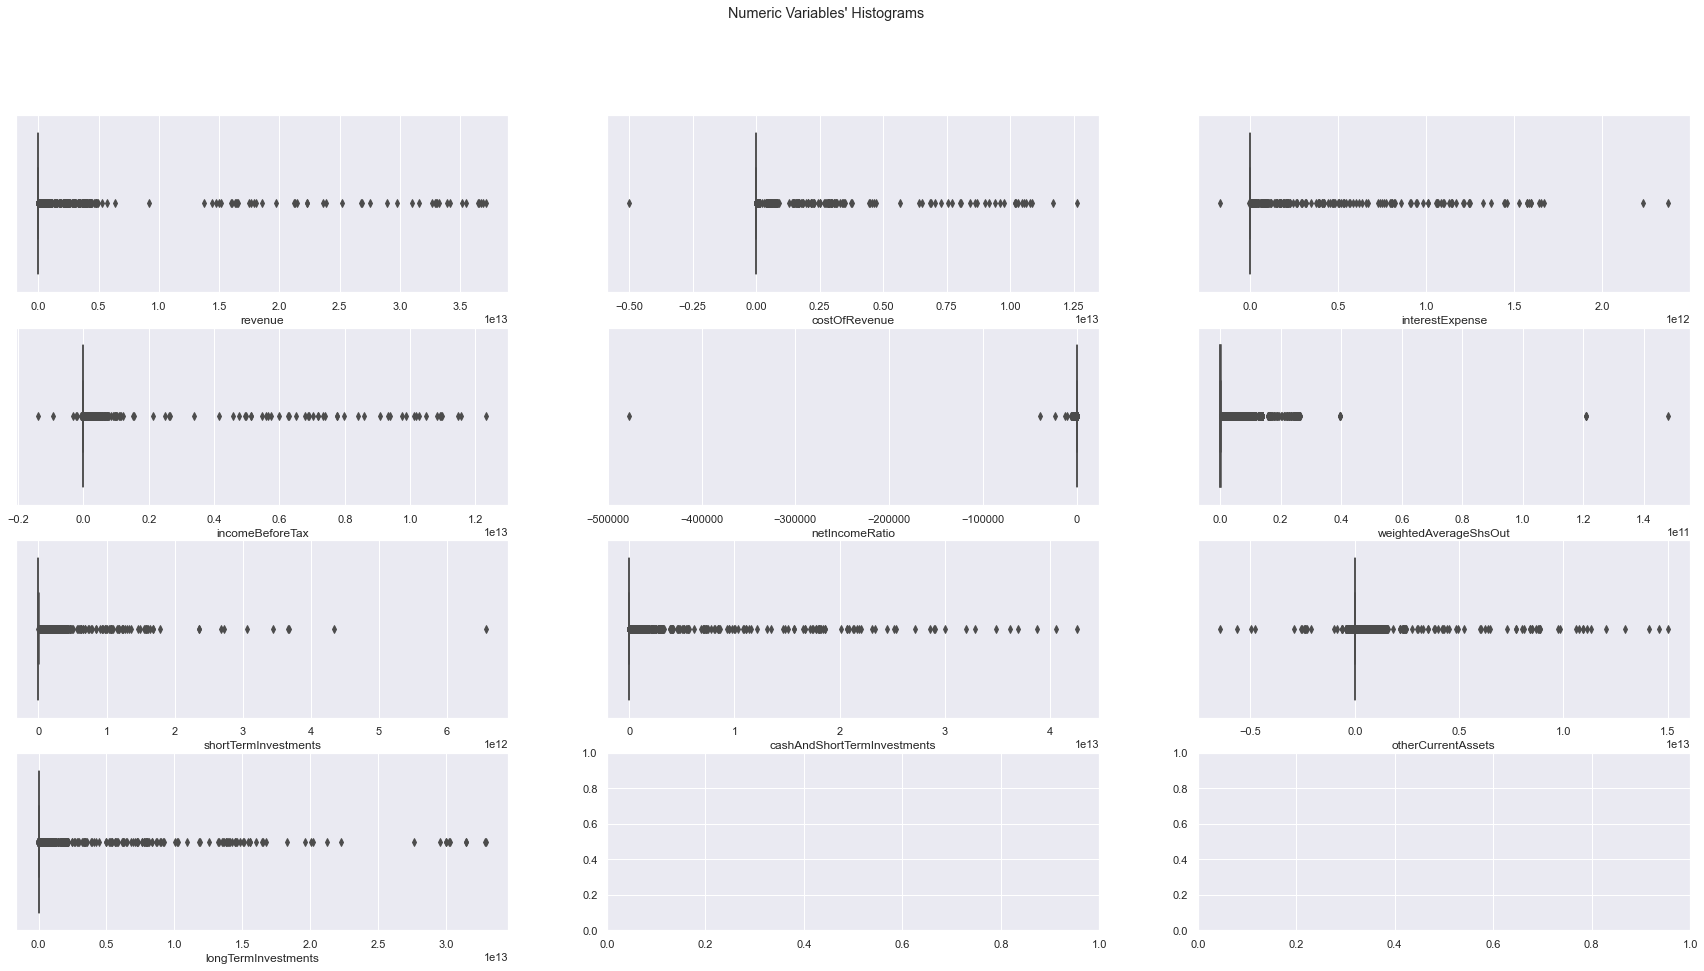

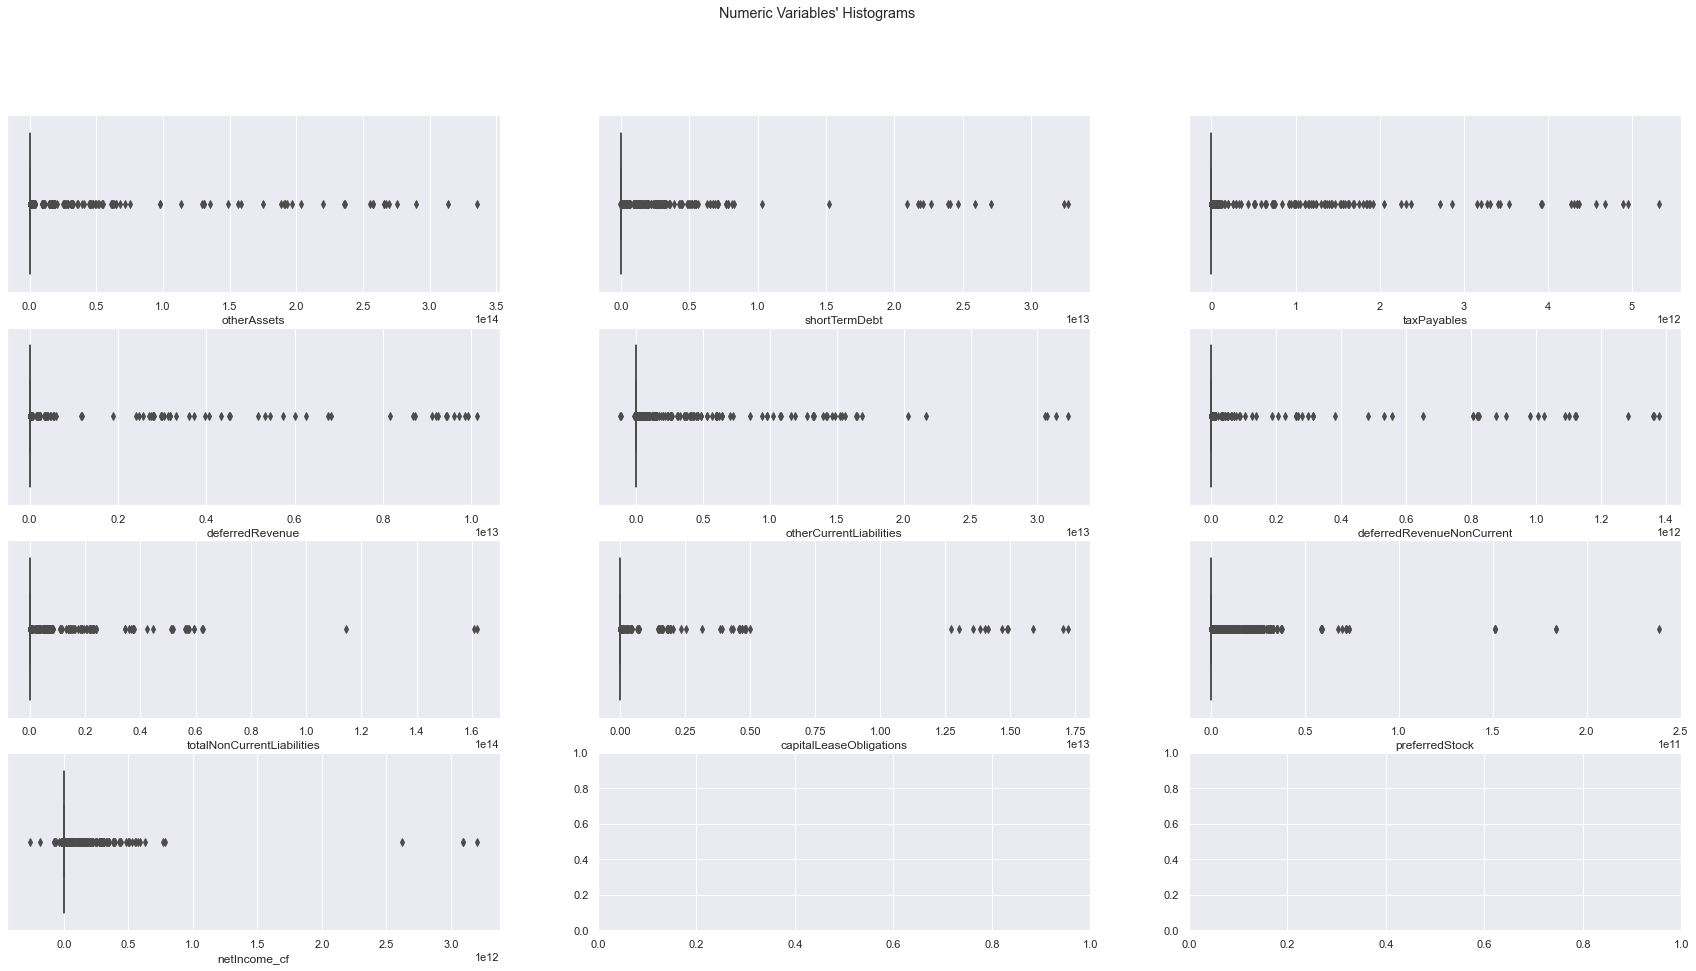

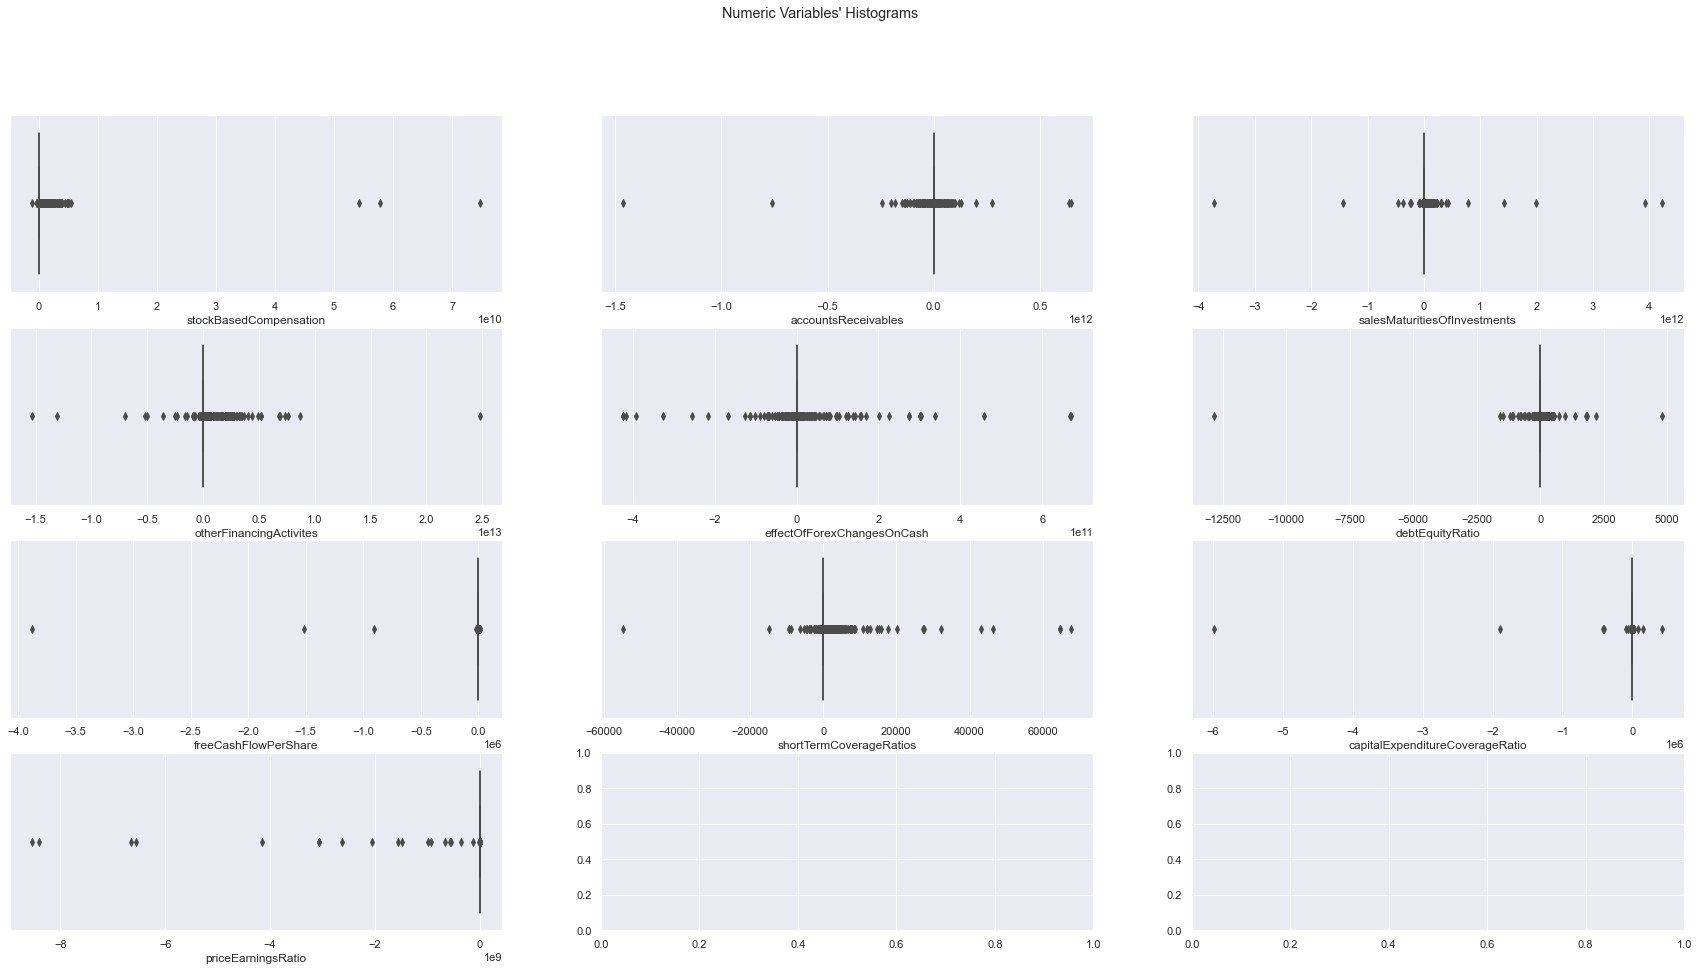

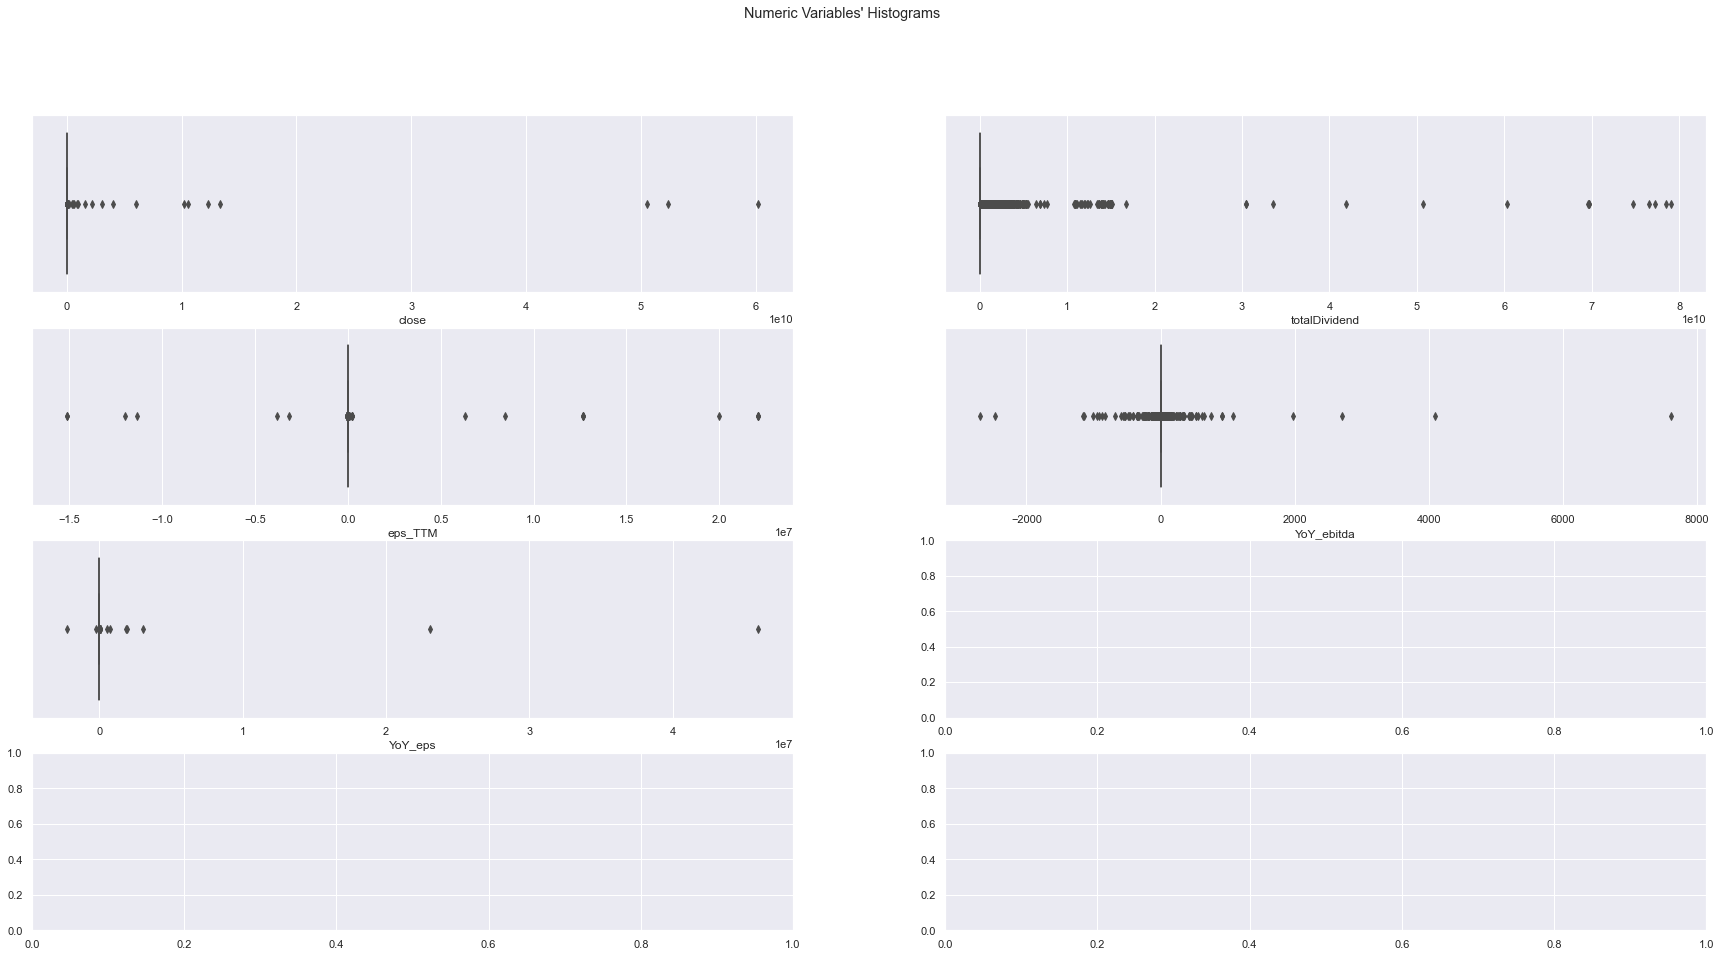

In [38]:
n = 10
cols = df_model.columns[df_model.columns.str.contains('YoY')]
for idx in np.arange(0, len(subset_0),n):
    f_idx = idx+n
    viz.boxplot(df_model[subset_0].iloc[:,idx:f_idx])
    


#### Feature Distribution after outlier smoothing - Winsorizing  

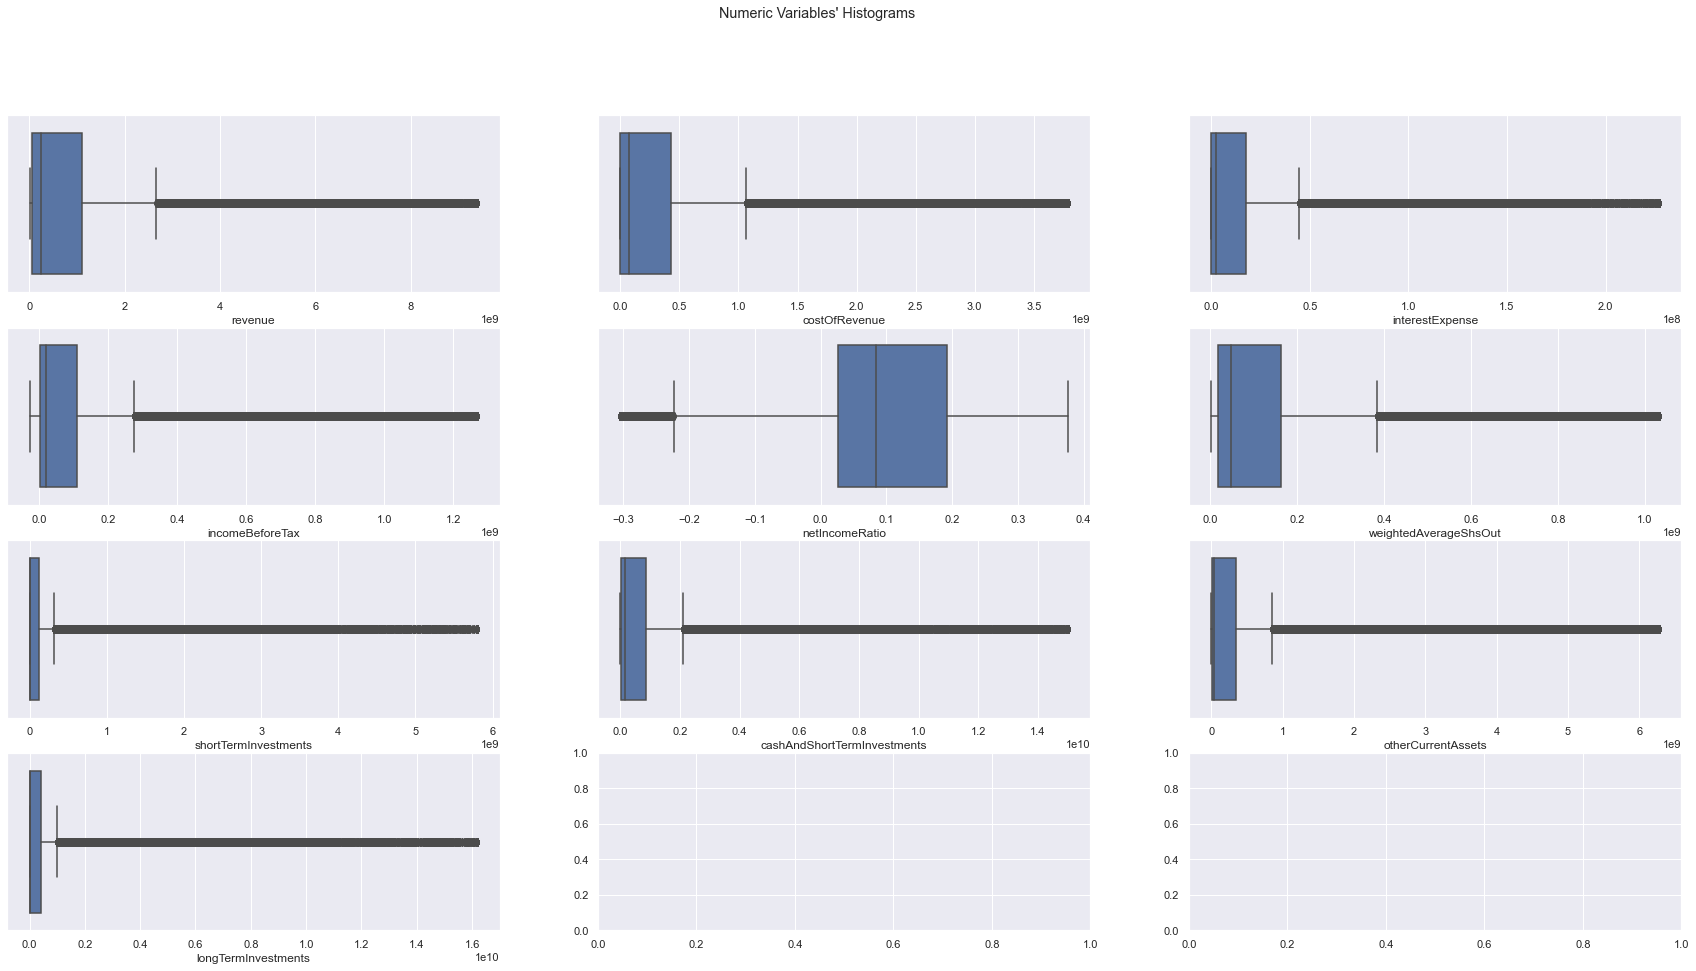

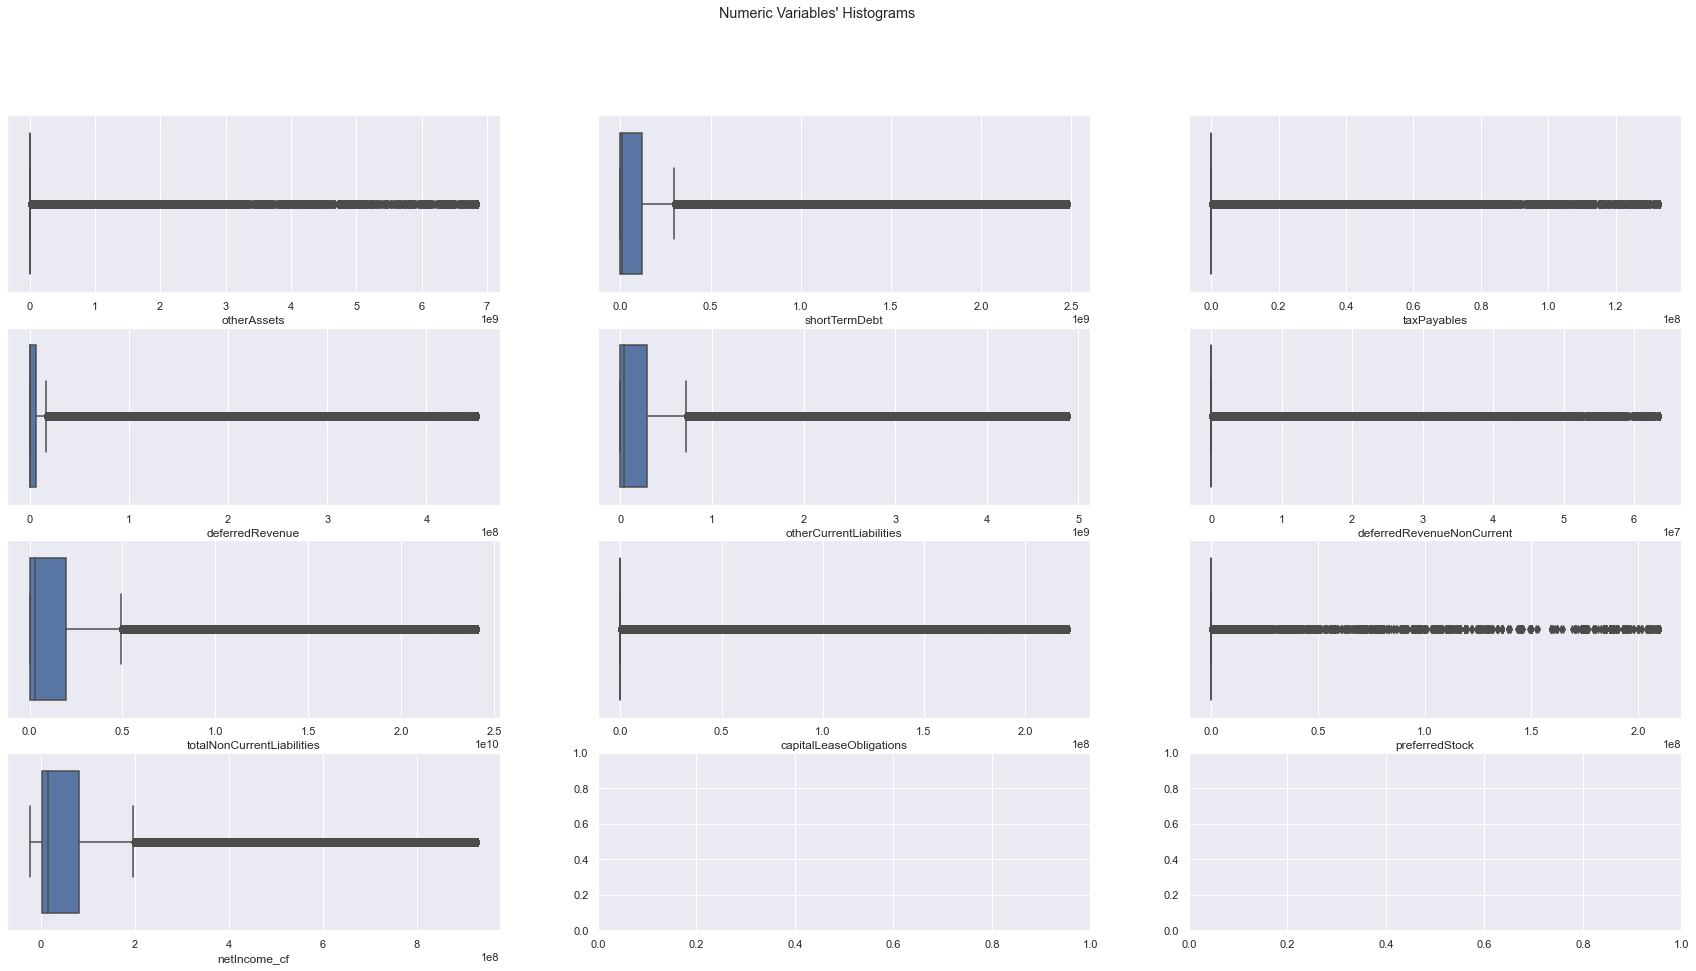

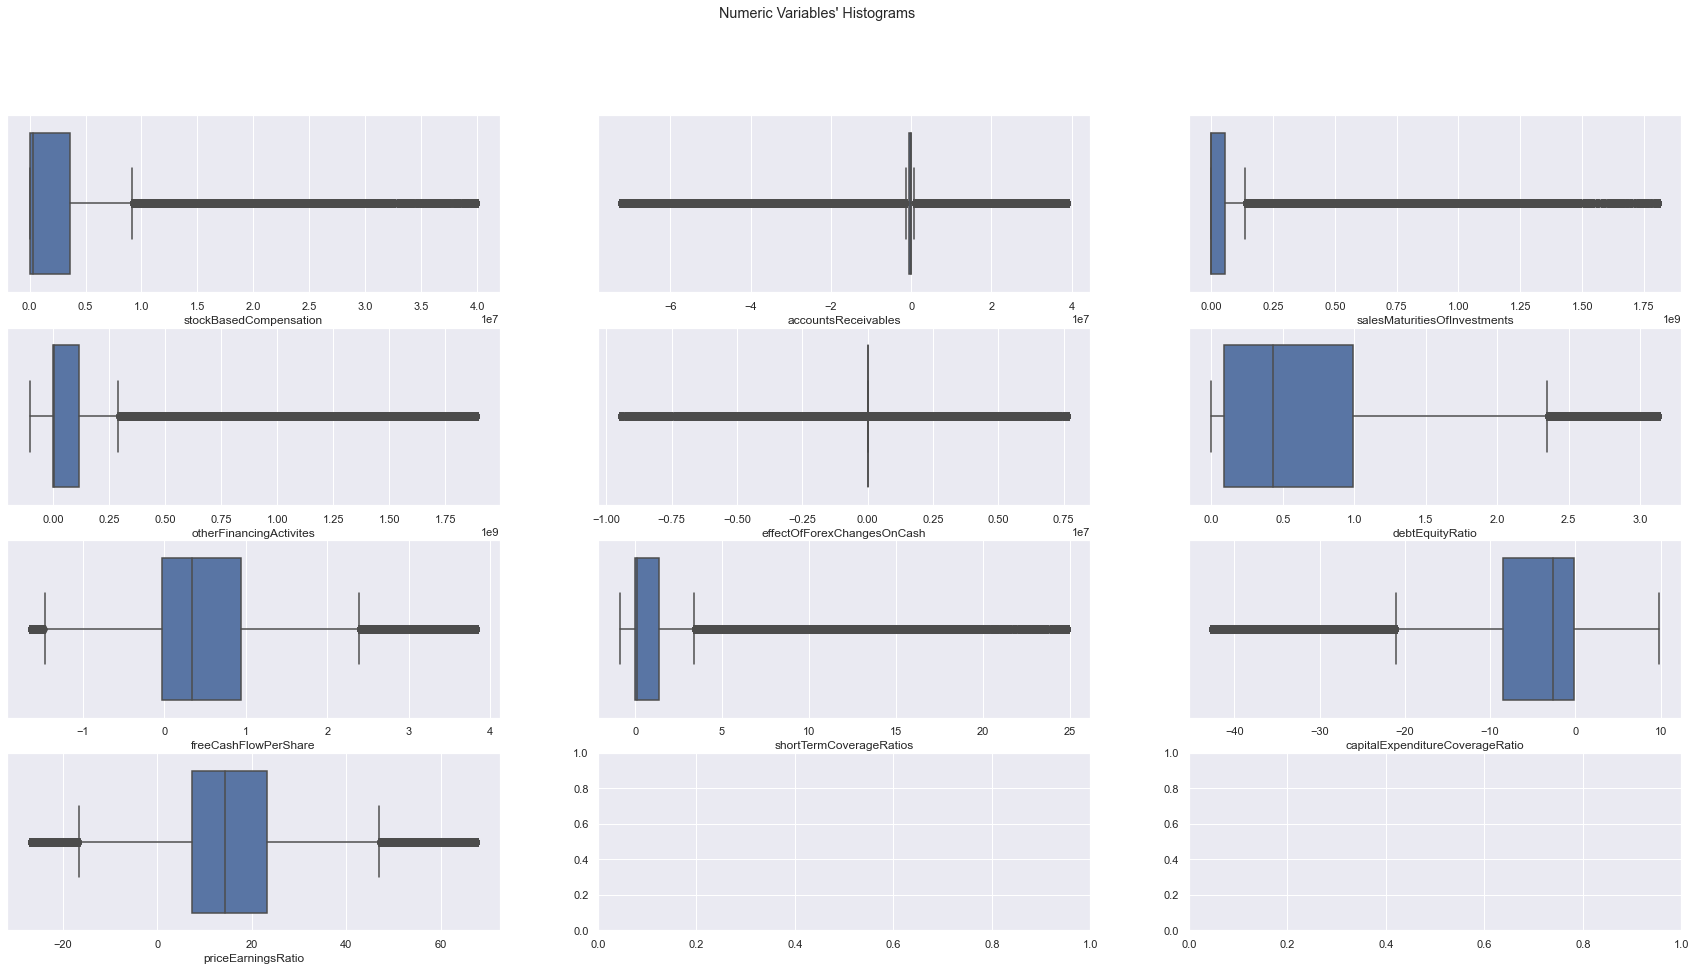

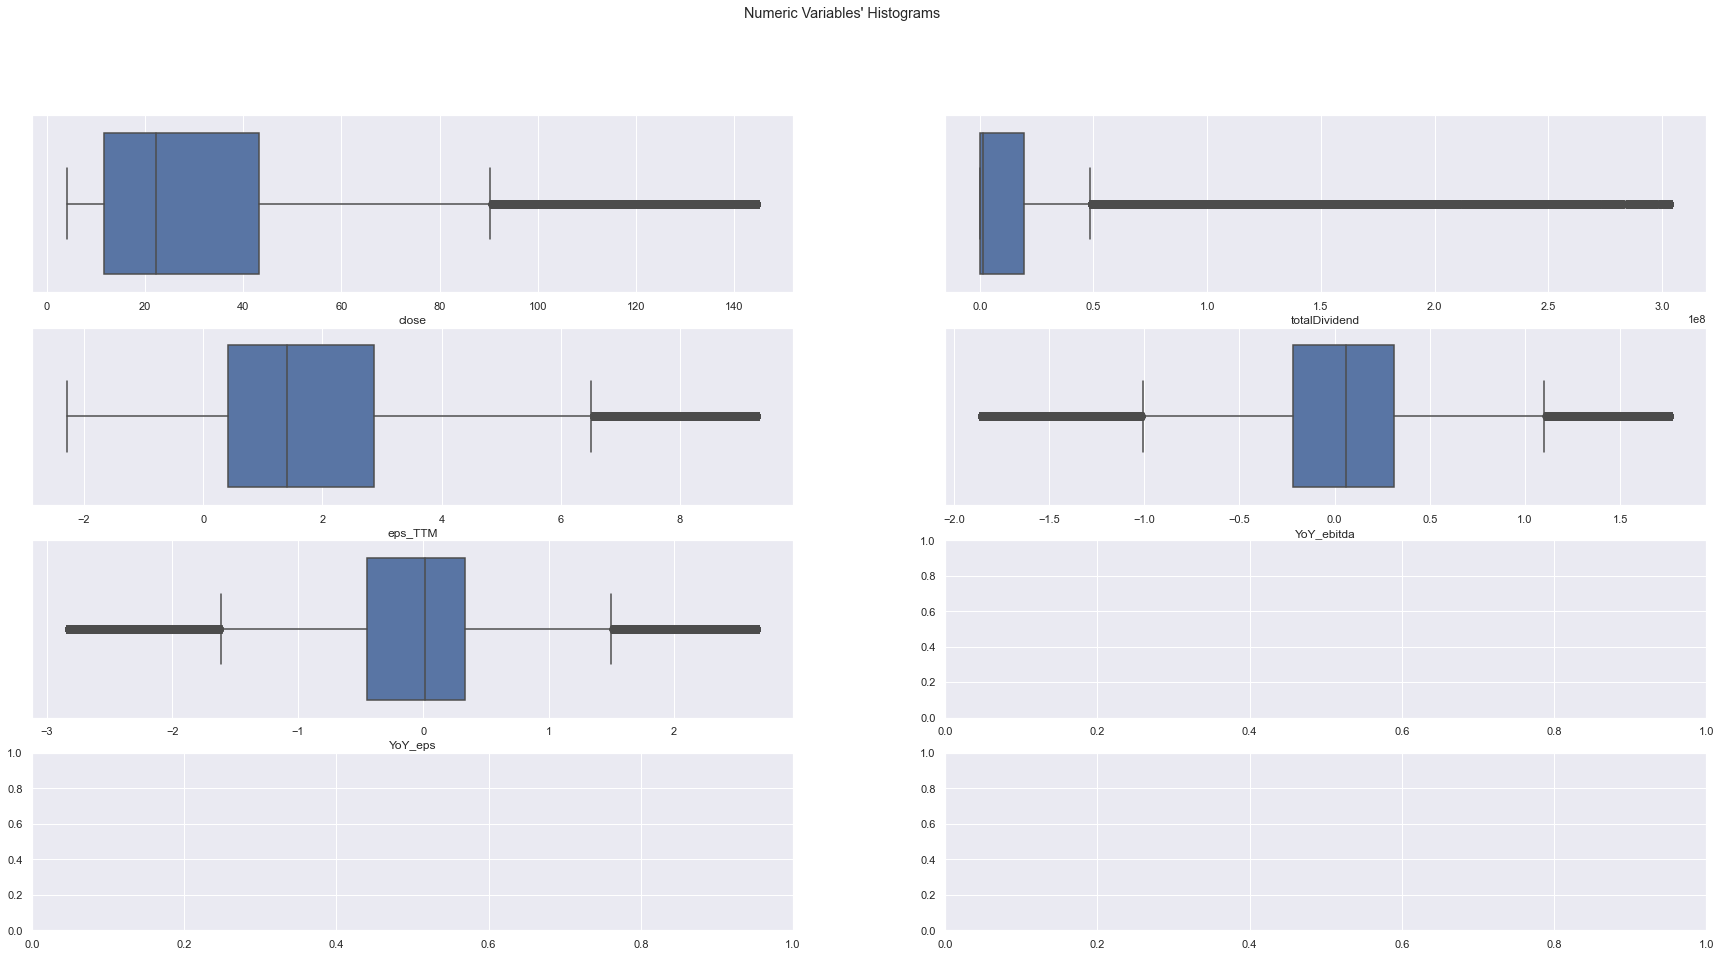

In [150]:
n = 10
for idx in np.arange(0, len(subset_0),n):
    f_idx = idx+n
    viz.boxplot(df_model_out[subset_0].iloc[:,idx:f_idx])
    


### __Subset 15__

#### Feature Distribution before outliers removal 

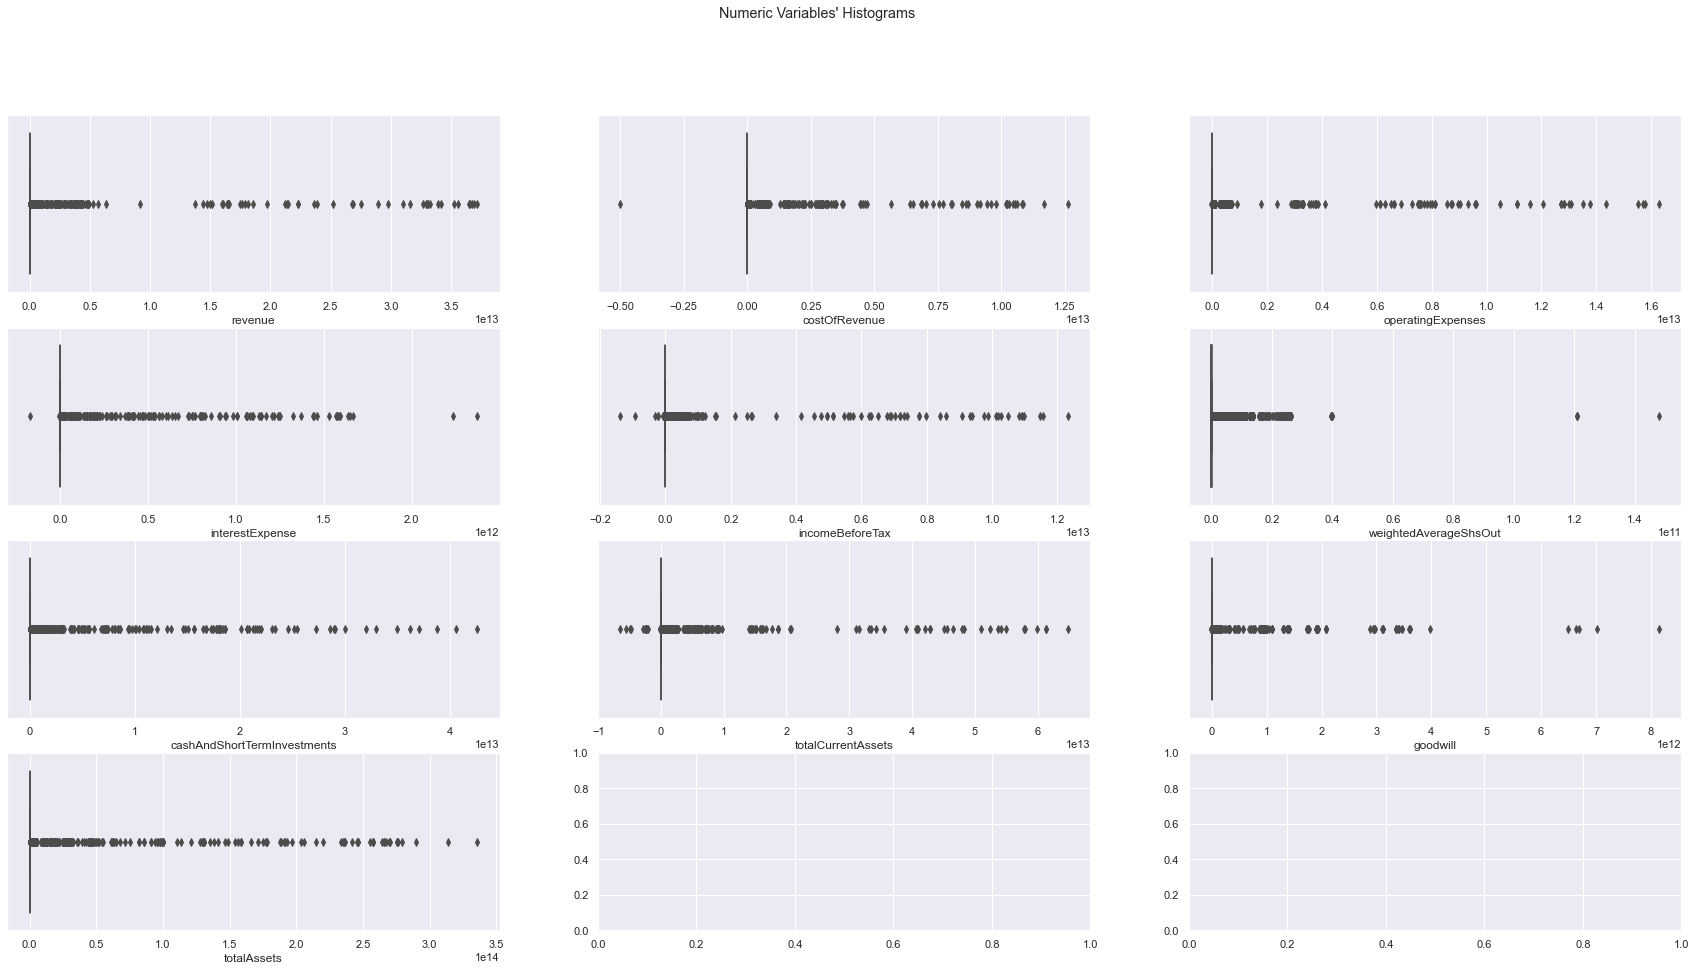

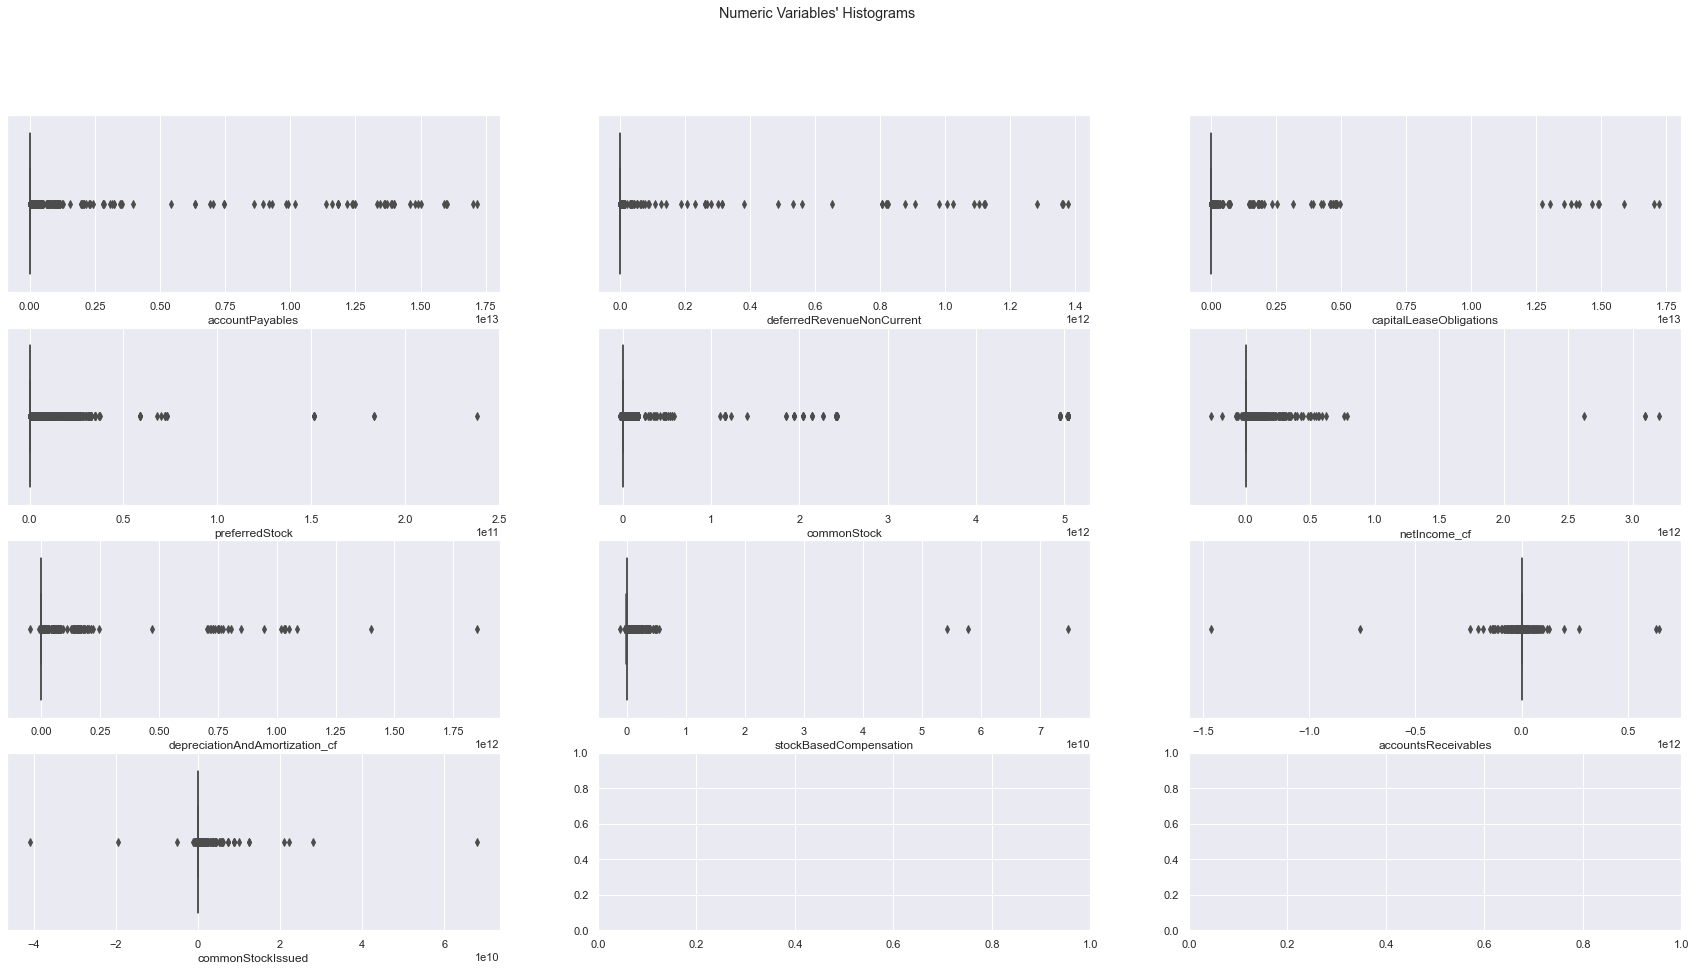

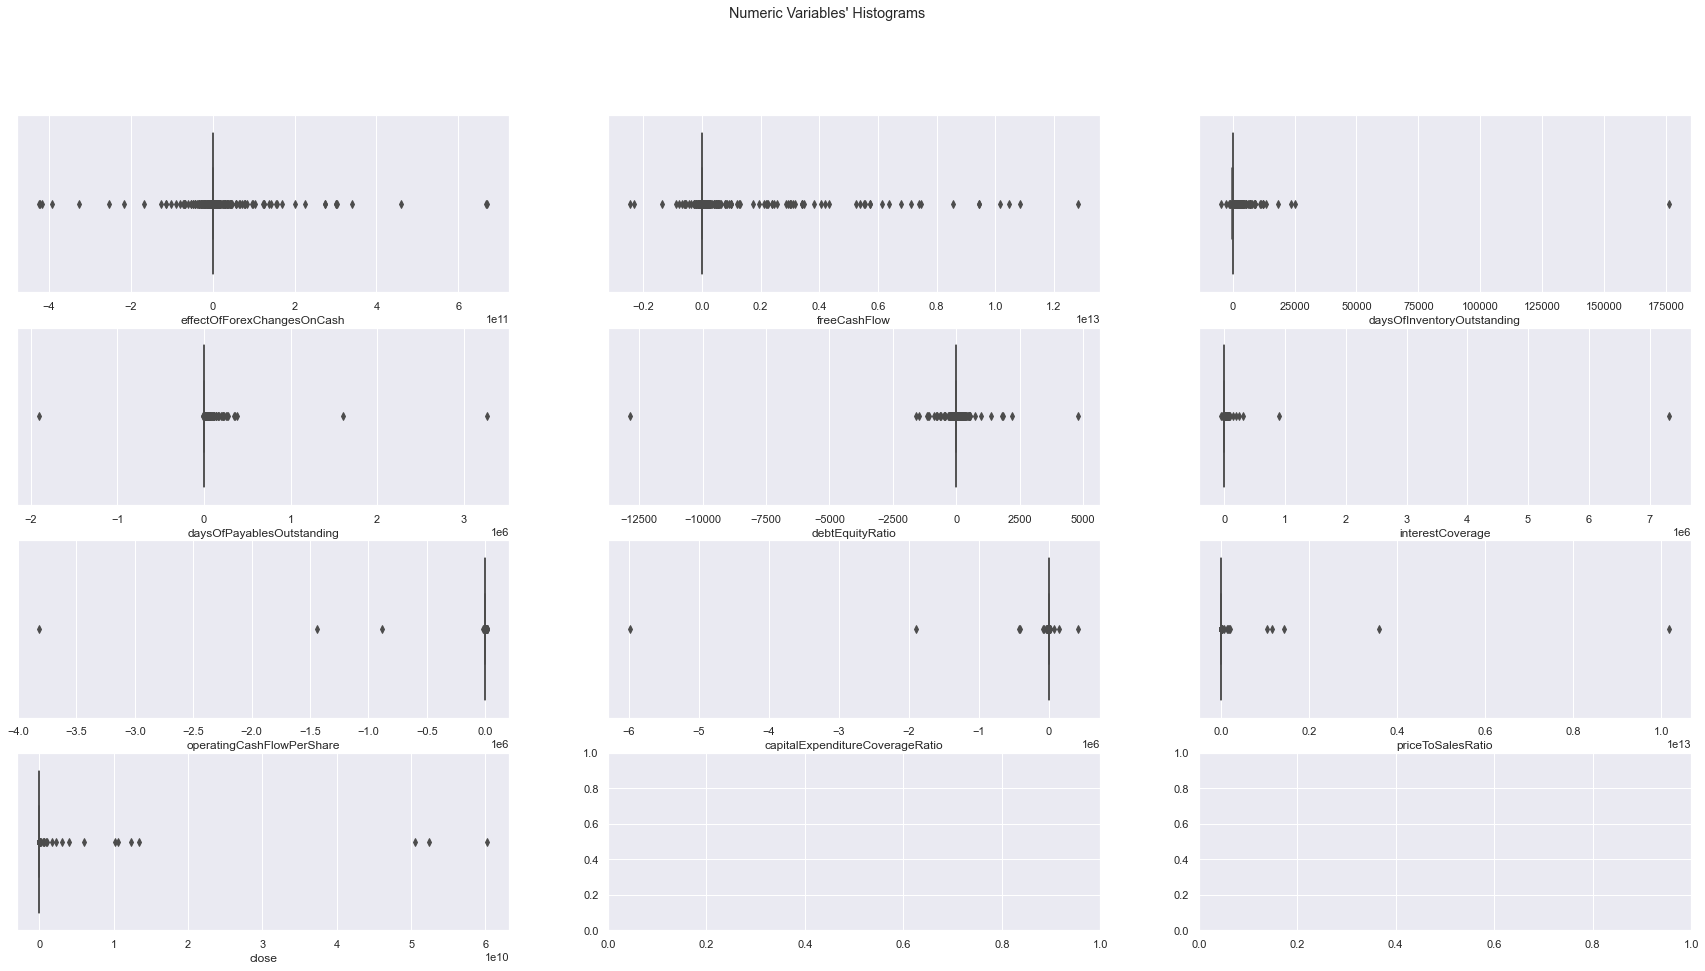

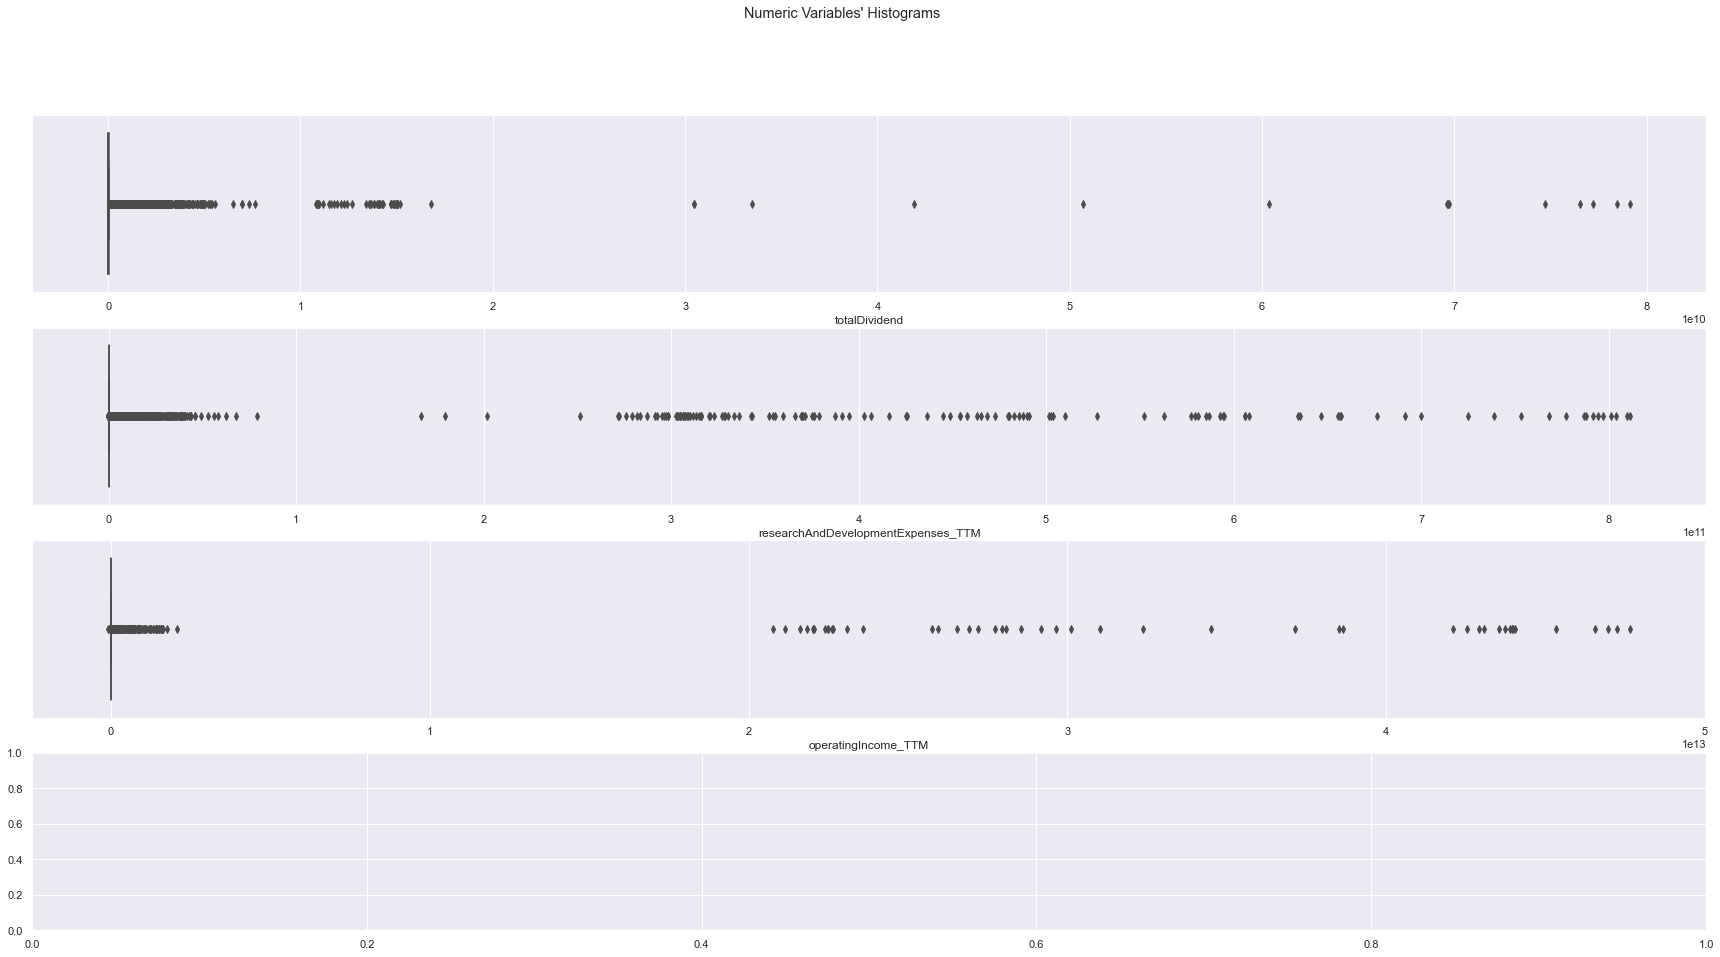

In [39]:
n = 10
for idx in np.arange(0, len(subset_15),n):
    f_idx = idx+n
    viz.boxplot(df_model[subset_15].iloc[:,idx:f_idx])
    


#### Feature Distribution after outliers removal 

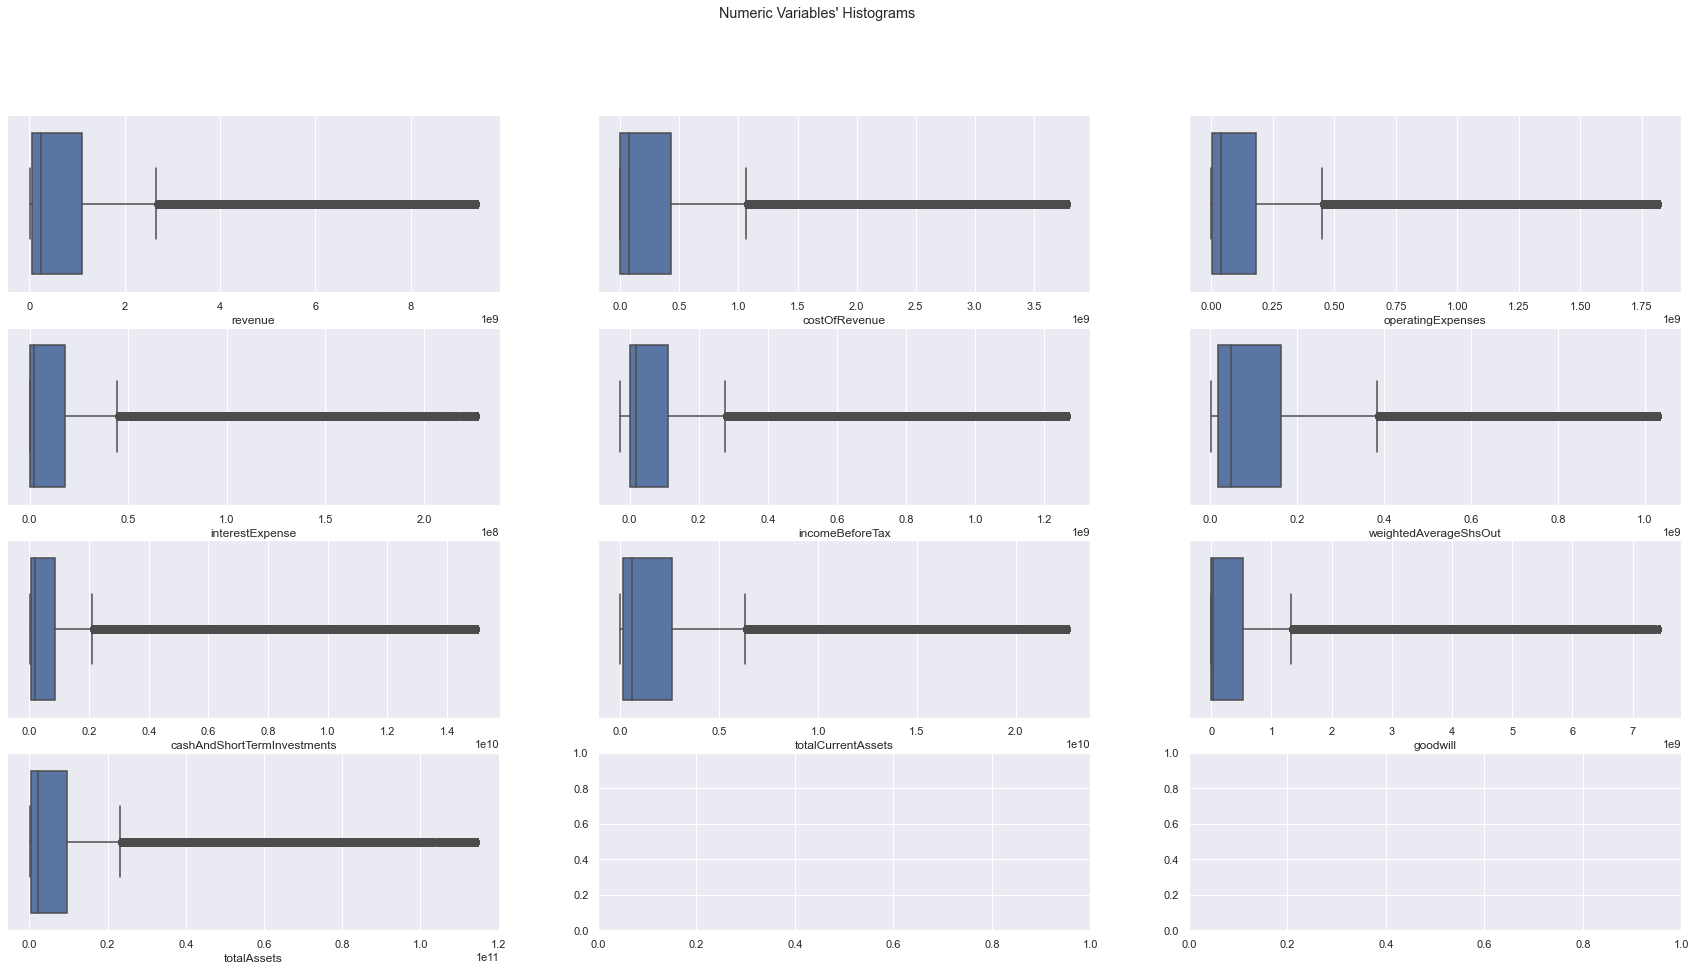

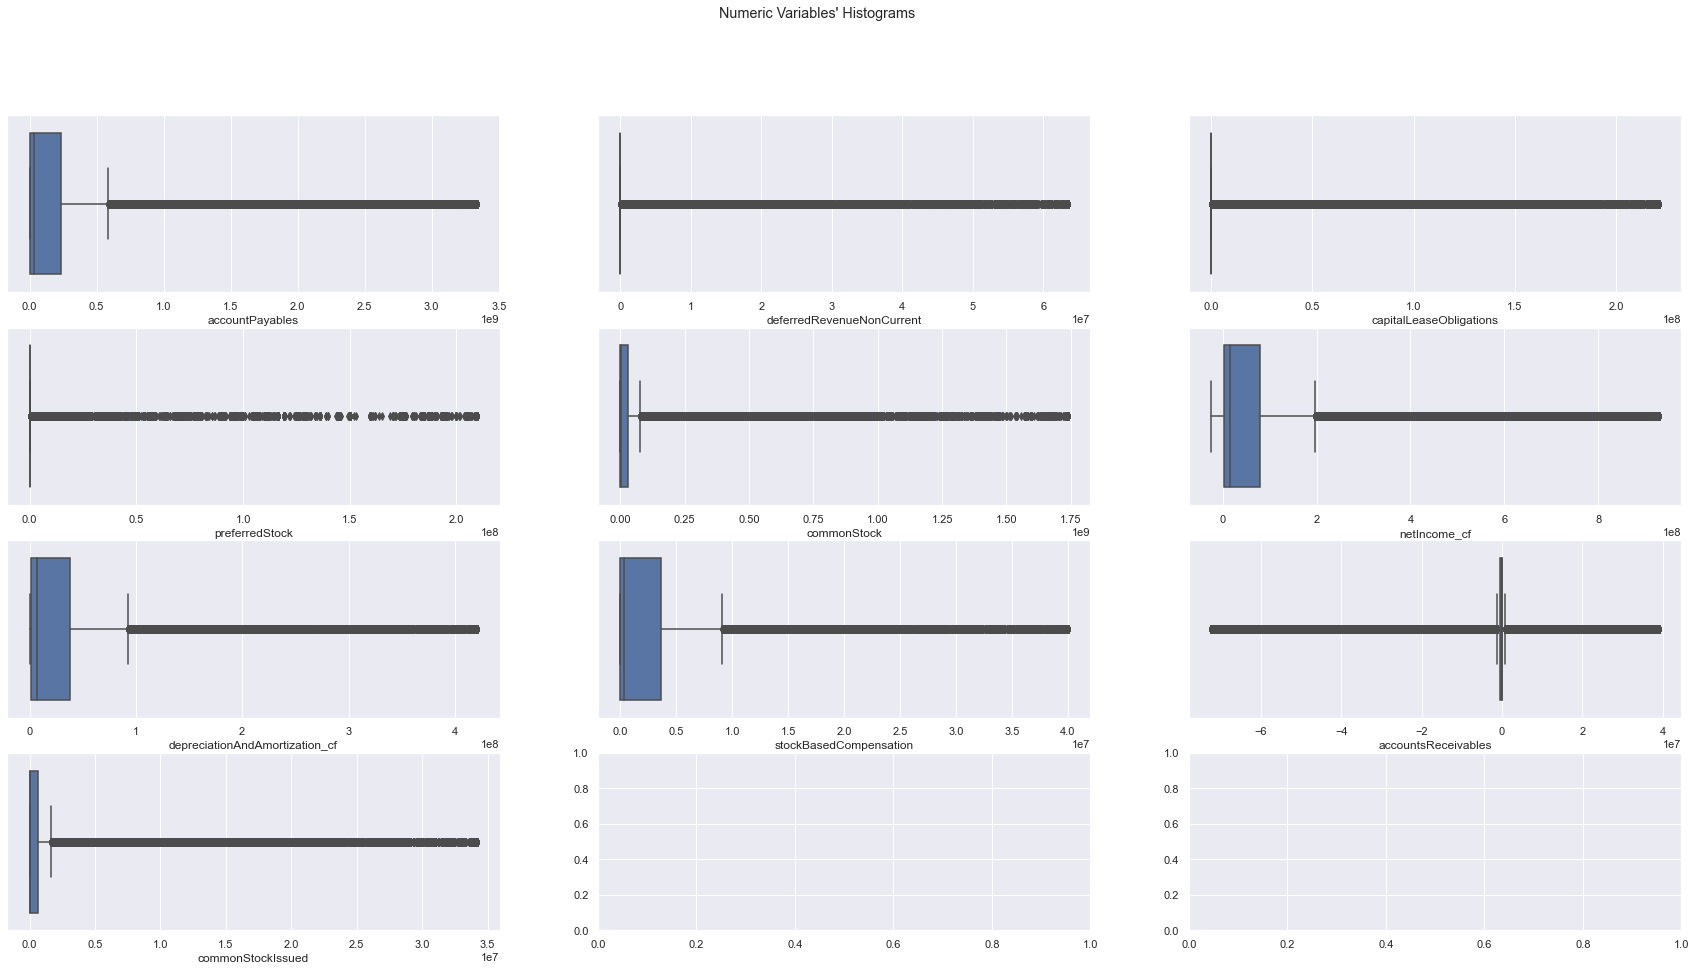

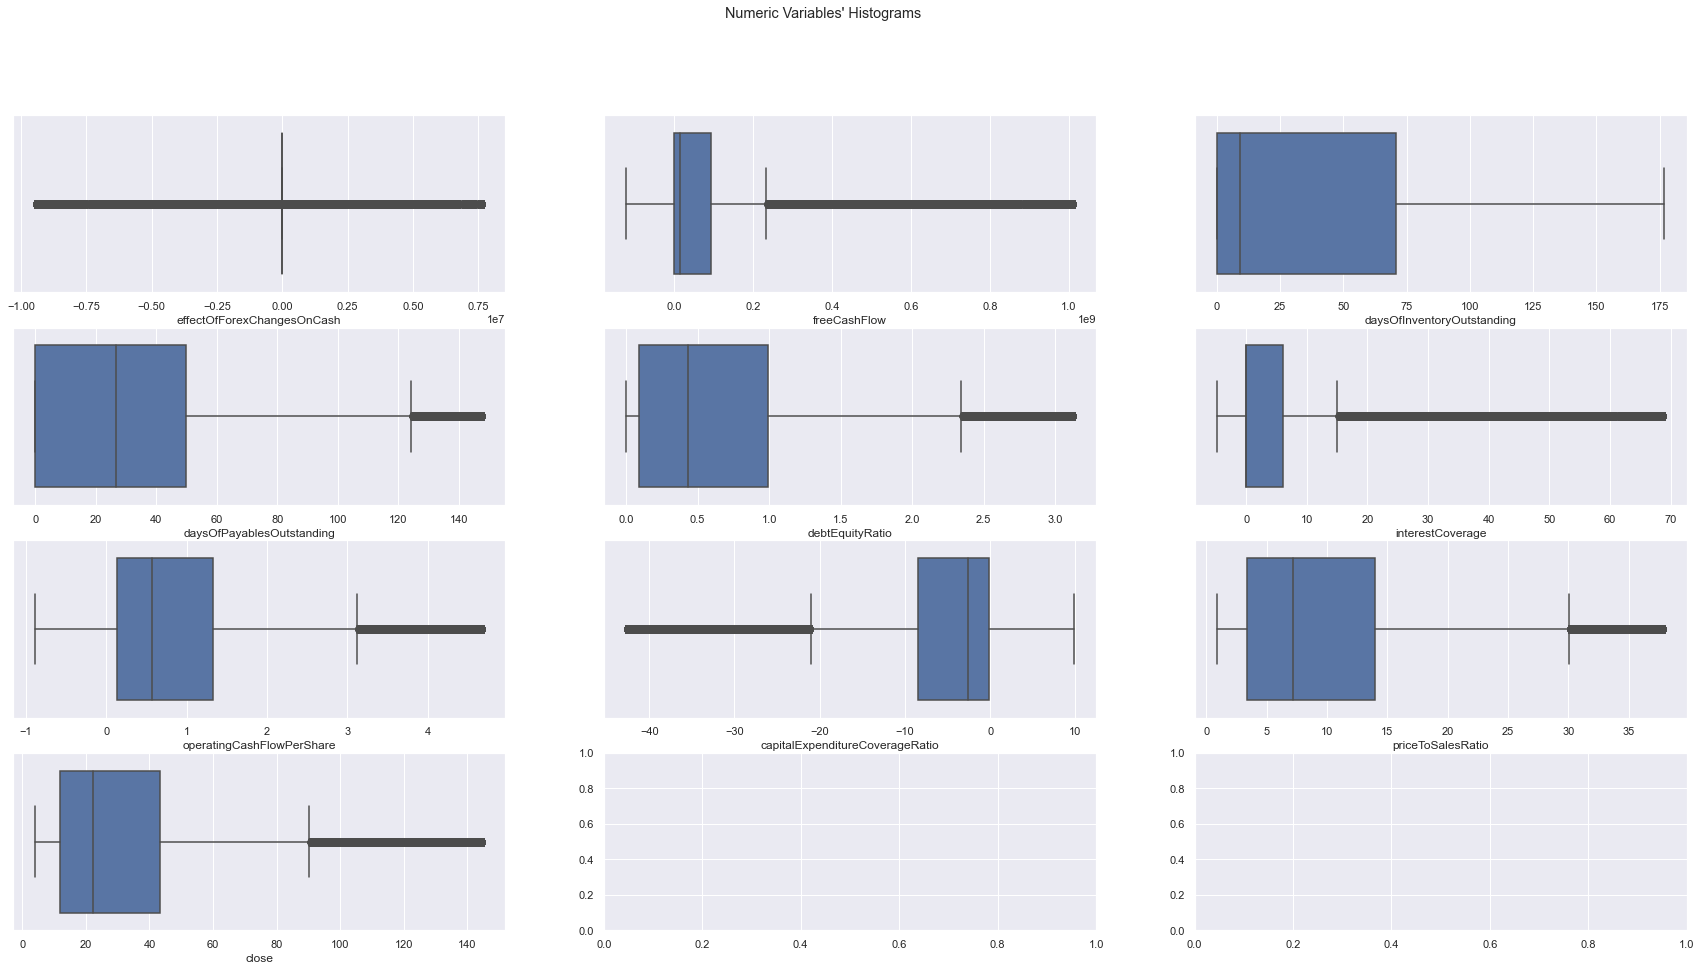

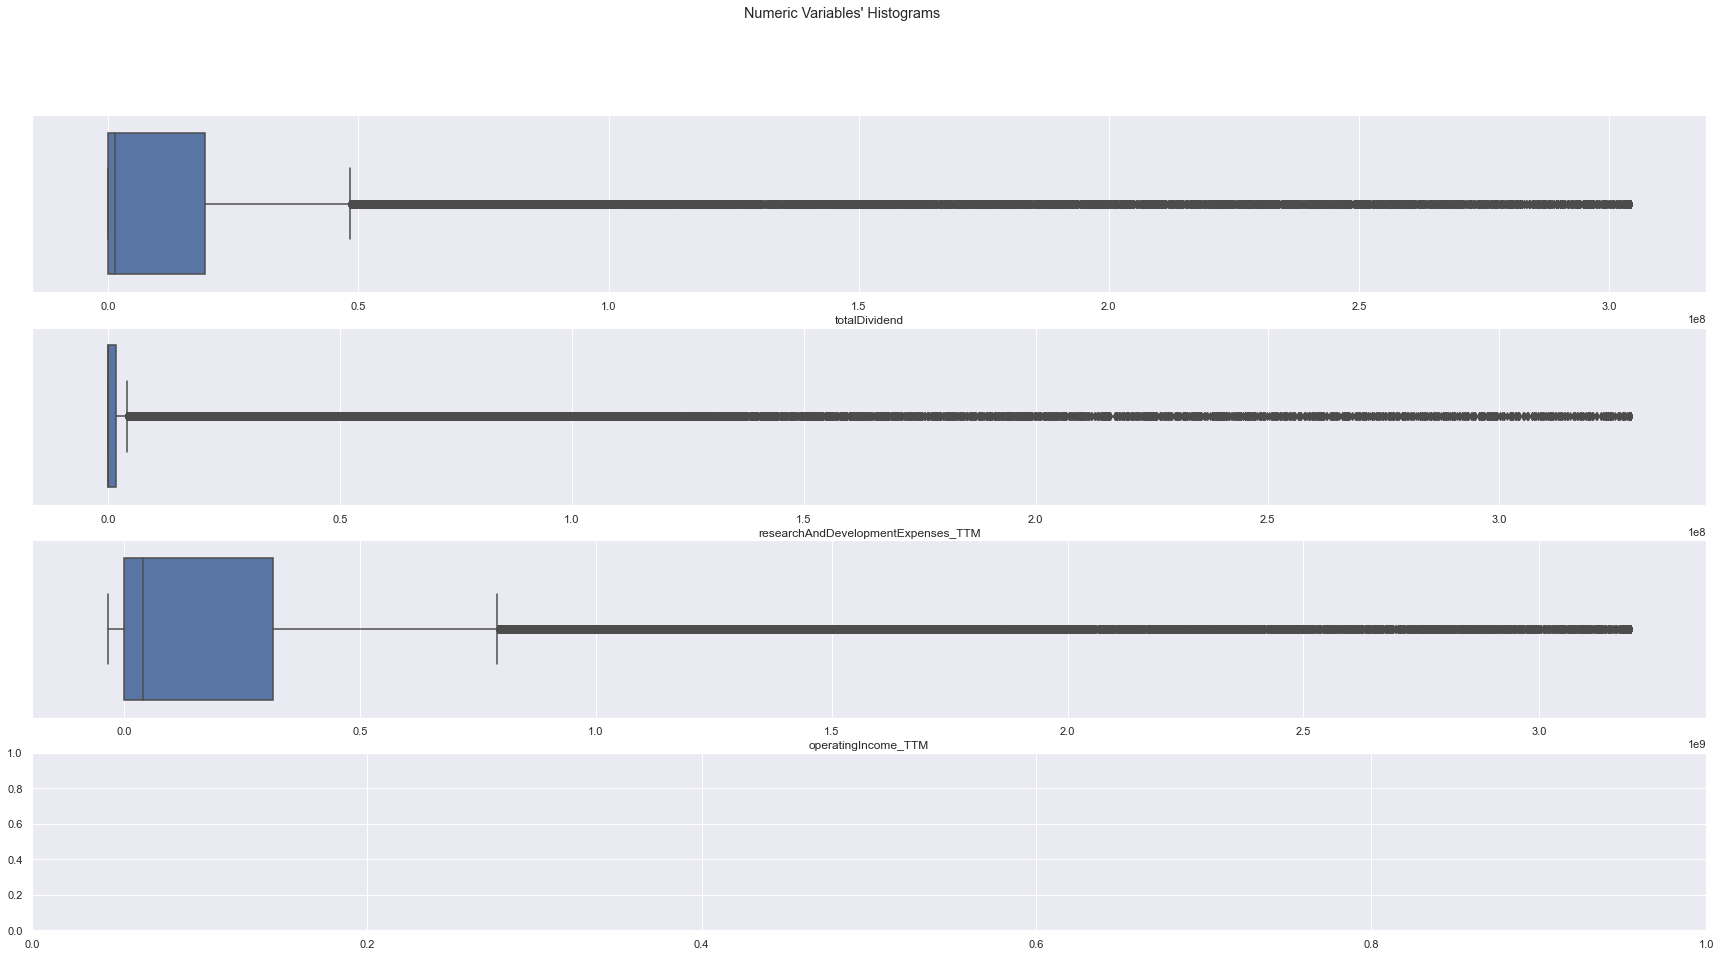

In [151]:
n = 10
for idx in np.arange(0, len(subset_15),n):
    f_idx = idx+n
    viz.boxplot(df_model_out[subset_15].iloc[:,idx:f_idx])
    


### Compare Revenue before and after Winsorizing

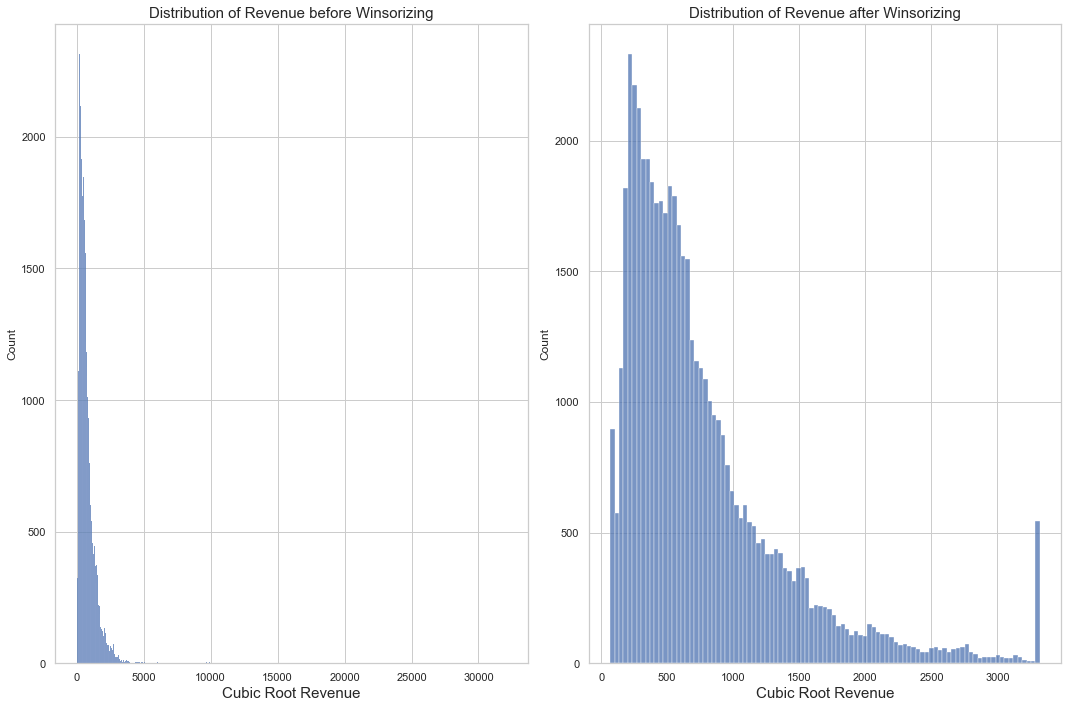

In [19]:
plt.figure(figsize = (15,10))

ax1 = plt.subplot(1,2,1)

sns.histplot(x_train_skew['revenue'],
             ax=ax1)
ax1.set_title('Distribution of Revenue before Winsorizing',
              size = 15)
ax1.set_xlabel('Cubic Root Revenue',
               size = 15)

ax2 = plt.subplot(1,2,2)
sns.histplot(x_train_out_skew['revenue'],
             ax=ax2)

ax2.set_title('Distribution of Revenue after Winsorizing',
              size = 15)
ax2.set_xlabel('Cubic Root Revenue',size = 15)

plt.tight_layout()

full_title = 'Revenue Distribution'
path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\FeatureDistribution'
name_plot = f'{path}\\{full_title}.png'
plt.savefig(name_plot, dpi=300)

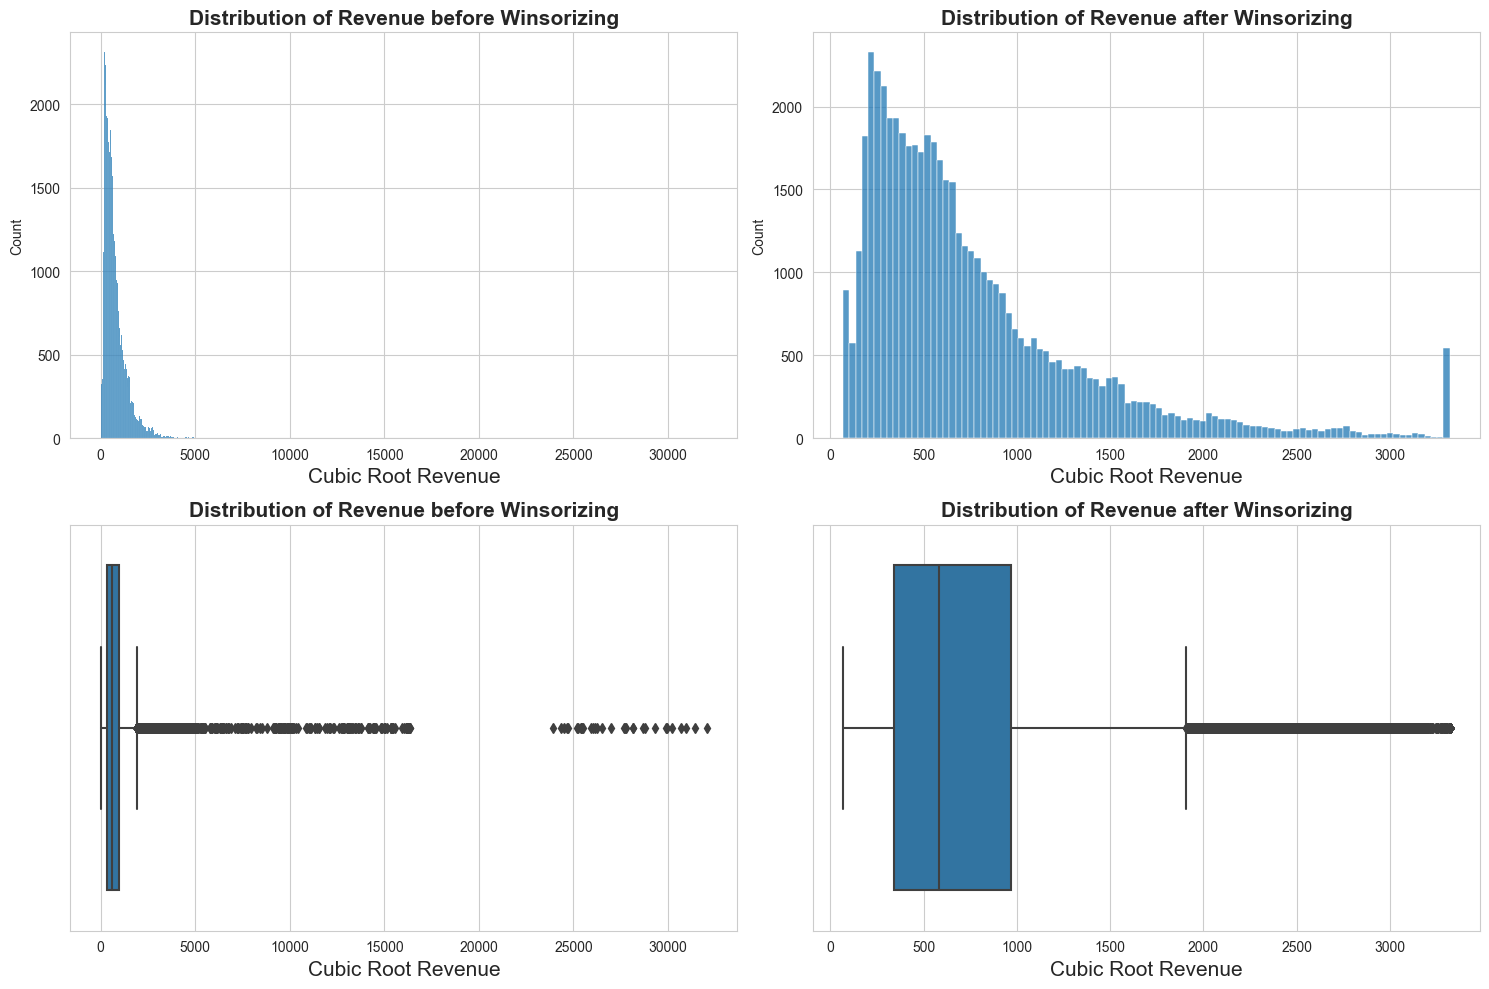

In [24]:
plt.figure(figsize = (15,10))

ax1 = plt.subplot(2,2,1)

sns.histplot(x_train_skew['revenue'],
             ax=ax1)
ax1.set_title('Distribution of Revenue before Winsorizing',
              size = 15,weight= 'bold')
ax1.set_xlabel('Cubic Root Revenue',
               size = 15)

ax2 = plt.subplot(2,2,2)
sns.histplot(x_train_out_skew['revenue'],
             ax=ax2)

ax2.set_title('Distribution of Revenue after Winsorizing',
              size = 15,weight= 'bold')
ax2.set_xlabel('Cubic Root Revenue',size = 15)


ax1 = plt.subplot(2,2,3)

sns.boxplot(x= x_train_skew['revenue'].values,
             ax=ax1)
ax1.set_title('Distribution of Revenue before Winsorizing',
              size = 15,weight= 'bold')
ax1.set_xlabel('Cubic Root Revenue',
               size = 15, )

ax2 = plt.subplot(2,2,4)
sns.boxplot(x= x_train_out_skew['revenue'].values,
             ax=ax2)

ax2.set_title('Distribution of Revenue after Winsorizing',
              size = 15, weight = 'bold')
ax2.set_xlabel('Cubic Root Revenue',size = 15,)

plt.tight_layout()

full_title = 'Revenue Distribution'
path = r'D:\Thesis Reseearch\Asset Allocation - Clean\Asset-Allocation\Long-Term-CAPM\Exports'
name_plot = f'{path}\\{full_title}.png'
plt.savefig(name_plot, dpi=600)

## __Remove Outliers__

The goal is to test the perfomance of a baseline model on the training set using different outlier removal techniques. The baseline model used is a Logistic Regression, subset_0 and subset_15 is are used for Target_0 and Target_15 respectivevly to test different outlier removal techniques.  
The following techniques are going to be tested:  
- No Removal - no outliers are rermoved  
- Isolation Forest - using Isolation Forest to detect outlier automatically, contamination rate of 3% is used  
- Winsoring Transformation - extreme values are replaced to a specific quantile, in this case values lower than the 1% quantile are replaced by the 1% quantile and values higher than 99% quantile are replaced by the 99% quantile  

## Target 0 

#### Set columns that are needed for the test

In [31]:
cols = [*subset_0,*['CAPM', 'adjCAPM', 'Target_0.15','Target_0']]

### __Transformed data with Standartization - All Features__

#### No Removal

In [5]:
model = LogisticRegression(random_state=0,)

date = '2018-01-01'

to_test = x_train_skew.fillna(0).select_dtypes(include=np.number)


lr_NoRemoval = class_cv.validateModel(to_test,
                                  y_train_dict_skew['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_NoRemoval = lr_NoRemoval['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.567865
f1_train           0.615420
recall_train       0.667417
precision_train    0.570970
auc_train          0.564132
accuracy_test      0.542933
f1_test            0.590098
recall_test        0.640095
precision_test     0.551039
auc_test           0.539288
dtype: float64


#### Isolation Forest

In [6]:
model = LogisticRegression(random_state=0,)


to_test = df_model_skew.fillna(0)
outliers_0, df_model_out_0 = preprocess.Isolation_Forest(to_test,0.03)
df_model_out_0 = df_model_out_0.select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])


y = y_train_dict['Target_0'].loc[y_train_dict['Target_0'].index.isin(df_model_out_0.index)]
x = df_model_out_0.loc[df_model_out_0.index.isin(y.index)]

lr_IS = class_cv.validateModel(x[:],
                                  y,
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_IS = lr_IS['scores']

Isolation Forest lasted:
--- 30.479146003723145 seconds ---
 
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.568706
f1_train           0.615229
recall_train       0.665492
precision_train    0.572051
auc_train          0.565064
accuracy_test      0.542233
f1_test            0.589337
recall_test        0.640161
precision_test     0.550081
auc_test           0.538549
dtype: float64


#### Winsoring - Standartization

In [7]:
model = LogisticRegression(random_state=0,)

to_test = x_train_out_skew.fillna(0).select_dtypes(include=np.number)

lr_win = class_cv.validateModel(to_test[:],
                                   y_train_dict_skew['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_win = lr_win['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.565122
f1_train           0.613669
recall_train       0.666691
precision_train    0.568478
auc_train          0.561313
accuracy_test      0.542325
f1_test            0.590781
recall_test        0.644242
precision_test     0.549974
auc_test           0.538500
dtype: float64


#### Compare Results

In [18]:
assess_dict = {}

assess_dict['lr_NoRemoval'] = lr_NoRemoval.iloc[:,:]
assess_dict['lr_IS'] = lr_IS.iloc[:,:]
assess_dict['lr_win'] = lr_win.iloc[:,:]

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])

full_assess_df = assess_df.copy()
path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\PerfomanceTests\Outlier Removal\outlierRemovalPerformance_Target_0.csv'
full_assess_df.to_csv(path)

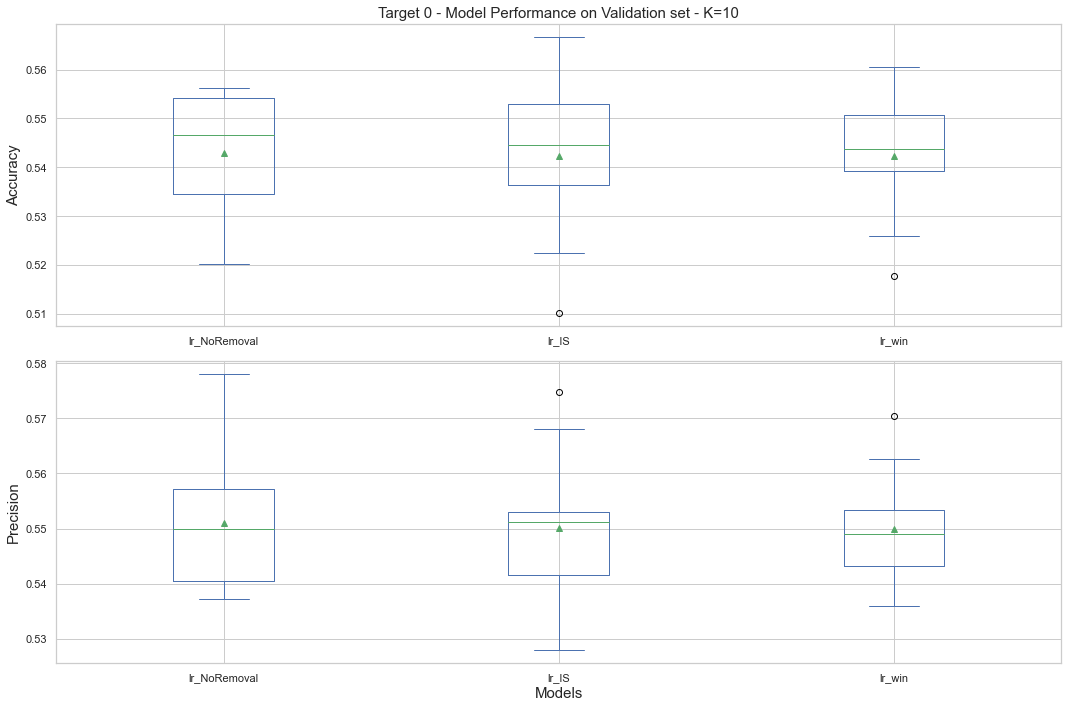

In [28]:
a = full_assess_df.copy()

title = 'Target 0 - Model Performance on Validation set - K=10'
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 1, 1)
df_assess = pd.DataFrame()
for model in a.test.unique():
    df_assess[model] = a.loc[a['test']==model,'accuracy_test'].values
df_assess.plot(kind='box', title='boxplot', showmeans=True,ax=ax1)
ax1.set_title(title, size=15)
ax1.set_xlabel('', size=15)
ax1.set_ylabel('Accuracy', size=15)


ax2 = plt.subplot(2, 1, 2, ) # Share x-axis ticks with ax1
df_assess = pd.DataFrame()
for model in a.test.unique():
    df_assess[model] = a.loc[a['test']==model,'precision_test'].values
df_assess.plot(kind='box', showmeans=True,ax=ax2)

ax2.set_xlabel('Models', size=15)
ax2.set_ylabel('Precision', size=15)
plt.tight_layout()

path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\PerfomanceTests\Outlier Removal'
name_plot = f'{path}\\{title}-OutlierRemoval.png'
plt.savefig(name_plot, dpi=300)
plt.show()

In [8]:
assess_dict = {}

assess_dict['lr_NoRemoval'] = lr_NoRemoval.iloc[:,-5:].mean()
assess_dict['lr_IS'] = lr_IS.iloc[:,-5:].mean()
assess_dict['lr_win'] = lr_win.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])

full_assess_df = assess_df.copy()
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0'
display(assess_df)

metric        accuracy_test  auc_test   f1_test  precision_test  recall_test  \
test                                                                           
lr_IS              0.542233  0.538549  0.589337        0.550081     0.640161   
lr_NoRemoval       0.542933  0.539288  0.590098        0.551039     0.640095   
lr_win             0.542325  0.538500  0.590781        0.549974     0.644242   

metric          Target  
test                    
lr_IS         Target_0  
lr_NoRemoval  Target_0  
lr_win        Target_0

## Target 15 

#### Set columns that are needed for the test

In [43]:
cols = [*subset_15,*['CAPM', 'adjCAPM', 'Target_0.15','Target_0']]

### __Transformed data with Standartization - All Features__

#### No Removal

In [29]:
model = LogisticRegression(random_state=0,class_weight='balanced')

date = '2018-01-01'

to_test = x_train_skew.fillna(0).select_dtypes(include=np.number)


lr_NoRemoval = class_cv.validateModel(to_test,
                                  y_train_dict_skew['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_NoRemoval = lr_NoRemoval['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.646294
f1_train           0.349050
recall_train       0.667589
precision_train    0.236305
auc_train          0.655179
accuracy_test      0.622370
f1_test            0.323715
recall_test        0.613528
precision_test     0.226715
auc_test           0.618686
dtype: float64


#### Isolation Forest

In [30]:
model = LogisticRegression(random_state=0,class_weight='balanced')

to_test = df_model_skew.fillna(0)
outliers_0, df_model_out_0 = preprocess.Isolation_Forest(to_test,0.03)

df_model_out_0 = df_model_out_0.select_dtypes(include=np.number).drop(columns = ['CAPM','adjCAPM'])


y = y_train_dict['Target_0.15'].loc[y_train_dict['Target_0.15'].index.isin(df_model_out_0.index)]
x = df_model_out_0.loc[df_model_out_0.index.isin(y.index)]

lr_IS = class_cv.validateModel(x[:],
                                  y,
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_IS = lr_IS['scores']

Isolation Forest lasted:
--- 31.6264705657959 seconds ---
 
stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.643013
f1_train           0.349758
recall_train       0.669416
precision_train    0.236725
auc_train          0.654004
accuracy_test      0.618774
f1_test            0.322143
recall_test        0.611384
precision_test     0.225488
auc_test           0.615691
dtype: float64


#### Winsoring - Standartization

In [31]:
model = LogisticRegression(random_state=0,class_weight='balanced')

to_test = x_train_out_skew.fillna(0).select_dtypes(include=np.number)

lr_win = class_cv.validateModel(to_test[:],
                                   y_train_dict_skew['Target_0.15'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)
lr_win = lr_win['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.643567
f1_train           0.347184
recall_train       0.667187
precision_train    0.234648
auc_train          0.653422
accuracy_test      0.619821
f1_test            0.326082
recall_test        0.621966
precision_test     0.228406
auc_test           0.620721
dtype: float64


#### Compare Results

In [32]:
assess_dict = {}

assess_dict['lr_NoRemoval'] = lr_NoRemoval.iloc[:,:]
assess_dict['lr_IS'] = lr_IS.iloc[:,:]
assess_dict['lr_win'] = lr_win.iloc[:,:]

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])

full_assess_df = assess_df.copy()
path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\PerfomanceTests\Outlier Removal\outlierRemovalPerformance_Target_15.csv'
full_assess_df.to_csv(path)

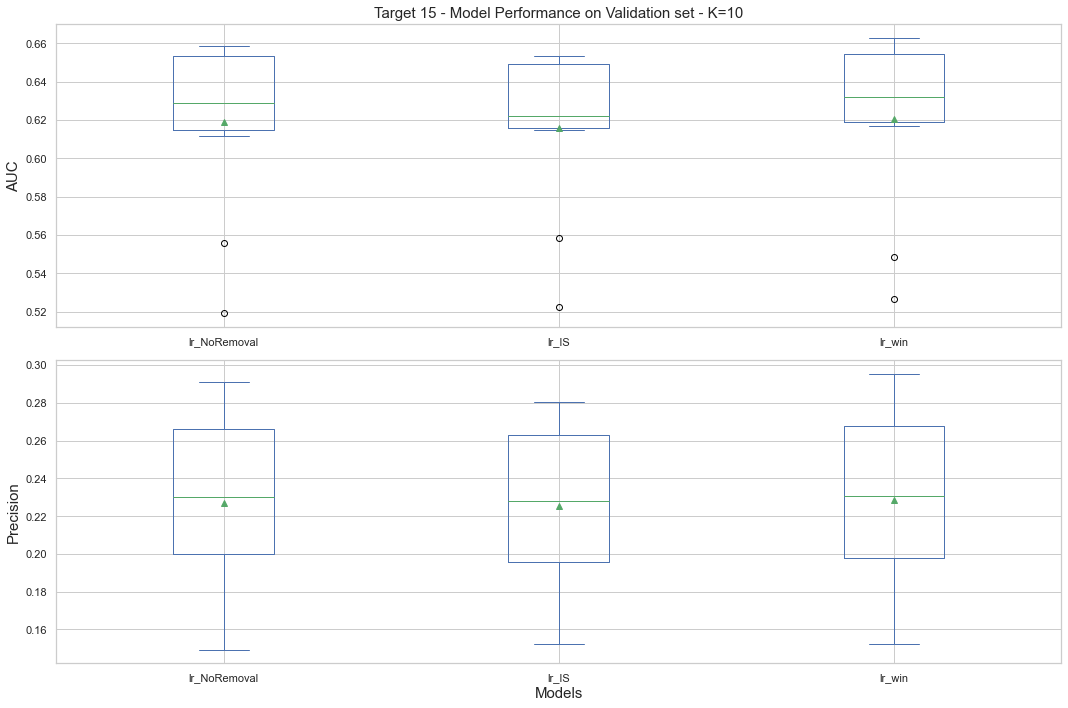

In [33]:
a = full_assess_df.copy()

title = 'Target 15 - Model Performance on Validation set - K=10'
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 1, 1)
df_assess = pd.DataFrame()
for model in a.test.unique():
    df_assess[model] = a.loc[a['test']==model,'auc_test'].values
df_assess.plot(kind='box', title='boxplot', showmeans=True,ax=ax1)
ax1.set_title(title, size=15)
ax1.set_xlabel('', size=15)
ax1.set_ylabel('AUC', size=15)


ax2 = plt.subplot(2, 1, 2, ) # Share x-axis ticks with ax1
df_assess = pd.DataFrame()
for model in a.test.unique():
    df_assess[model] = a.loc[a['test']==model,'precision_test'].values
df_assess.plot(kind='box', showmeans=True,ax=ax2)

ax2.set_xlabel('Models', size=15)
ax2.set_ylabel('Precision', size=15)
plt.tight_layout()

path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\PerfomanceTests\Outlier Removal'
name_plot = f'{path}\\{title}-OutlierRemoval.png'
plt.savefig(name_plot, dpi=300)
plt.show()

In [34]:
assess_dict = {}

assess_dict['lr_NoRemoval'] = lr_NoRemoval.iloc[:,-5:].mean()
assess_dict['lr_IS'] = lr_IS.iloc[:,-5:].mean()
assess_dict['lr_win'] = lr_win.iloc[:,-5:].mean()

assess_df = pd.DataFrame()
for key, values in assess_dict.items():
    values = values.iloc[-5:].reset_index().rename(columns = {'index':'metric'})
    values['test'] = key
    assess_df = pd.concat([assess_df, values])
    
assess_df = assess_df.groupby(['test','metric']).mean().unstack('metric').droplevel(None,axis=1)
assess_df['Target'] = 'Target_0.15'
display(assess_df)

metric        accuracy_test  auc_test   f1_test  precision_test  recall_test  \
test                                                                           
lr_IS              0.618774  0.615691  0.322143        0.225488     0.611384   
lr_NoRemoval       0.622370  0.618686  0.323715        0.226715     0.613528   
lr_win             0.619821  0.620721  0.326082        0.228406     0.621966   

metric             Target  
test                       
lr_IS         Target_0.15  
lr_NoRemoval  Target_0.15  
lr_win        Target_0.15

# __Target Distribution Analysis__

### __Distribution with Log Transformation__

#### Balance Sheet Features

Number of metric features : 11
Plotting a Sinle Figure


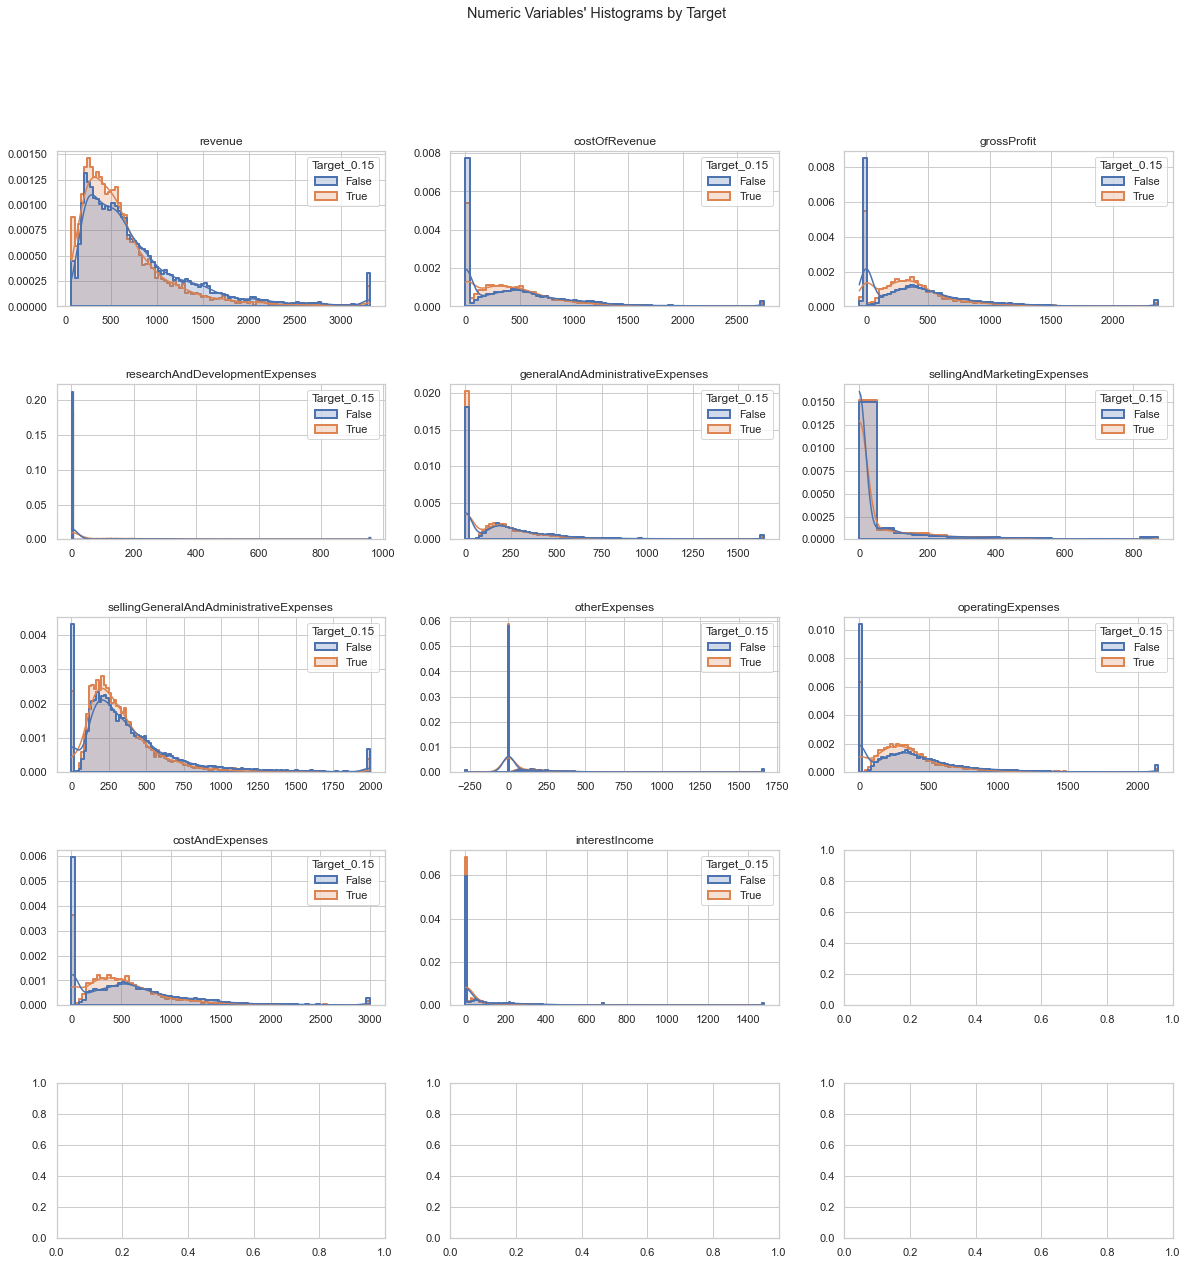

In [49]:
to_plot = x_train_out_skew[['revenue', 'costOfRevenue', 'grossProfit',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestIncome']]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,'Target_0.15')

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

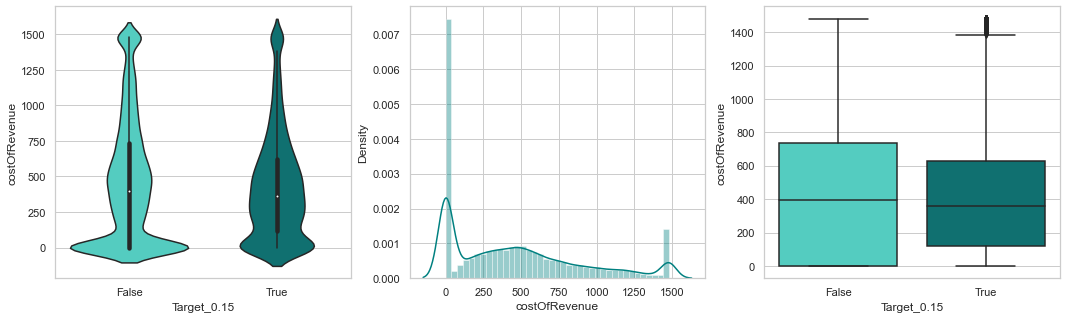

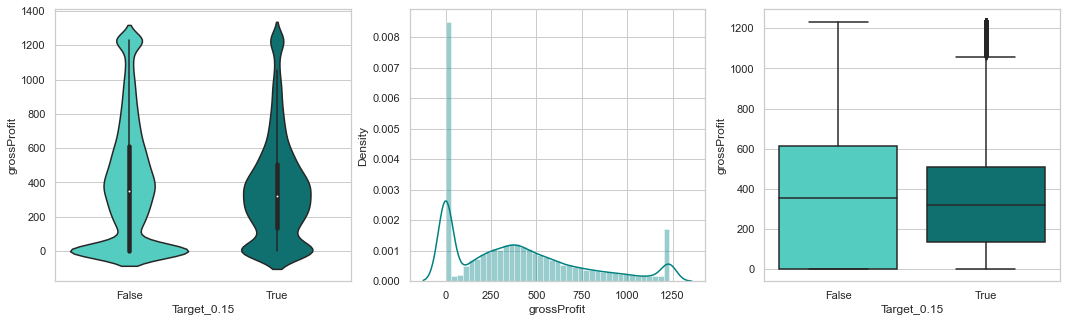

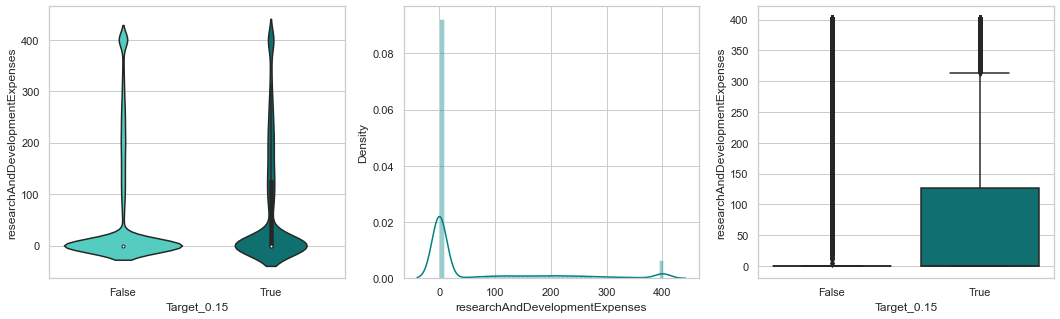

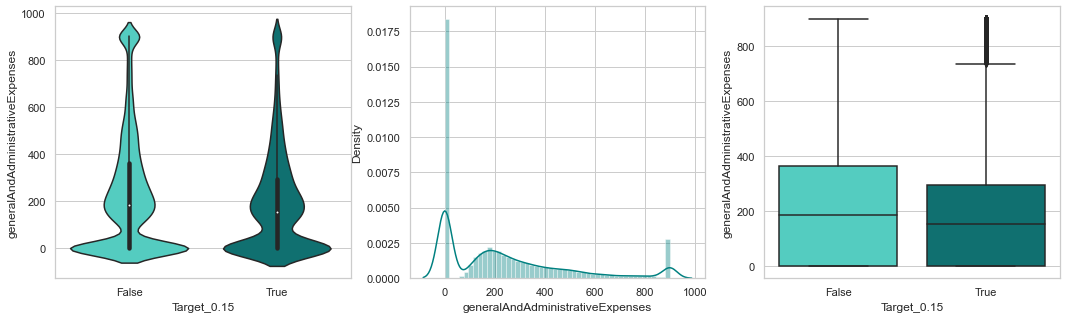

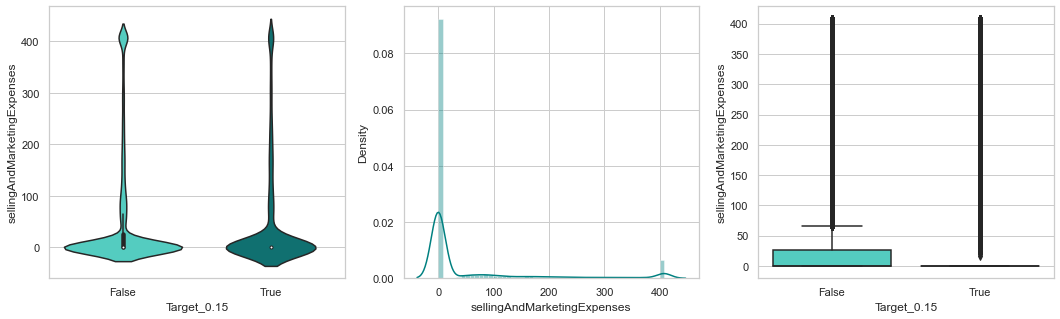

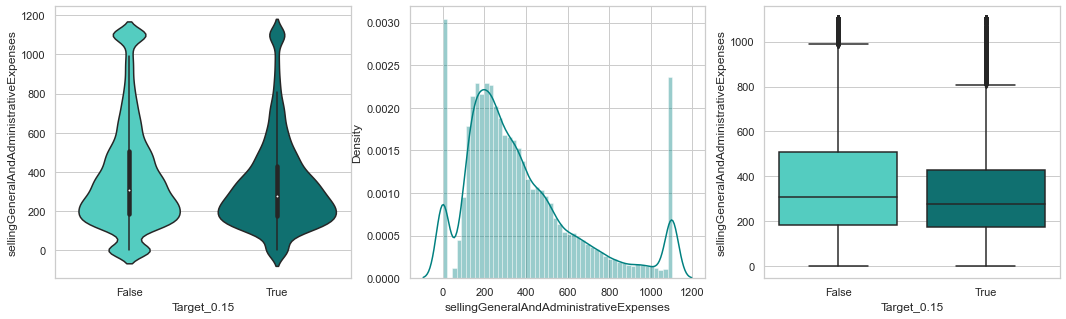

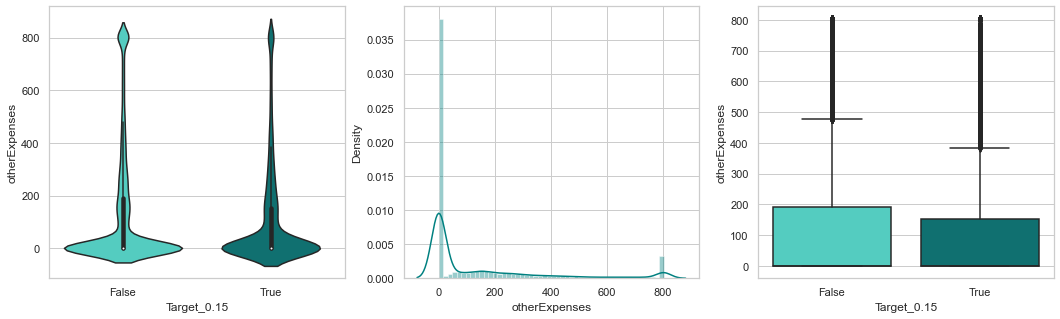

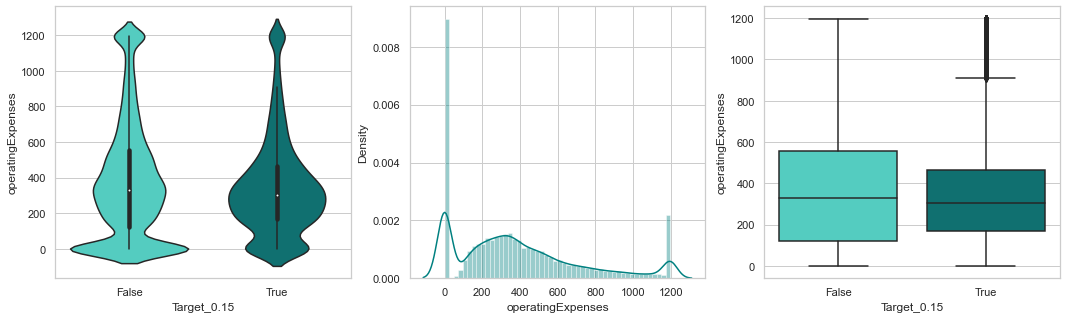

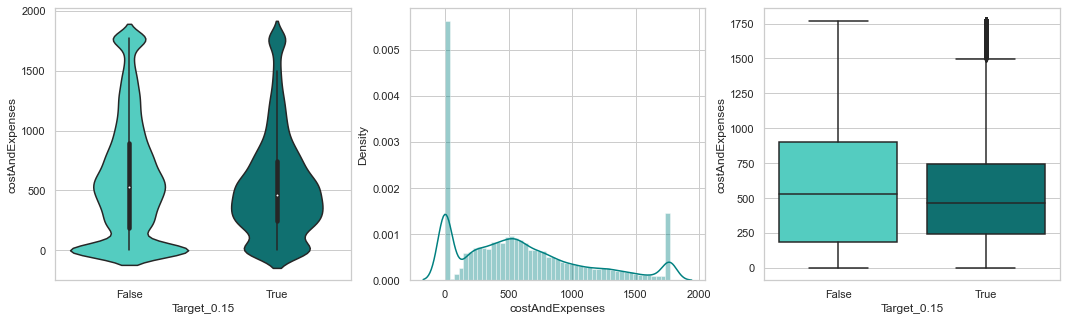

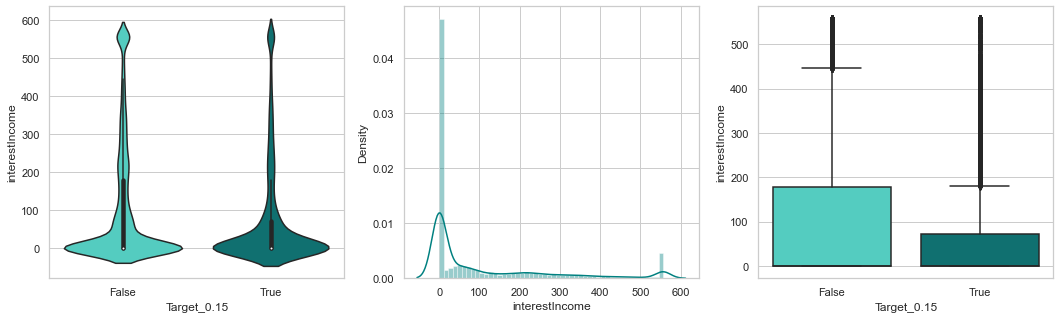

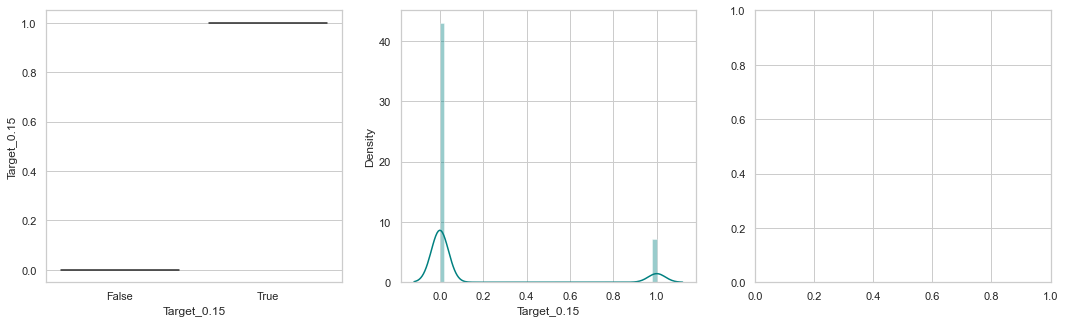

In [8]:
viz.univariate_target_analysis(to_plot, 'Target_0.15')

#### TTM Features

Number of metric features : 10
Plotting a Sinle Figure


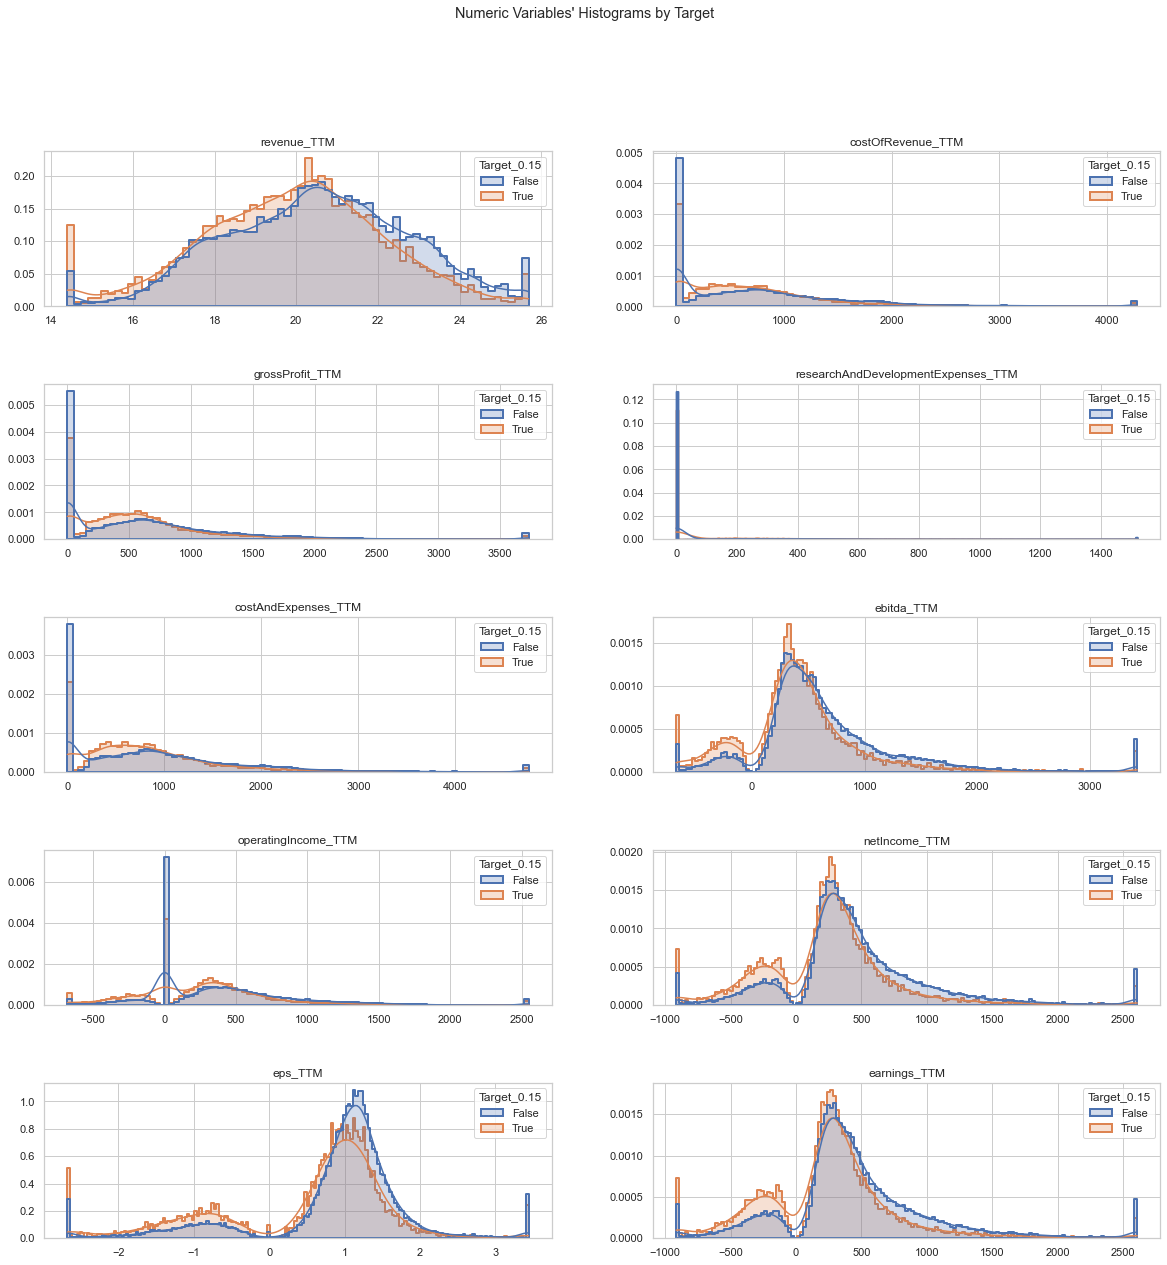

In [51]:
ttm_cols = x_train.columns[x_train.columns.str.contains('TTM')]

to_plot = x_train_out_skew[ttm_cols]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,'Target_0.15')

### Ratio Features

Number of metric features : 28
Plotting Multiple Figures


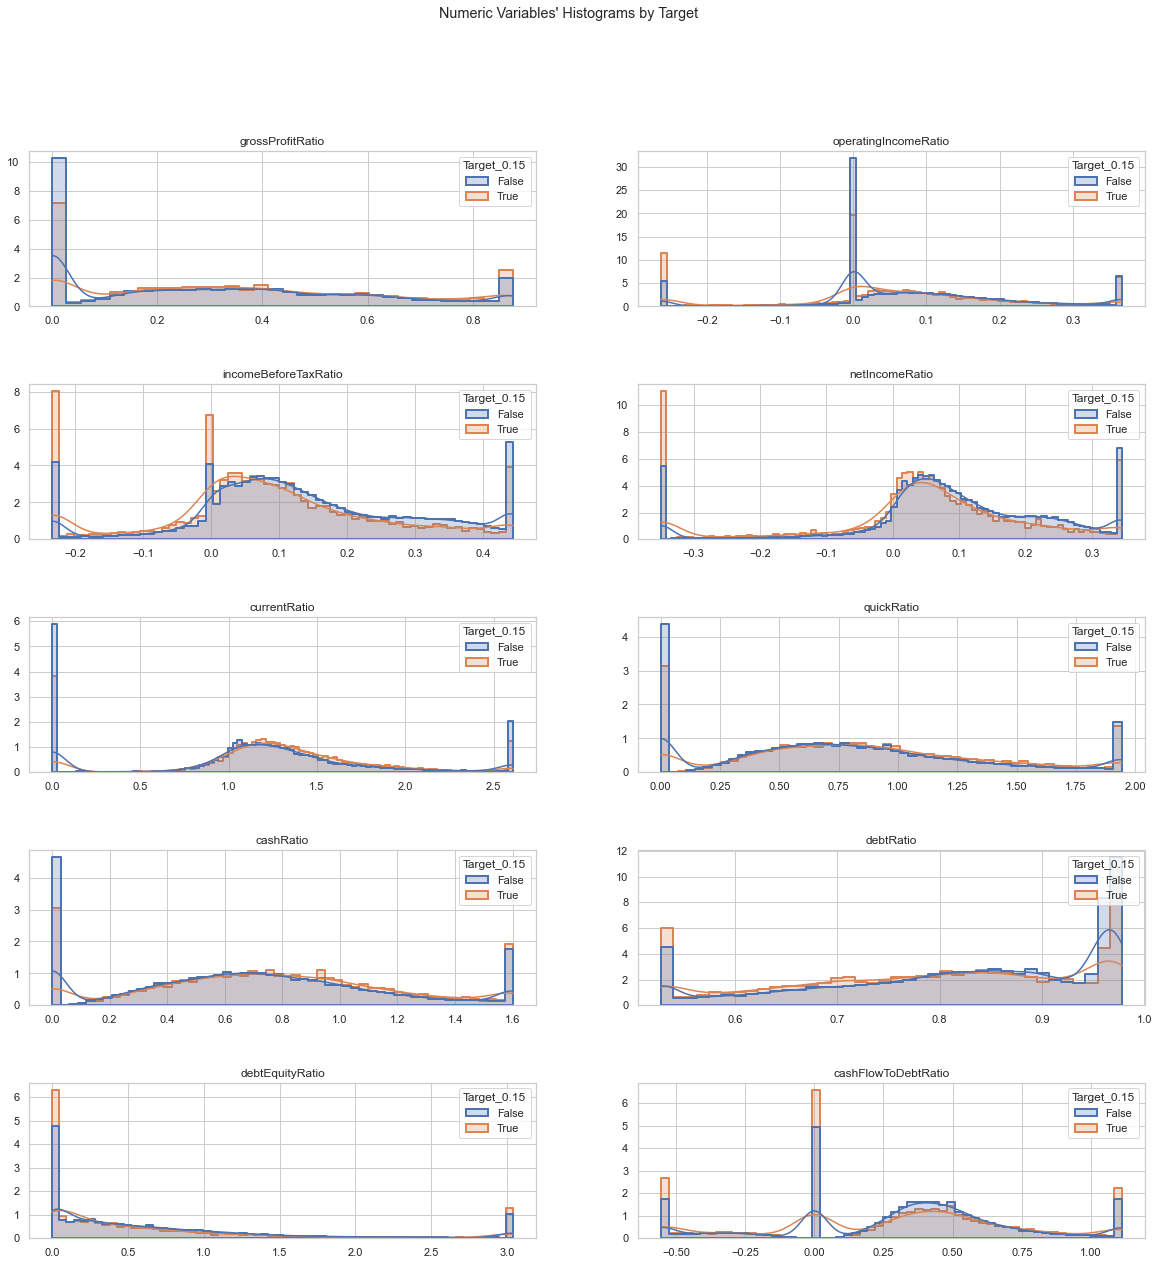

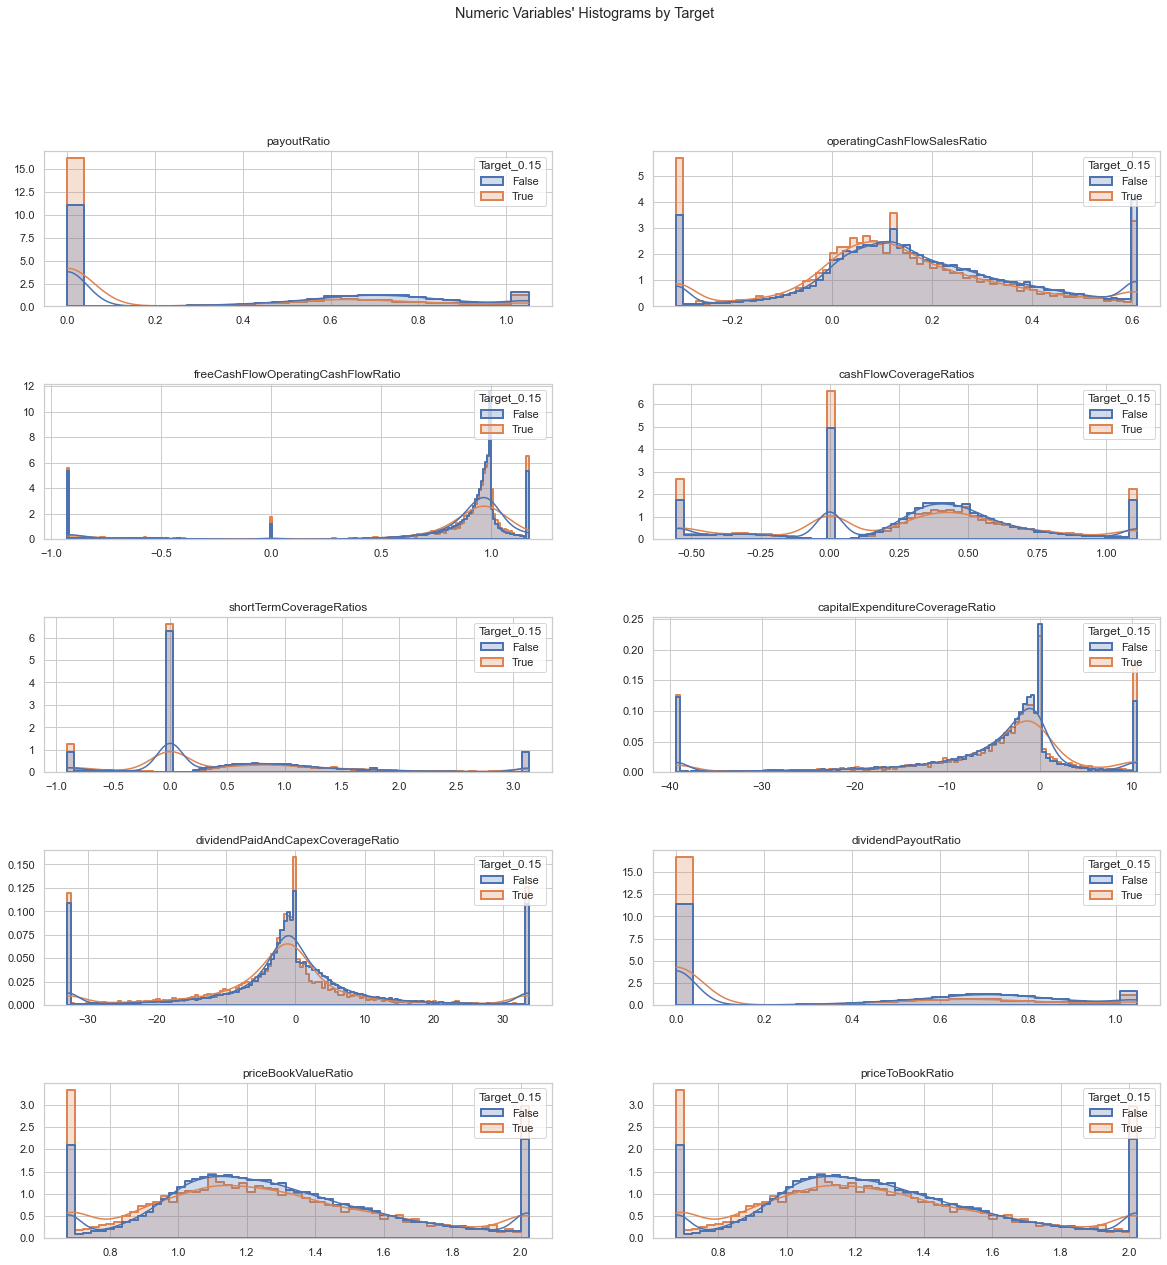

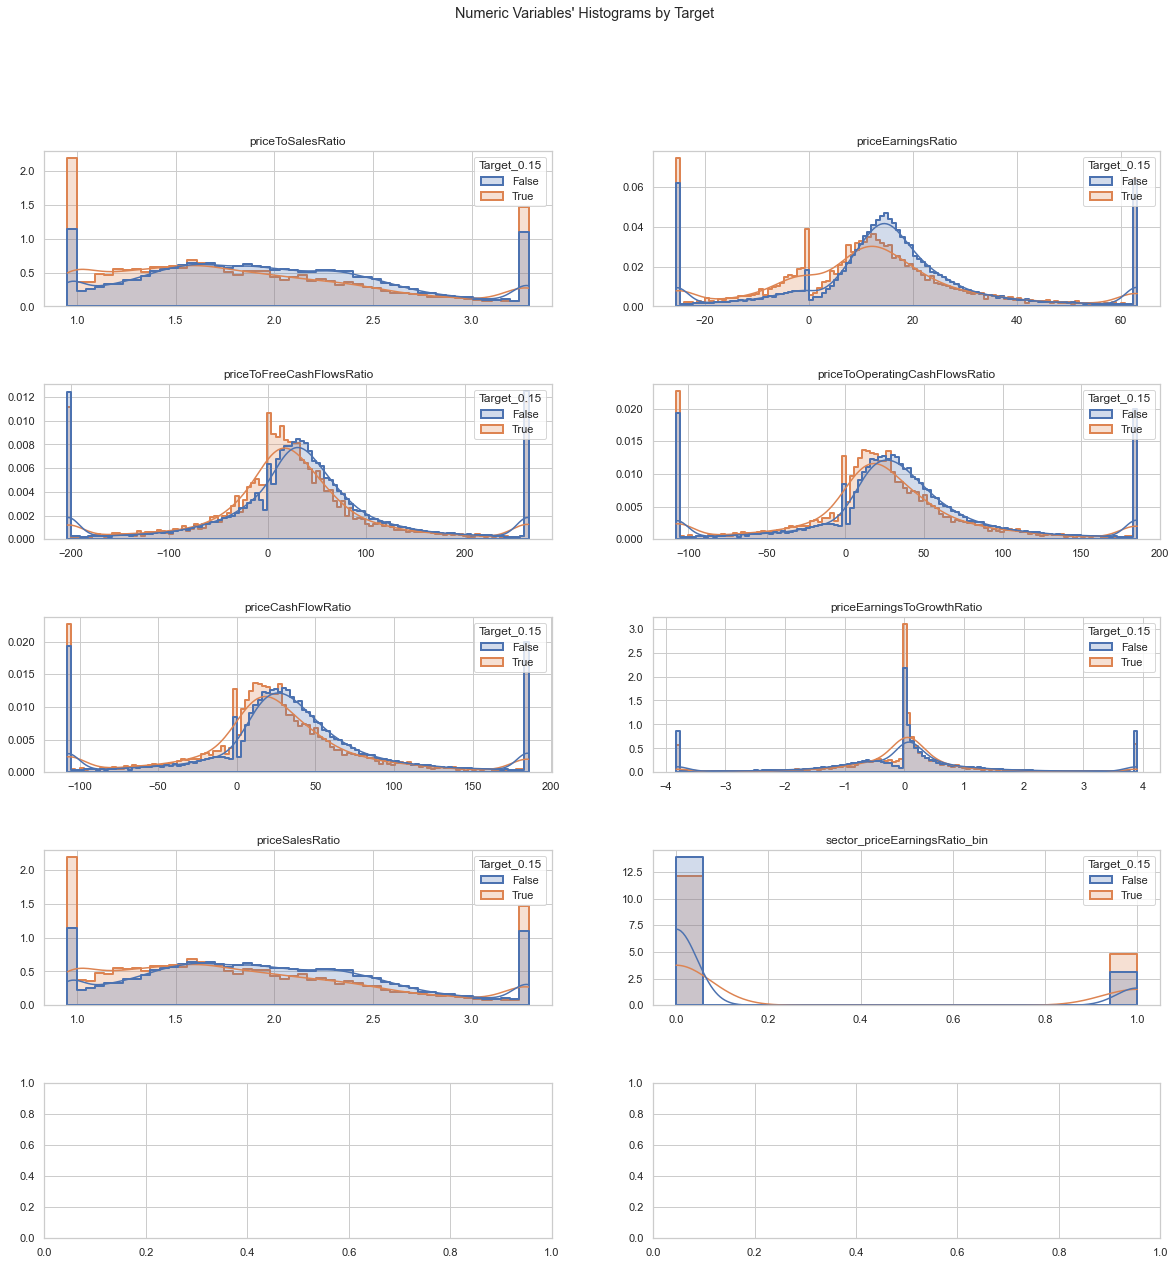

In [10]:
ratio_cols = x_train.columns[x_train.columns.str.contains('Ratio')]

to_plot = x_train_out[ratio_cols]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,'Target_0.15')

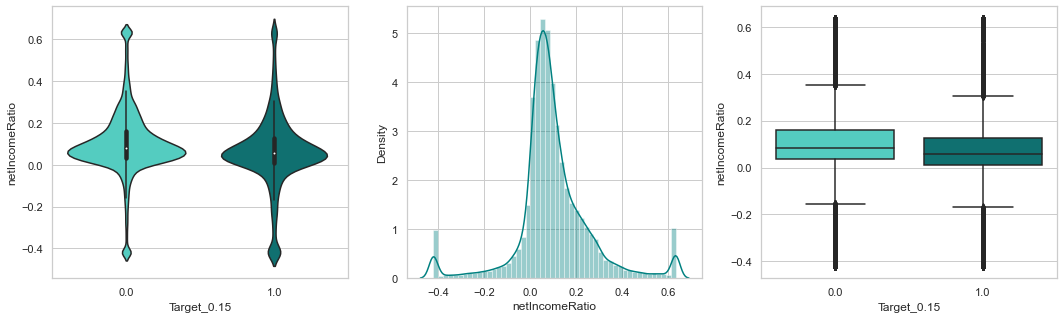

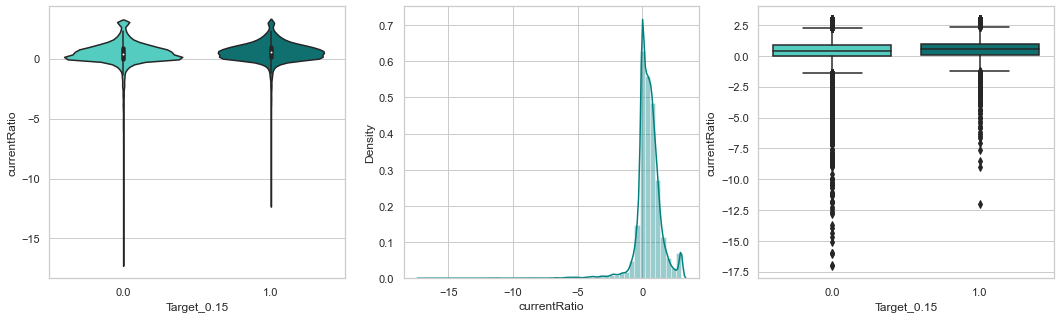

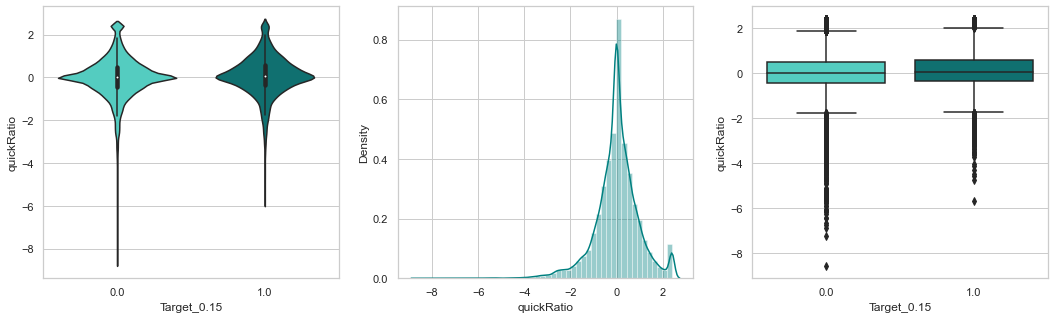

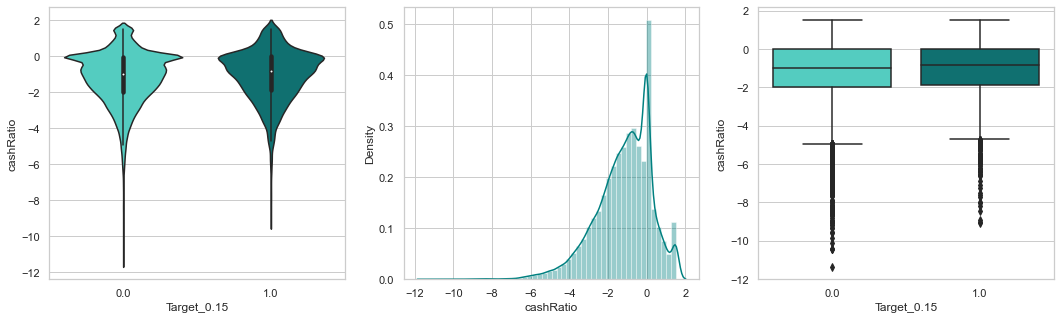

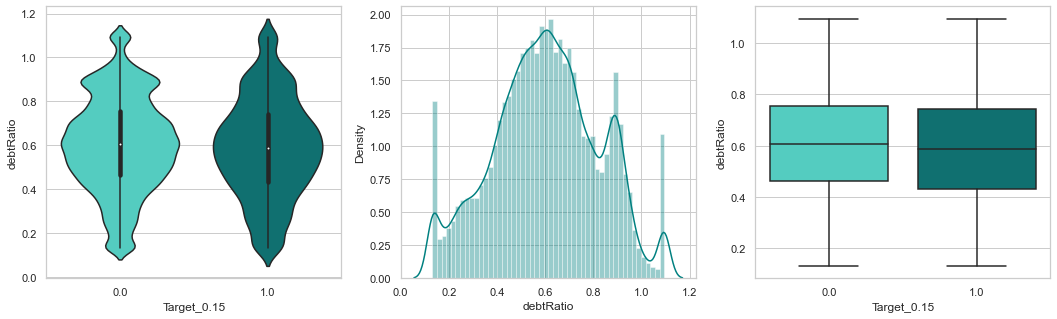

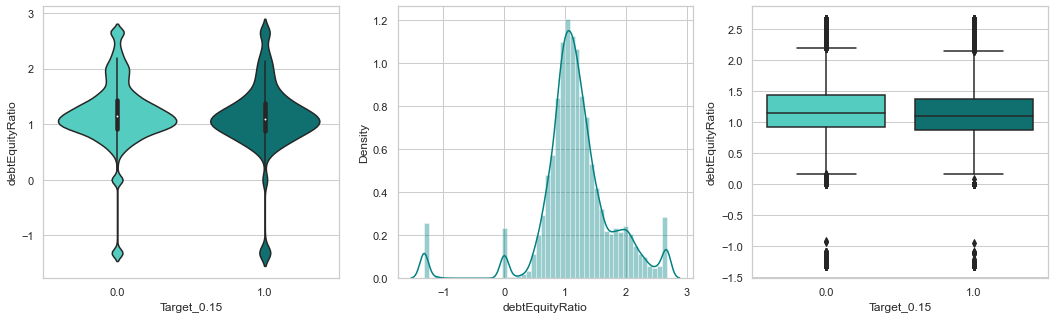

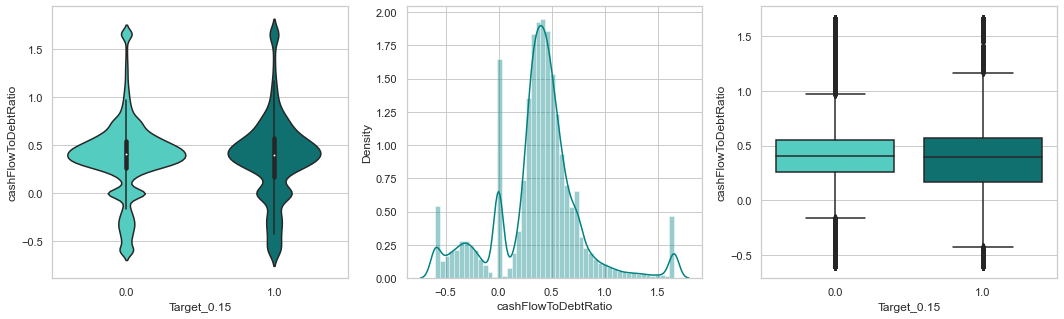

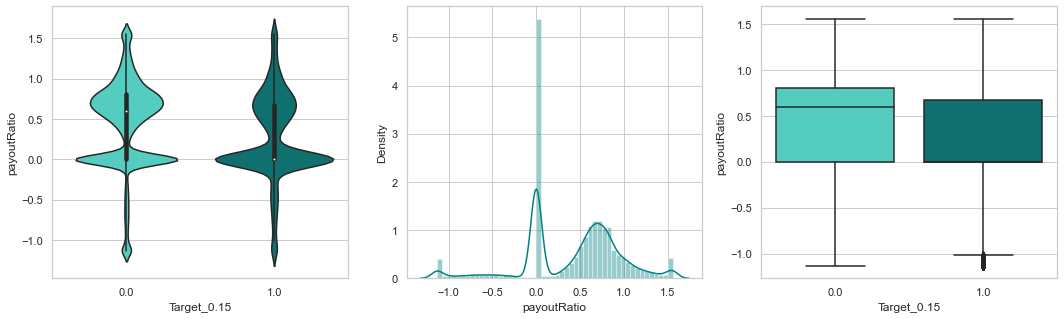

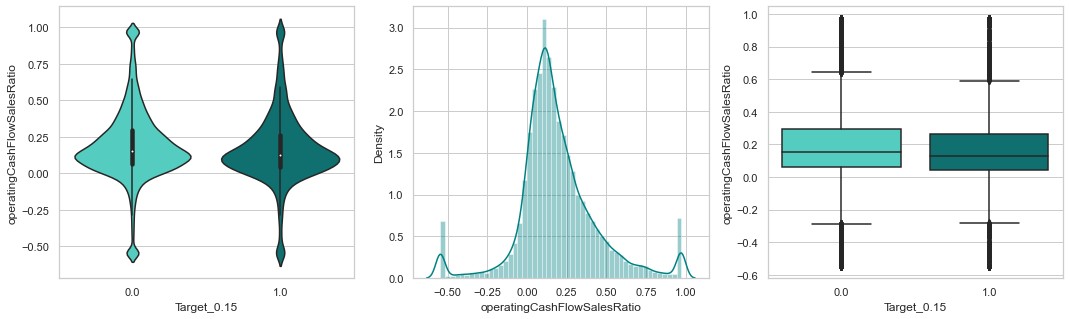

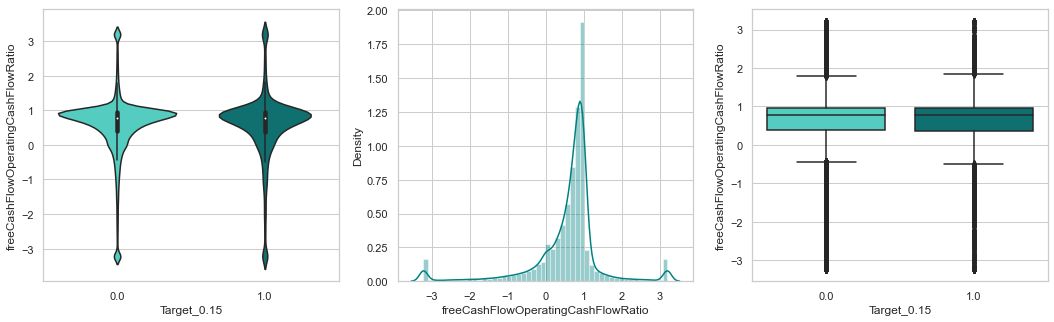

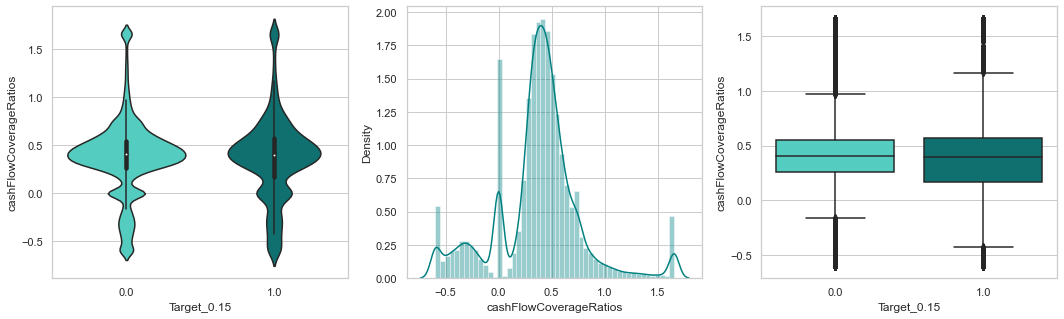

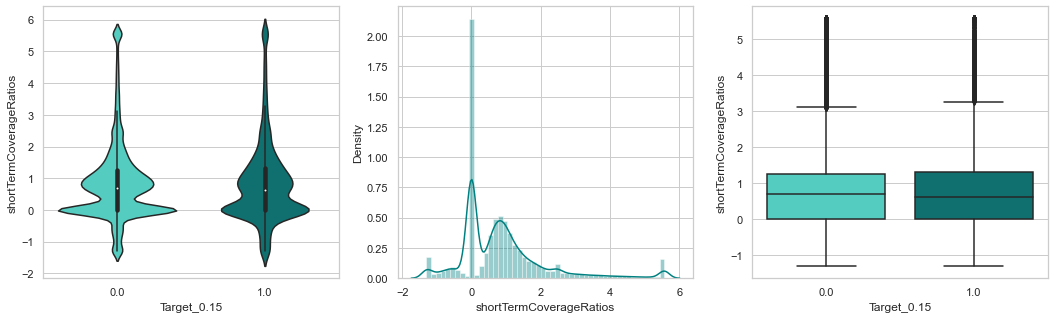

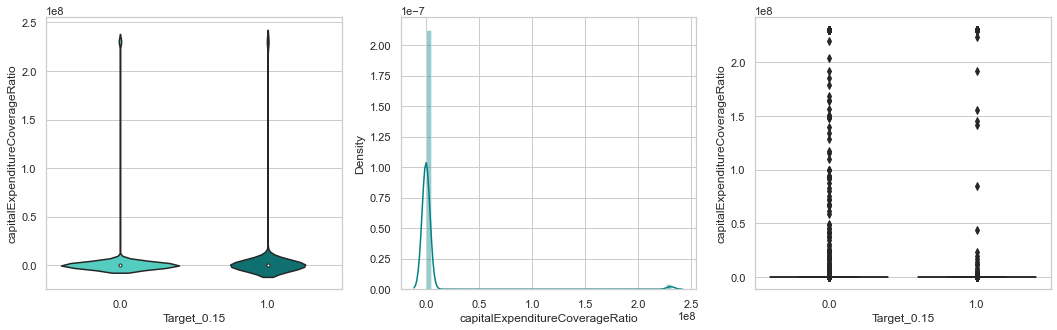

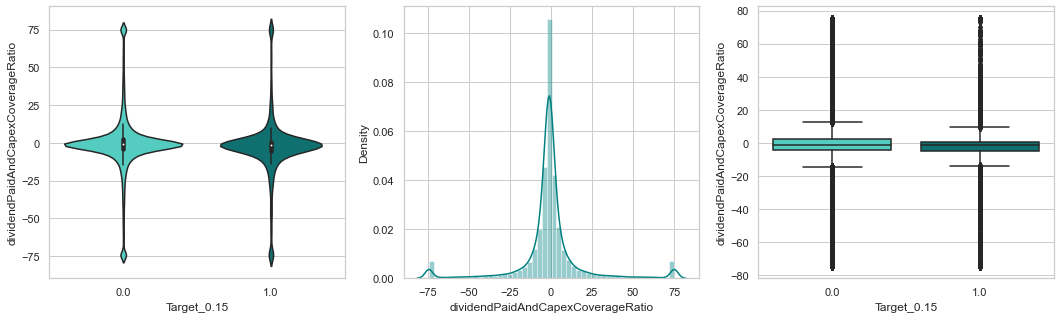

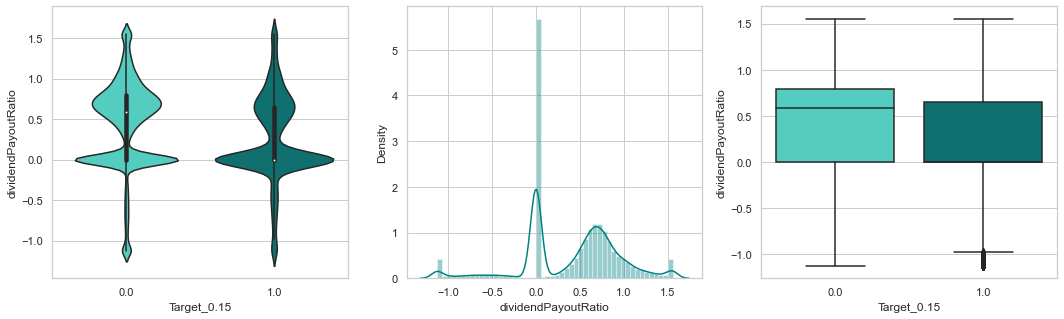

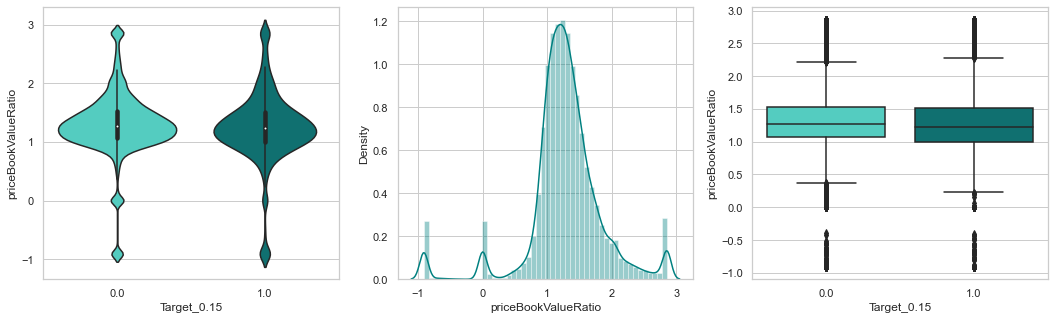

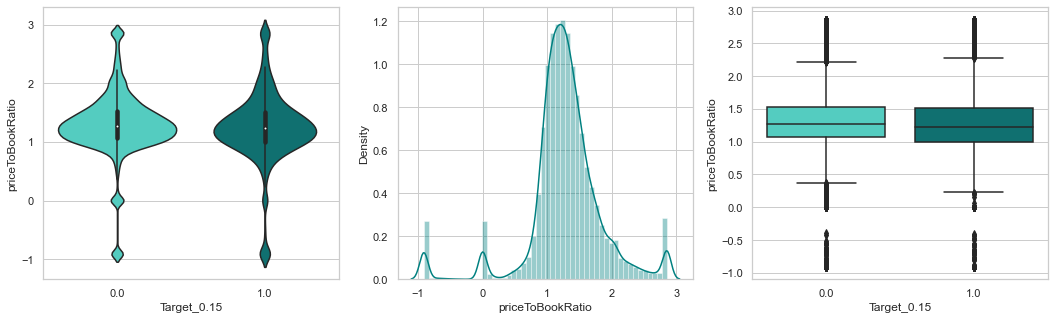

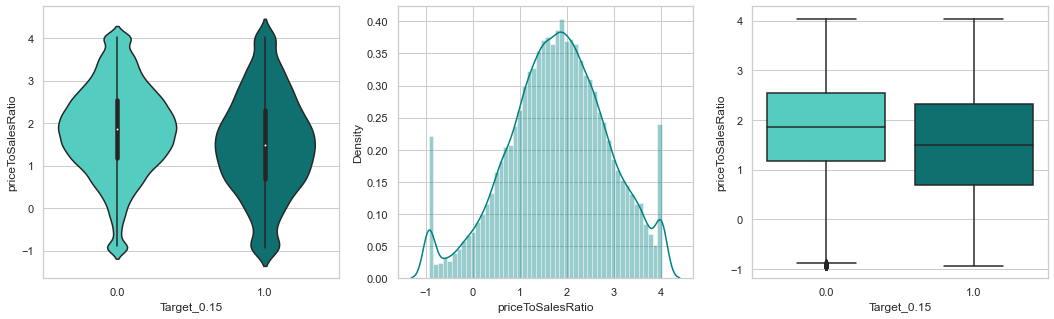

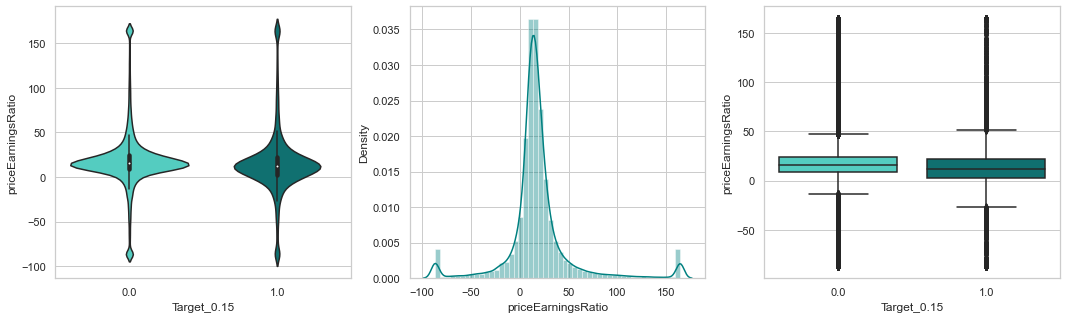

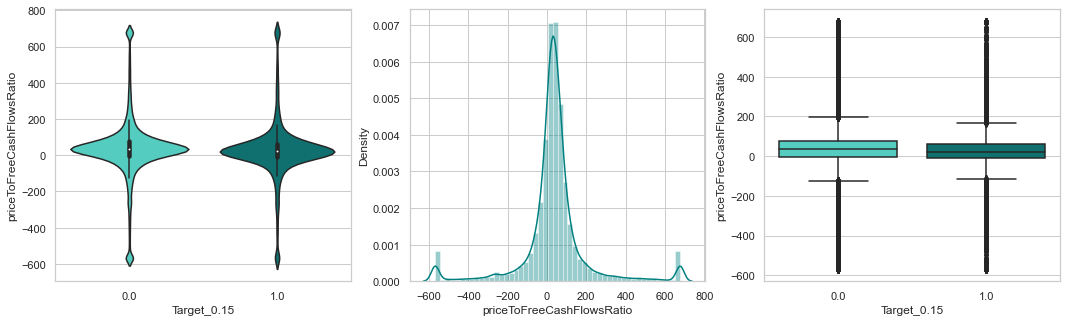

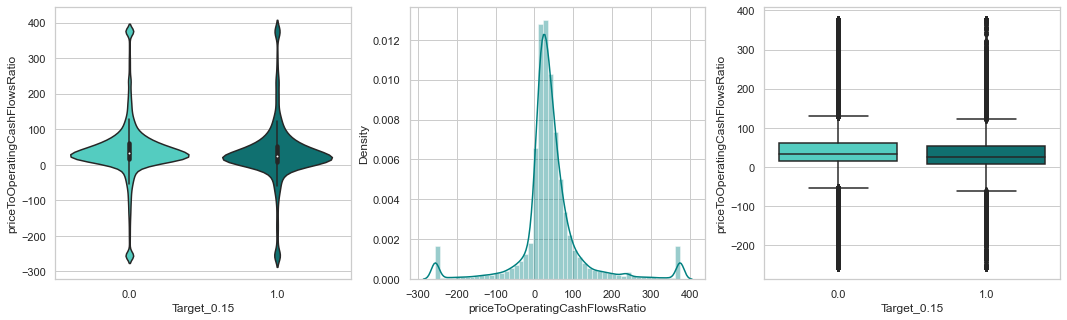

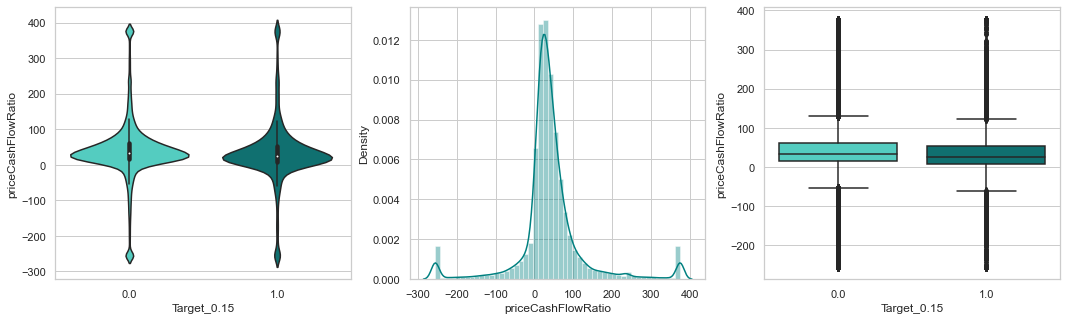

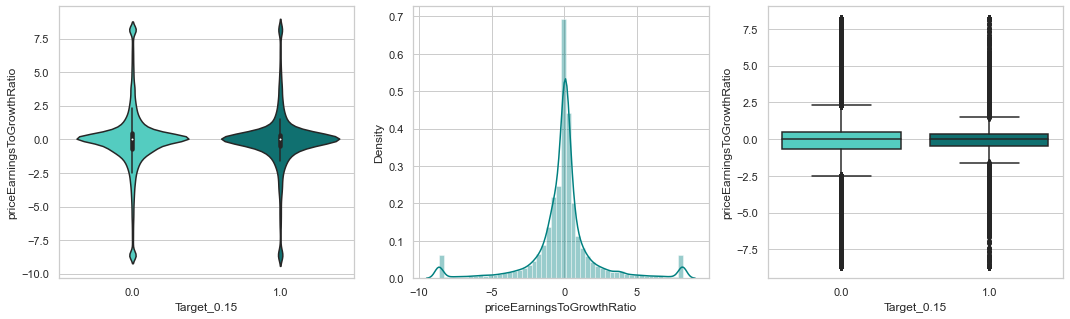

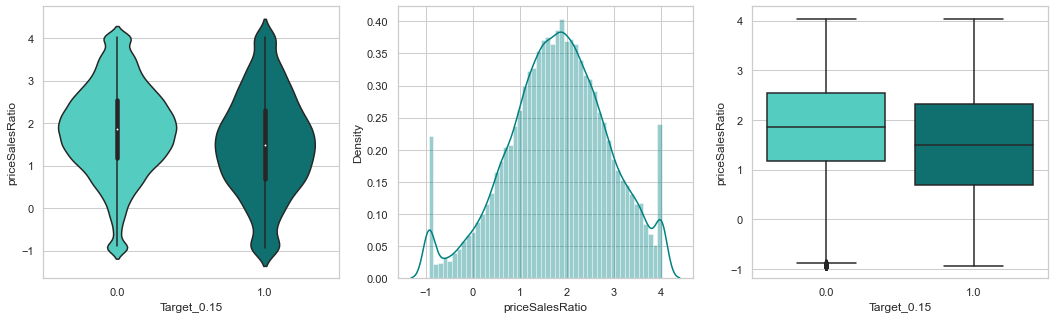

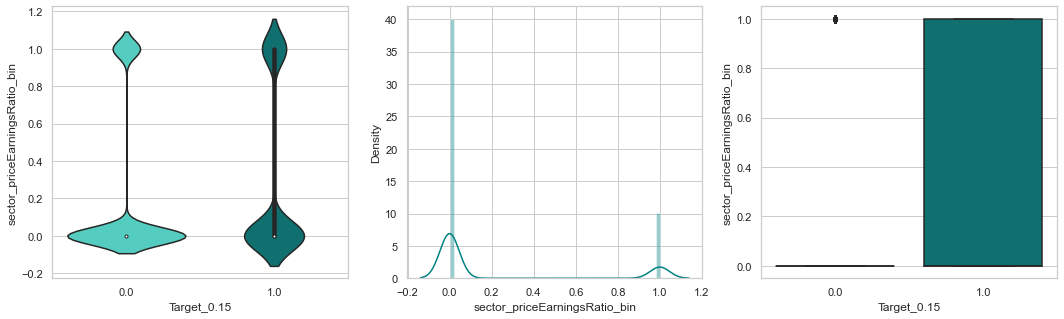

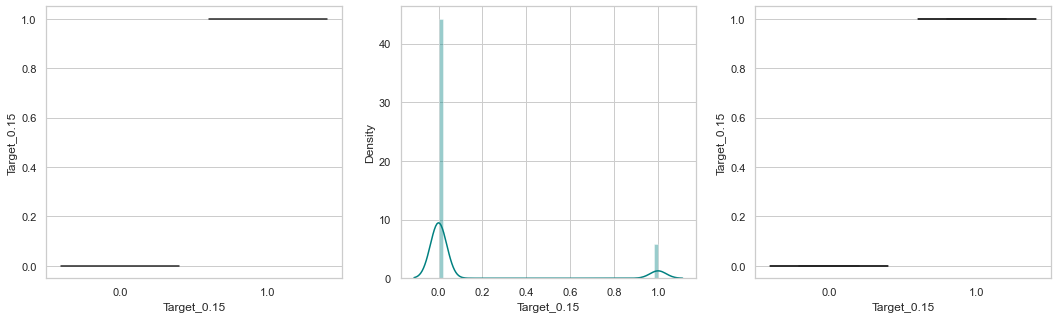

In [90]:
viz.univariate_target_analysis(to_plot, 'Target_0.15')

### Growth Features

Number of metric features : 9
Plotting a Sinle Figure


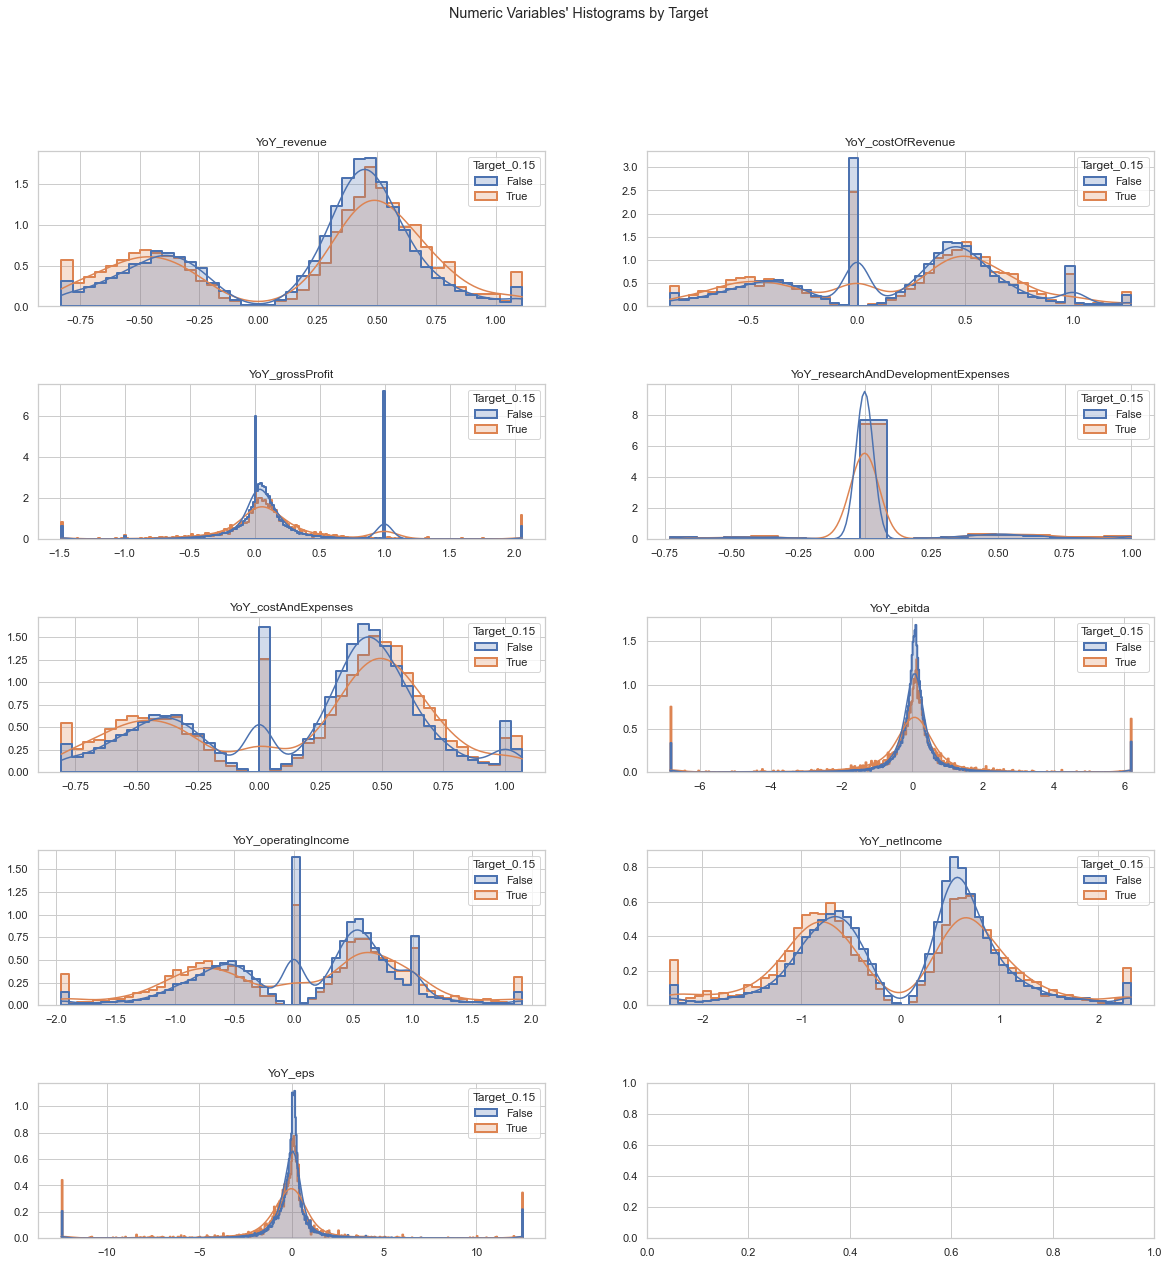

In [3]:
ratio_cols = x_train.columns[x_train.columns.str.contains('YoY')]

to_plot = x_train_out[ratio_cols]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,'Target_0.15')

Number of metric features : 9
Plotting a Sinle Figure


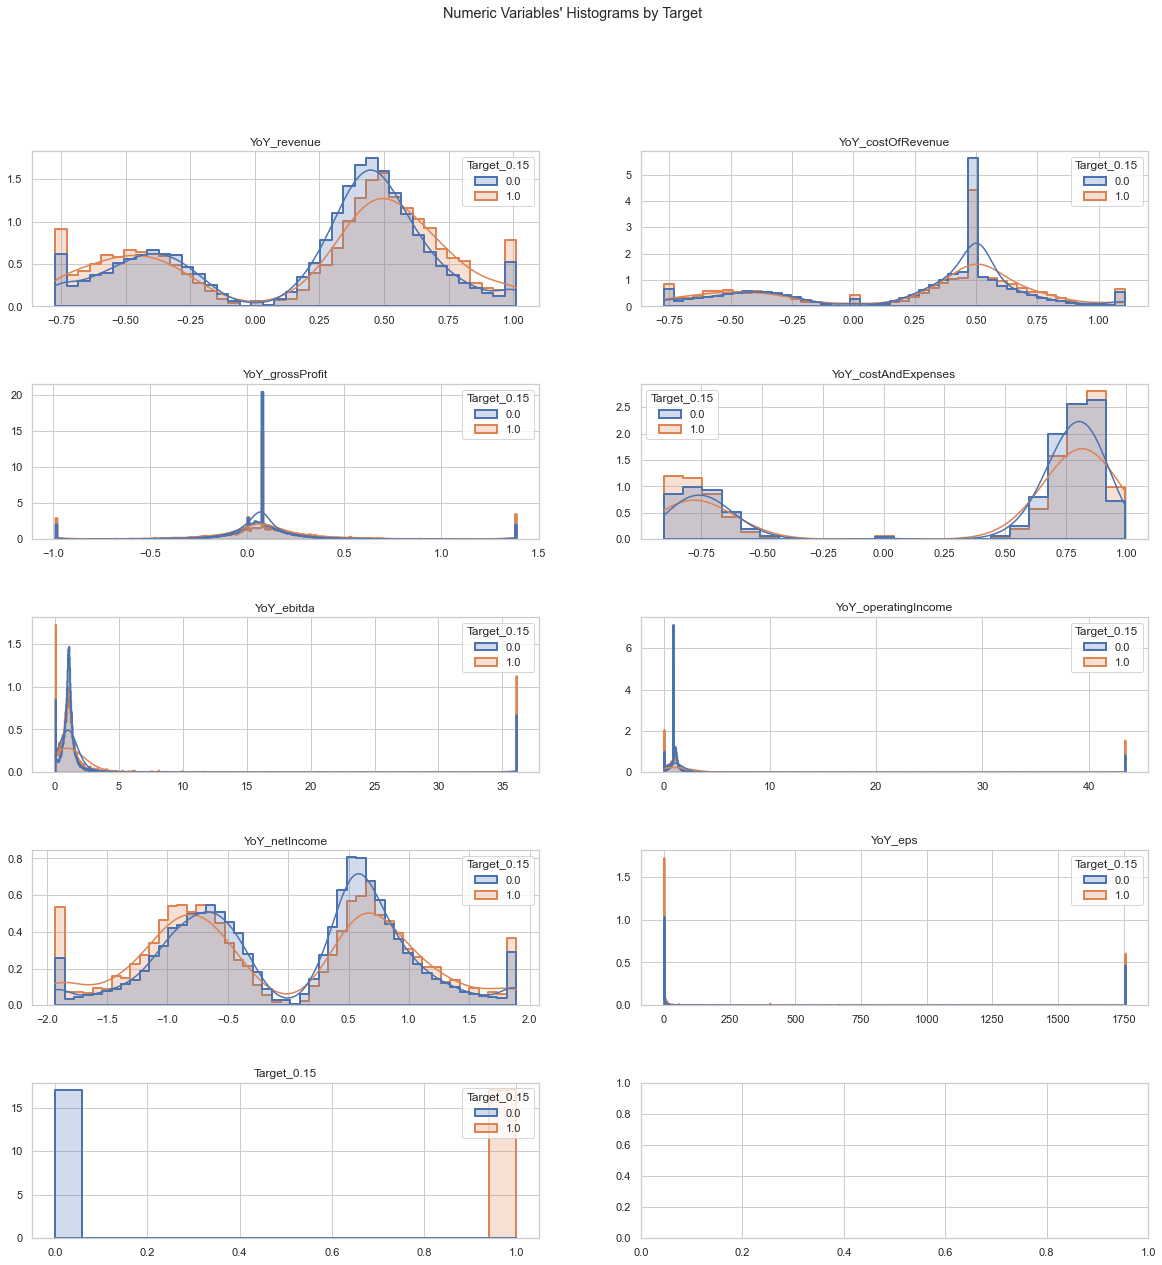

In [141]:
ratio_cols = x_train.columns[x_train.columns.str.contains('YoY')]

to_plot = x_train_out[ratio_cols]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,'Target_0.15')

Number of metric features : 35
Plotting Multiple Figures


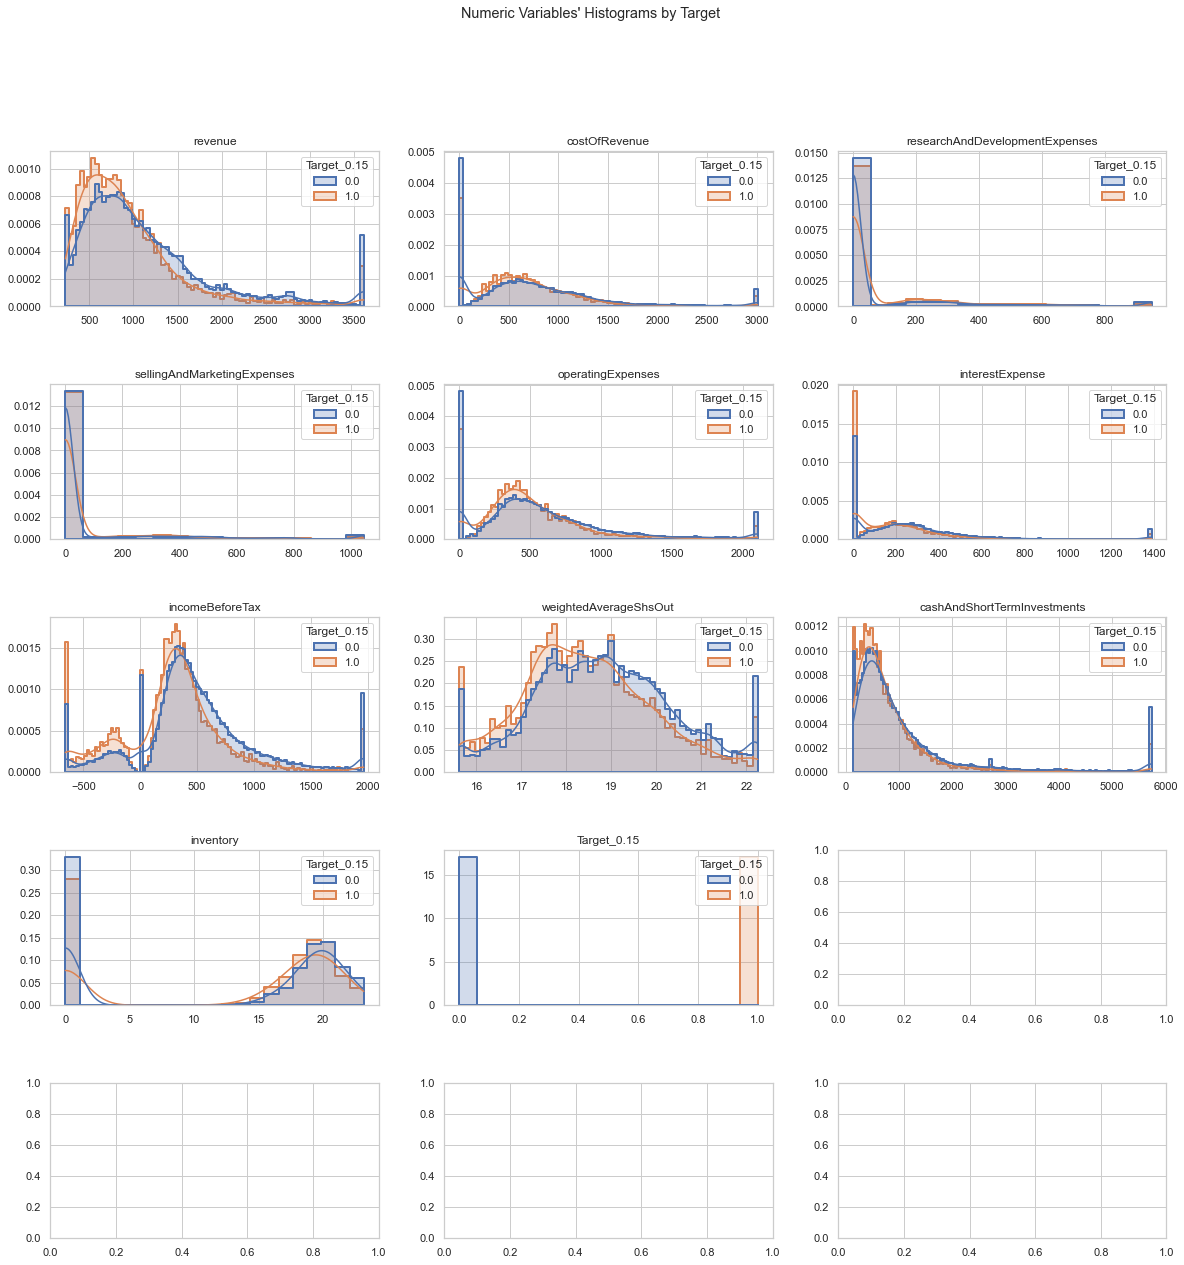

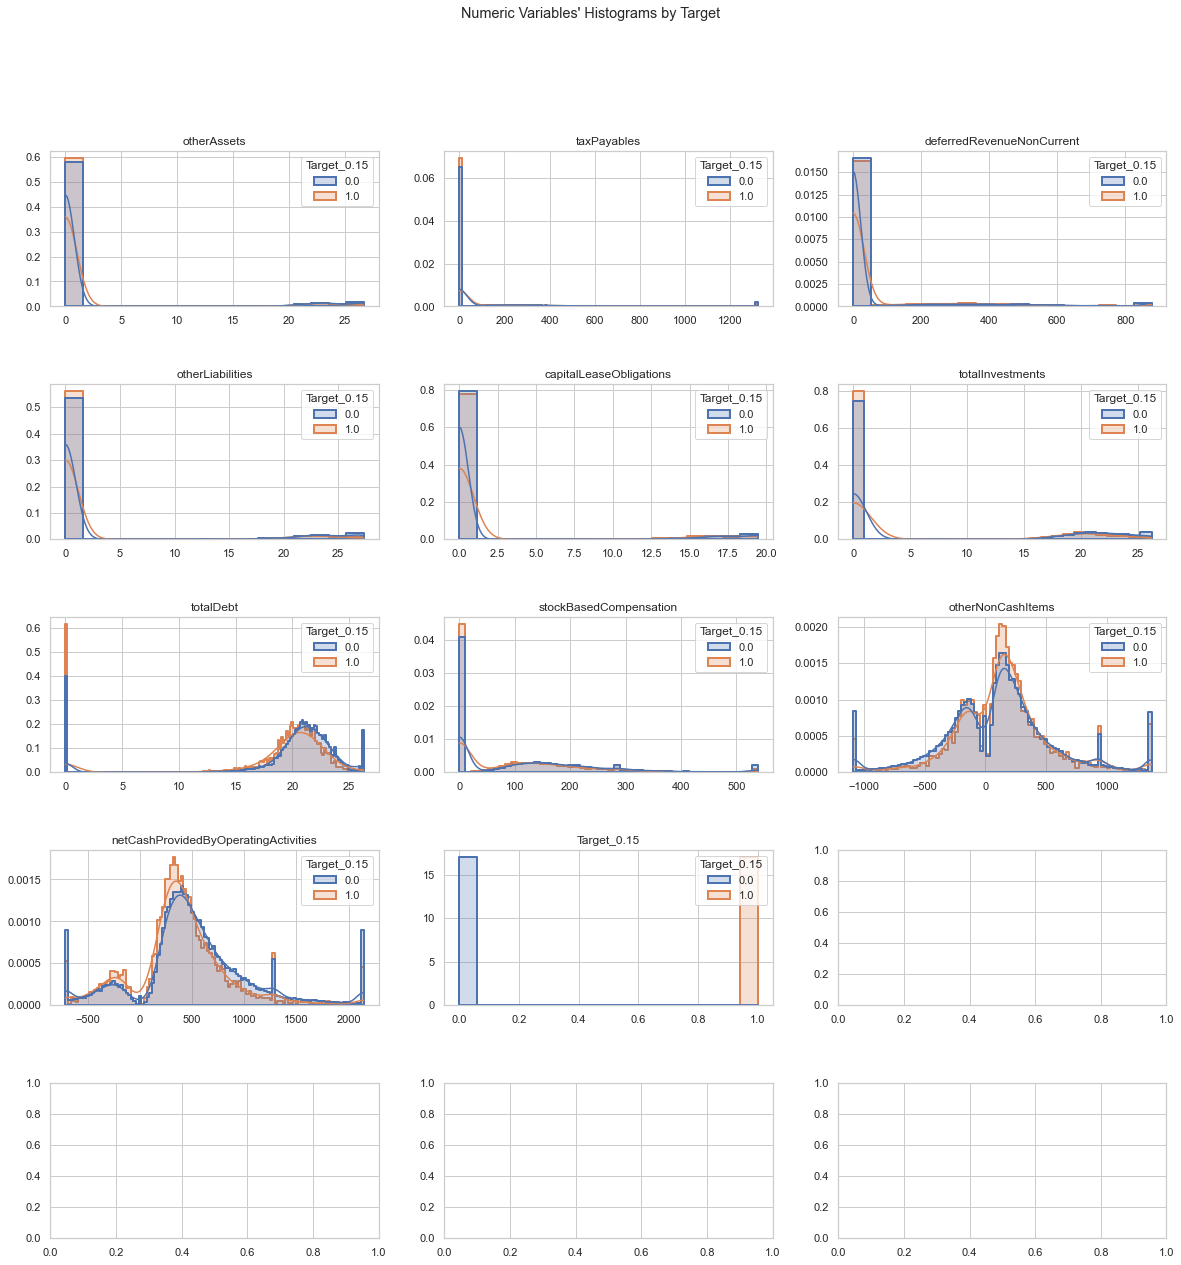

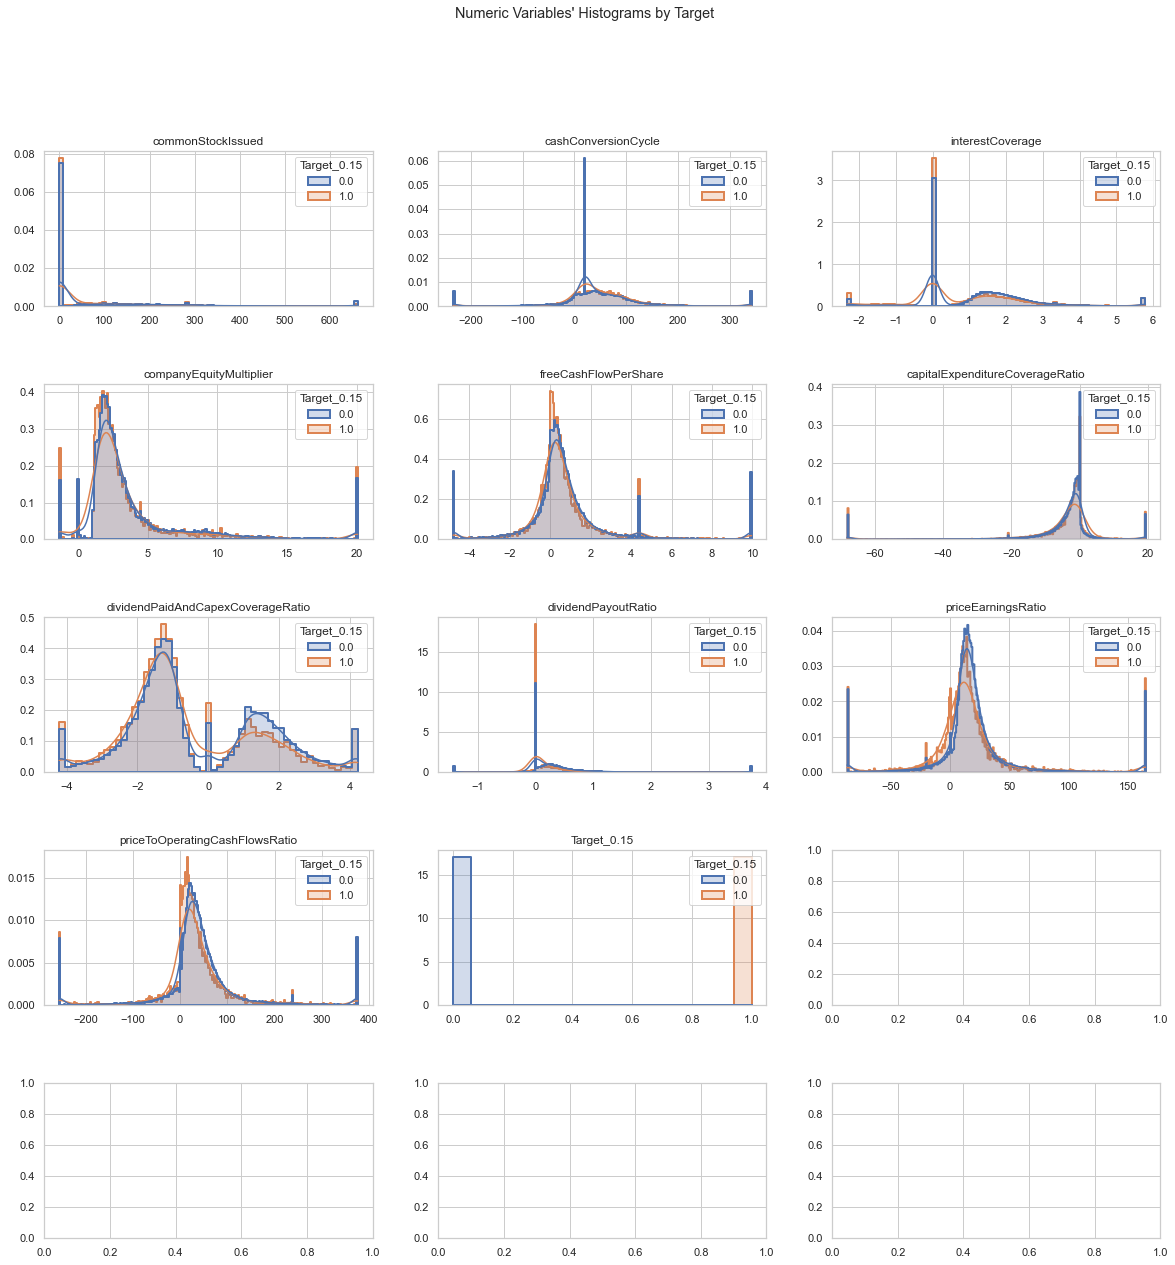

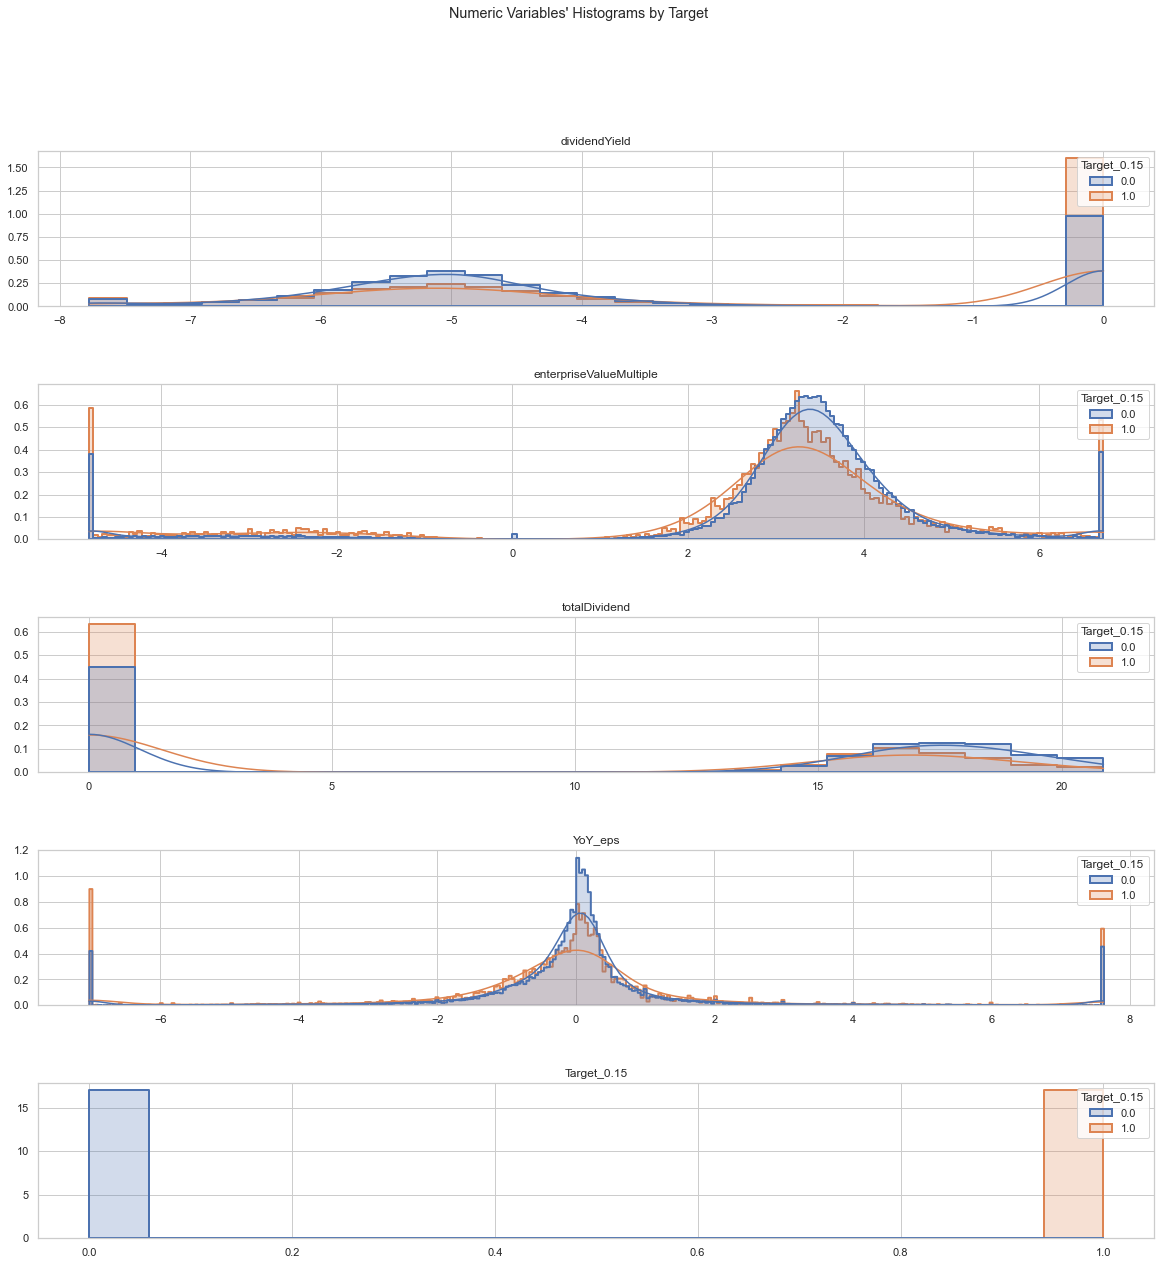

In [192]:
cols = lasso_subset_dict_corr[key]

to_plot = x_train_out[cols]

to_plot = pd.concat([to_plot,y_train],axis=1)

viz.Target_Histogram(to_plot,key)